# An Extended SIR Mathematical Model for Lumpy Skin Disease and Associated Properties

This report presents an extended Susceptible-Exposed-Infectious-Treated-Recovered (SEITR) mathematical
model designed to analyze the transmission dynamics of the Lumpy Skin Disease (LSD) virus in cattle popula-
tions. The model incorporates key aspects of LSD epidemiology and leverages network theory to represent the
complex interactions within the cattle population. The report discusses the model’s formulation, fundamental
properties, implementation, and experimental results. It also outlines potential avenues for future research.

## Introduction
Lumpy Skin Disease (LSD) is a severe disease that affects cattle, causing significant economic losses due to decreased milk production, weight loss, and damage to hides. The disease is caused by the LSD virus, which is primarily transmitted by blood-feeding insects. Understanding the transmission dynamics of the LSD virus is crucial for developing effective control and prevention strategies. To achieve this goal, mathematical modeling has emerged as a powerful tool. In particular, the Susceptible-Exposed-Infectious-Treated-Recovered (SEITR) model, an extension of the classic SIR model, has been widely used to study various diseases. The SEITR model incorporates an exposed stage, representing individuals who have been infected but are not yet infectious, and a treated stage, representing individuals who have been infected and are receiving treatment. In this report, we present an extended SEITR model designed to analyze the transmission dynamics of the LSD virus in cattle populations. Our model incorporates key aspects of LSD epidemiology, including the exposed and treated stages of the disease. Furthermore, our model leverages network theory to represent the complex interactions within the cattle population, which are crucial for understanding the spread of the LSD virus.

## Background
We implemented the SEITR model and this model's application on networks by using the R language. There are five libraries required for this implementation; igraph for network applications, deSolve for solving differential equations, foreach and doParallel for parallelization and Matrix for calculations. To apply SEITR model, we created different networks. We initialized this experiment with a Erdős-Rényi random network, and moved on to a bigger network with more complicated structure. Here the first network is designed to represent a small farmstead where each member of the network is highly connected to the members of the network, and the second network is aimed to replicate a small county with 4 farms that have very high connection within but very low connection in between. In addition to these networks, we account for the newborn members, naturally deceased members and members deceased due to infection in our implementation. To assign status transition, born and deceased nodes, we followed our SEITR model's parameters.

In [2]:
library(igraph)
library(deSolve)
library(foreach)
library(doParallel)
library(Matrix)

## Extended SIR Model for Lumpy Skin Disease
Here we present the mathematical model used to analyze the transmission dynamics of the LSD virus in cattle populations. This model is an extension of the classic Susceptible-Infectious-Recovered model and incorporates key aspects of LSD epidemiology.
### Model Formulation
The model is an extension of the classic Susceptible-Infectious-Recovered (SIR) model with Exposed and Recovered statuses. The model consists of a system of non-linear ordinary differential equations (ODEs) expressing the transmission dynamics of the LSD virus:
- Susceptible (S): These are individuals who are susceptible to the disease. The rate of change of S is given by the equation: $$\frac{dS}{dt}= \Pi-\frac{\beta_1 SI}{N}-\eta S$$
Here, $\Pi$ is the birth rate, $\beta_1$ is the transmission rate of the disease, I is the number of infectious individuals, N is the total population, and $\eta$ is the natural death rate.
- Exposed (E): These are individuals who have been infected but are not yet infectious. The rate of change of E is given by the equation: $$\frac{dE}{dt}= \frac{\beta_1SI}{N}-(\gamma_2+\eta) E$$
Here, $\gamma_2$ is the rate at which exposed individuals become infectious.
- Infectious (I): These are individuals who are infectious. The rate of change of I is given by the equation: $$\frac{dI}{dt}=\gamma_2 E-(\gamma_3+\eta+d_I+\kappa_1)I$$
Here, $\gamma_3$ is the recovery rate, $dI$ is the disease-induced death rate, and $\kappa_1$ is the rate at which infectious individuals are treated.
- Treated (T): These are individuals who have been infected and are receiving treatment. The rate of change of T is given by the equation: $$\frac{dT}{dt}=\kappa_1 I-(\eta+d_T+\kappa_2)T$$
Here, $dT$ is the treatment-induced death rate, and $\kappa_2$ is the rate at which treated individuals recover.
- Recovered (R): These are individuals who have recovered from the disease. The rate of change of R is given by the equation: $$\frac{dR}{dt}= \gamma_3 I+\kappa_2 T-\eta R$$

with non-negative initial conditions;
$$S(0)=S_0,E(0)=E_0,I(0)=I_0,T(0)=T_0,R(0)=\mathcal{R}_0.$$
### Equilibrium Points
The model also includes two equilibrium points: the disease-free equilibrium and the endemic equilibrium. The disease-free equilibrium represents the state where the disease has been eradicated, while the endemic equilibrium represents the state where the disease persists in the population. The reproduction number $\mathcal{R}_0$ is a key quantity that determines the number of infections produced by an infectious individual. If $\mathcal{R}_0<1$, the disease-free equilibrium is stable, meaning the disease will die out. If $\mathcal{R}_0>1$, the endemic equilibrium is stable, meaning the disease will persist in the population.

Disease-Free Equilibrium: $\zeta =\left(\frac{\Pi}{\nu} , 0,0,0,0\right)$.

Endemic Equilibrium: $\Gamma^{1}=(S^{1},E^{1},I^{1},T^{1},R^{1})$, where $S^{1}$, $E^{1}$, $I^{1}$, $T^{1}$, and $R^{1}$ are given by the following equations:
$$S^{1}=\frac{\Lambda(-k_1 k_2 k_3+k_3\delta I \beta_2+\delta_T \alpha_1 \beta_2)} {(-k_3 \beta_1+k_3\delta_I+\delta_T \alpha_1)\beta_2 \mu}$$
$$E^{1}=\frac{-\Lambda\beta_1 \beta_2 k_1 k_3+ k_1^2 k_2 k_3 \Lambda}{-k_1 k_2 k_3 \beta_1 \beta_2 + k_1 k_2 k_3\delta_I \beta_2+k_1 k_2 \delta_T \alpha_1 \beta_2}$$
$$I^{1}=\frac{-\Lambda \beta_1 \beta_2 k_3+ k_1 k_2 k_3 \Lambda}{-k_1 k_2 k_3 \beta_1 + k_1 k_2 k_3\delta_I +k_1 k_2 \delta_T \alpha_1}$$
$$T^{1}=\frac{\alpha(-\Lambda \beta_1 \beta_2 k_3+ k_1 k_2 k_3\Lambda)}{k_3(-k_1 k_2 k_3 \beta_1 +k_1 k_2 k_3\delta_I +k_1 k_2 \delta_T \alpha_1)}$$
$$R^{1}=\frac{-\Lambda \beta_1 \beta_2 \beta_3 k_3+ k_1 k_2 k_3\beta_3 \Lambda-\Lambda \beta_1 \beta_2 \alpha_1 \alpha_2+k_1 k_2\alpha_1 \alpha_2 \Lambda}{\mu(-k_1 k_2 k_3 \beta_1 + k_1 k_2 k_3 \delta_I+ k_1 k_2 \alpha_1 \delta_T)}$$
$$N^{1}=\frac{\Lambda(-k_1 k_2 k_3+k_3\delta_I \beta_2+\delta_T\alpha_1 \beta_2)}{\mu \beta_2(-k_3 \beta_1 +k_3 \delta_I+\delta_T\alpha_1)}$$
### Reproduction Number and Stability}
The reproduction number $\mathcal{R}_0$ is a mathematical quantity that determines the number of infections produced by an infectious individual. For our model, it is given by:

$$\mathcal{R}_0=\frac{\beta_1 \beta_2 }{(\beta_3+\mu+\delta_I+\alpha_1)(\beta_2+\mu)}$$

The model is locally asymptotically stable (LAS) and globally asymptotically stable (GAS) at the disease-free equilibrium point $\zeta$ when $\mathcal{R}_0 < 1$ and unstable when $\mathcal{R}_0 > 1$, provided $\mathcal{R}_0 \ne 1$. The endemic equilibrium point $\Gamma^{1}$ of the model is LAS and GAS stable, provided $\mathcal{R}_0>1$.

## Experiment
In this experiment, we aim to simulate the dynamics of a disease outbreak in a population using a SEITR (Susceptible-Exposed-Infected-Treatment-Recovered) model. The SEITR model is an extension of the classic SIR (Susceptible-Infected-Recovered) model, incorporating additional states to capture more complex disease dynamics\cite{Harko}. The cattle population is represented as a graph, where each node represents an individual and edges represent interactions between individuals. The state of each individual (node) can be Susceptible (S), Exposed (E), Infected (I), in Treatment (Tt), or Recovered (R). The total population (N) is the sum of individuals in all states.

The simulation is run multiple times, with each run representing a different realization of the disease outbreak. The number of runs is determined by the user. In each run, the disease dynamics are simulated over a specified number of time steps. At the start of each run, the population graph is initialized with a specified number of individuals in each state. The initial conditions are set by the user. The graph is generated using the Erdős–Rényi model, which is a random graph model that generates graphs with a given number of nodes and a preferential attachment for edge creation. In addition to the random network, we created networks based on clusters (created with Erdős–Rényi model and preferential attachment) that are weakly connected to each other to represent a scenario where several farms in a small town have very limited interaction amongst their herds.

In this experiment, we also take into account the impact of treatment on the disease dynamics. Individuals in the Infected state can transition to the Treatment state, and individuals in the Treatment state can eventually Recover. This aspect of the model allows us to explore the effects of interventions such as medical treatment or quarantine on the course of the outbreak. By adjusting the parameters related to treatment, we can simulate scenarios with different levels of intervention and observe their effects on the disease spread. During each time step of the simulation, the state of each individual can change according to certain rules and probabilities. These rules capture the disease transmission process and the recovery process. The probabilities are determined by a set of parameters, which are introduced in the model section previously.

The disease transmission process includes the following transitions:
- Susceptible individuals can become Exposed if they interact with Infected or Exposed individuals.
- Exposed individuals can become Infected.
- Infected individuals can either go into Treatment or Recover.

The recovery process includes the following transitions:
- Individuals in Treatment can Recover.
- Recovered individuals remain in the Recovered state.

In addition to these transitions, individuals can also enter or leave the population. New Susceptible individuals can enter the population at a constant rate (Lambda), and individuals can leave the population due to natural death (mu) or disease-induced (delta\_I) death. The state of the population is recorded at each time step, including the number of individuals in each state and the total population size. These data are stored in a list for each run. After all runs are completed, the results are analyzed and visualized. The number of individuals in each state is plotted over time for each run, allowing for a comparison of the disease dynamics across different runs.

This experiment provides a detailed and flexible framework for simulating and analyzing disease outbreaks in a population. By adjusting the parameters and initial conditions, it can be used to study a wide range of diseases and outbreak scenarios. The use of a graph to represent the population allows for the inclusion of complex interaction patterns and heterogeneity in the population, making it a powerful tool for understanding disease spread in real-world populations. It's important to note that the results of this experiment are stochastic due to the random nature of the graph generation and the disease transmission process. Therefore, the results can vary between runs. To obtain robust results, it is recommended to run the simulation multiple times and analyze the average behavior.

### Experiment 1: Erdős–Rényi Graph with preferential attachment

In the first experiment, the SEITR model was applied to a single Erdős–Rényi graph with 100 nodes. The initial conditions were set as follows: 70 Susceptible, 10 Infected, and 20 Exposed individuals. The model parameters were set to Lambda = 1, beta1 = 0.8, beta2 = 0.3, beta3 = 0.02, alpha1 = 0.1, alpha2 = 0.055, delta\_I = 0.03, delta\_T = 0.03, and mu = 0.01. The Erdős–Rényi graph was generated with a connection probability of 0.85. To observe the status changes, we plotted the network on several time steps with each status represented with a different color. The output shows the initial network with 70 Susceptible, 20 Exposed and 10 infected nodes. After the first time step shown, we observed one of the nodes getting treated and the numbers of Exposed and Infected increased. As we progress though time, the Infected, then the Treated and then the Recovered nodes dominate the population for this case. These outputs show that the number of Susceptibles follow a decreasing trend, the number of Exposed and the number of Infected first increases then decreases, the number of Treated and Recovered nodes are increased throughout the 100 time steps.

In [2]:
# Model Parameters
Lambda <- 1            # Number of births
beta1 <- 0.8           # S to E rate of transfer
beta2 <- 0.3           # E to I rate of transfer
beta3 <- 0.02          # I to R rate of transfer
alpha1 <- 0.1          # I to Tt rate of transfer (alpha1 - beta3)
alpha2 <- 0.055        # Tt to R rate of transfer
delta_I <- 0.03        # Rate of death due to Infection
delta_T <- 0.03
mu <- 0.01             # Rate of natural death
# Lambda is the number of nodes added at each time step. (1 for this example)
# mu * N + delta_I * I is the number of nodes removed at each time step. (1 + 0.3 for this example)
# With these parameters, total population is expected to decrease slowly.

# Reproduction number
R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

# Initial conditions
n <- 100
S <- 70
I <- 10
E <- 20
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

# SEITR model
SEITR <- function(t, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- Lambda - (beta1 * S * I) / N - mu * S
    dE <- (beta1 * S * I) / N - (beta2 + mu) * E
    dI <- beta2 * E - (beta3 + mu + delta_I + alpha1) * I
    dT <- alpha1 * I - (mu + delta_T + alpha2) * Tt
    dR <- beta3 * I + alpha2 * Tt - mu * R
    dN <- Lambda - N * mu - delta_I * I - delta_T * Tt
    list(c(dS, dE, dI, dT, dR, dN))
  })
}

# Initial state
state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)

# Parameters
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)

# Time steps
times <- seq(0, 100, by = 1)

# Solve ODE
out <- ode(y = state, times = times, func = SEITR, parms = parameters)

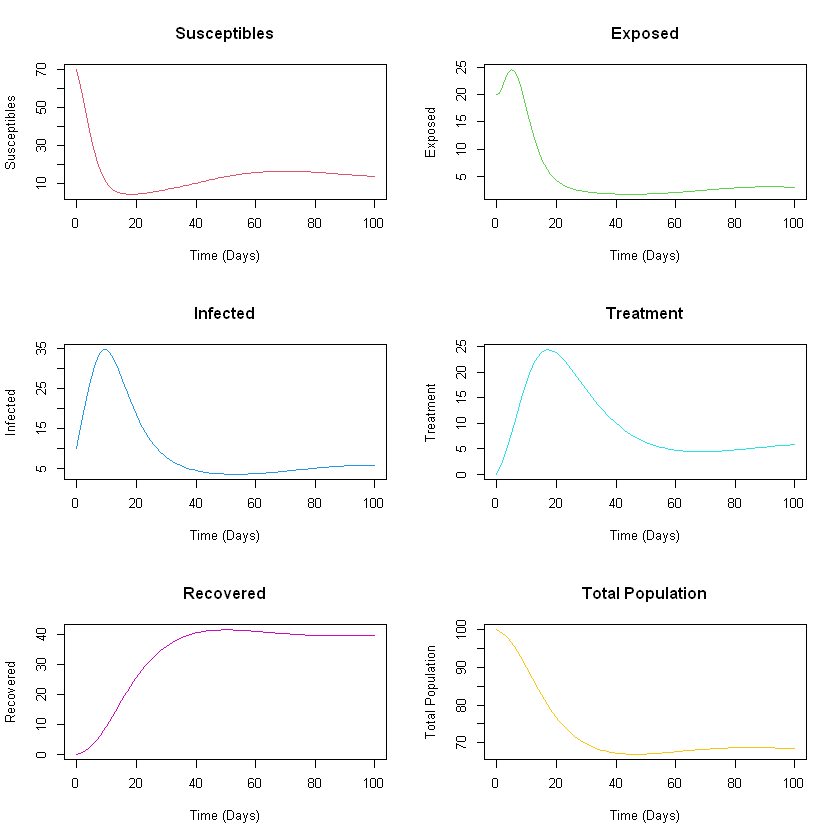

In [3]:
# Plot each status separately
par(mfrow = c(3, 2))
plot(out[, "time"], out[, "S"], type = "l", col = 2, xlab = "Time (Days)", ylab = "Susceptibles", main = "Susceptibles")
plot(out[, "time"], out[, "E"], type = "l", col = 3, xlab = "Time (Days)", ylab = "Exposed", main = "Exposed")
plot(out[, "time"], out[, "I"], type = "l", col = 4, xlab = "Time (Days)", ylab = "Infected", main = "Infected")
plot(out[, "time"], out[, "Tt"], type = "l", col = 5, xlab = "Time (Days)", ylab = "Treatment", main = "Treatment")
plot(out[, "time"], out[, "R"], type = "l", col = 6, xlab = "Time (Days)", ylab = "Recovered", main = "Recovered")
plot(out[, "time"], out[, "N"], type = "l", col = 7, xlab = "Time (Days)", ylab = "Total Population", main = "Total Population")

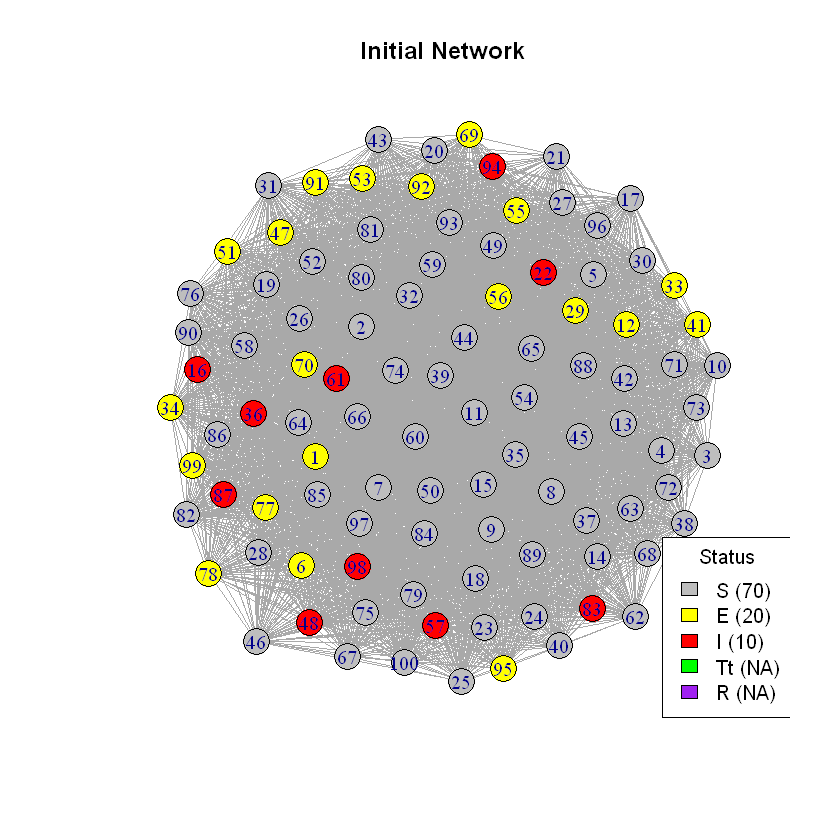

In [4]:
# Create the graph
g <- erdos.renyi.game(n, 0.85)
V(g)$label <- 1:n
V(g)$status <- "S"
V(g)$status[sample(1:n, size = I)] <- "I"
V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"

# Initialize counters
S_count <- S
E_count <- E
I_count <- I
Tt_count <- Tt
R_count <- R
N_count <- N

# Initialize vectors to store metrics
degree_dist <- vector("list", length(times))
clustering_coeff <- numeric(length(times))
avg_path_length <- numeric(length(times))
largest_comp_size <- numeric(length(times))

# Color mapping for statuses
status_colors <- c("S" = "gray", "E" = "yellow", "I" = "red", "Tt" = "green", "R" = "purple")
par(mfrow = c(1, 1))

# Initial Network plot
plot(g, vertex.color = status_colors[V(g)$status], vertex.label = V(g)$label, vertex.size=10)
title(paste("Initial Network"))
status_counts <- table(V(g)$status)
status_labels <- paste(names(status_colors), " (", status_counts[names(status_colors)], ")", sep = "")
legend("bottomright", legend = status_labels, fill = status_colors, title = "Status")

Time 0 : Node 16 with status I removed due to Infection
Time 0 : Node 24 with status S removed
Time 0 : New node 101 added with status S 
Time 0 : Node 1 changed status from E to I
Time 0 : Node 6 changed status from E to I
Time 0 : Node 12 changed status from E to I
Time 0 : Node 15 changed status from S to E
Time 0 : Node 34 changed status from E to I
Time 0 : Node 35 changed status from S to E
Time 0 : Node 45 changed status from S to E
Time 0 : Node 51 changed status from E to I
Time 0 : Node 53 changed status from E to I
Time 0 : Node 56 changed status from E to I
Time 0 : Node 57 changed status from I to Tt
Time 0 : Node 65 changed status from S to E
Time 0 : Node 72 changed status from S to E
Time 0 : Node 76 changed status from S to E
Time 0 : Node 84 changed status from S to E
Time 0 : Node 89 changed status from S to E
Time 0 : Node 94 changed status from I to Tt
Time 0 : Node 95 changed status from E to I
Time 0 : Node 99 changed status from E to I
Time 1 : Node 53 with stat

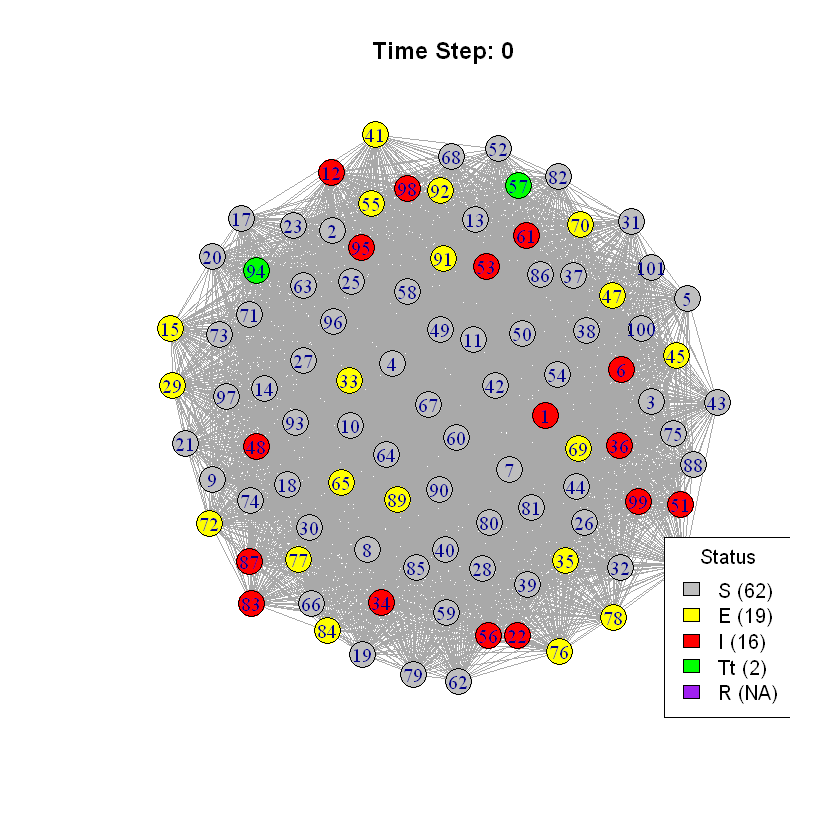

Time 11 : Node 13 with status I removed due to Infection
Time 11 : Node 82 with status Tt removed
Time 11 : New node 112 added with status S 
Time 11 : Node 9 changed status from S to E
Time 11 : Node 25 changed status from S to E
Time 11 : Node 50 changed status from S to E
Time 11 : Node 58 changed status from E to I
Time 11 : Node 92 changed status from I to Tt
Time 11 : Node 99 changed status from I to R
Time 11 : Node 106 changed status from E to I
Time 11 : Node 110 changed status from E to I
Time 12 : Node 47 with status I removed due to Infection
Time 12 : Node 91 with status R removed
Time 12 : New node 113 added with status S 
Time 12 : Node 5 changed status from E to I
Time 12 : Node 9 changed status from E to I
Time 12 : Node 43 changed status from S to E
Time 12 : Node 46 changed status from E to I
Time 12 : Node 60 changed status from E to I
Time 12 : Node 63 changed status from I to Tt
Time 12 : Node 84 changed status from I to R
Time 12 : Node 107 changed status from E 

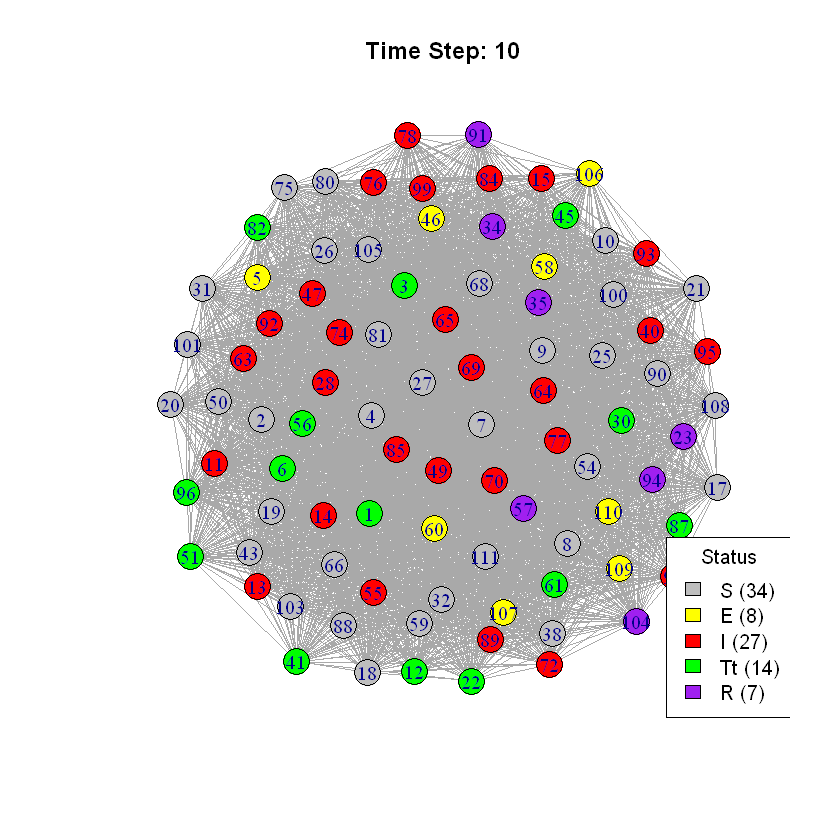

Time 21 : Node 68 with status S removed
Time 21 : New node 122 added with status S 
Time 21 : Node 8 changed status from I to Tt
Time 21 : Node 17 changed status from E to I
Time 21 : Node 25 changed status from Tt to R
Time 21 : Node 41 changed status from Tt to R
Time 21 : Node 69 changed status from Tt to R
Time 21 : Node 77 changed status from I to Tt
Time 21 : Node 81 changed status from E to I
Time 21 : Node 103 changed status from E to I
Time 22 : Node 58 with status I removed due to Infection
Time 22 : Node 22 with status Tt removed
Time 22 : New node 123 added with status S 
Time 22 : Node 6 changed status from Tt to R
Time 22 : Node 8 changed status from Tt to R
Time 22 : Node 59 changed status from I to Tt
Time 22 : Node 98 changed status from I to Tt
Time 22 : Node 120 changed status from E to I
Time 23 : Node 65 with status I removed due to Infection
Time 23 : Node 88 with status I removed
Time 23 : New node 124 added with status S 
Time 23 : Node 2 changed status from S t

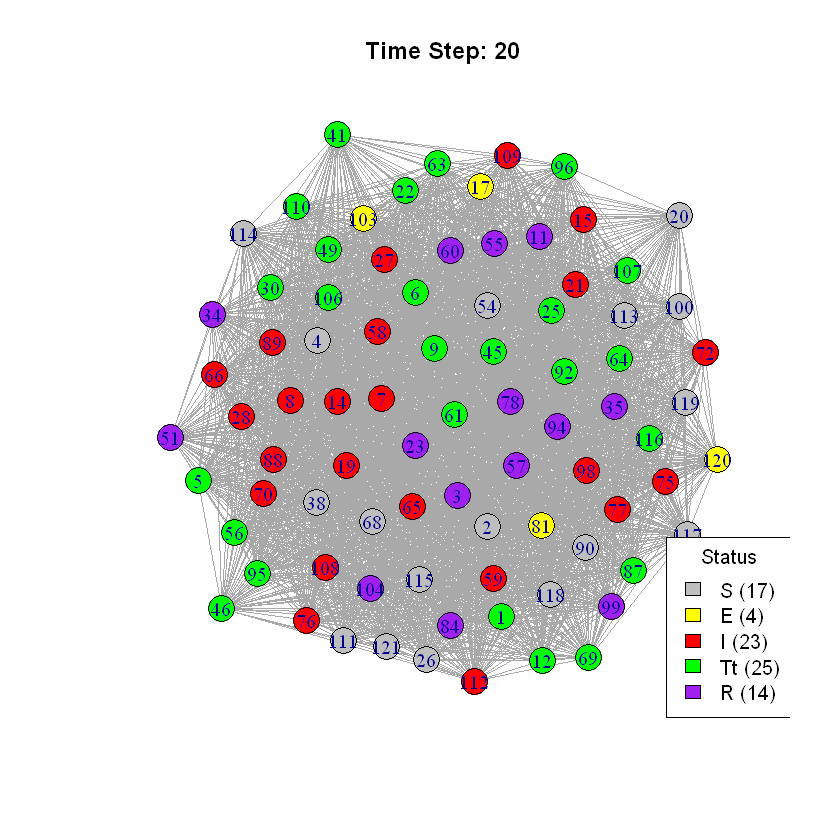

Time 31 : Node 20 with status I removed
Time 31 : New node 132 added with status S 
Time 31 : Node 54 changed status from E to I
Time 31 : Node 89 changed status from I to Tt
Time 31 : Node 90 changed status from E to I
Time 32 : Node 21 with status I removed due to Infection
Time 32 : Node 3 with status R removed
Time 32 : New node 133 added with status S 
Time 32 : Node 81 changed status from Tt to R
Time 32 : Node 122 changed status from S to E
Time 33 : Node 103 with status I removed due to Infection
Time 33 : Node 106 with status R removed
Time 33 : New node 134 added with status S 
Time 33 : Node 70 changed status from I to Tt
Time 33 : Node 76 changed status from I to R
Time 33 : Node 118 changed status from E to I
Time 33 : Node 122 changed status from E to I
Time 33 : Node 128 changed status from I to Tt
Time 34 : Node 84 with status R removed
Time 34 : New node 135 added with status S 
Time 34 : Node 7 changed status from Tt to R
Time 34 : Node 19 changed status from I to Tt


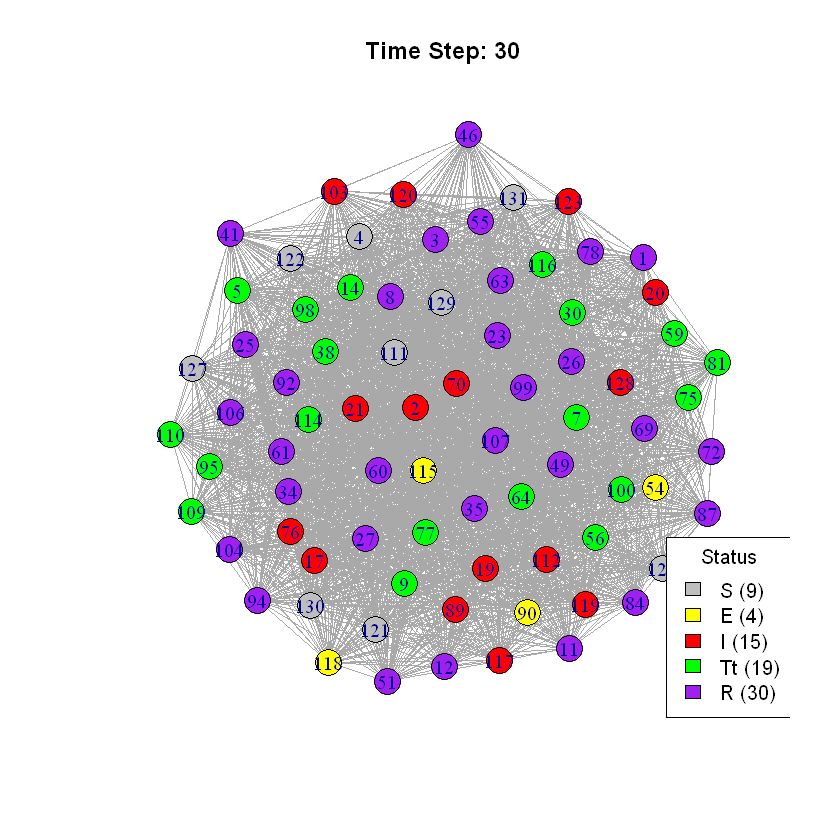

Time 41 : Node 95 with status R removed
Time 41 : New node 142 added with status S 
Time 41 : Node 5 changed status from Tt to R
Time 41 : Node 128 changed status from Tt to R
Time 41 : Node 139 changed status from E to I
Time 42 : Node 112 with status I removed due to Infection
Time 42 : Node 99 with status R removed
Time 42 : New node 143 added with status S 
Time 42 : Node 30 changed status from Tt to R
Time 43 : Node 81 with status R removed
Time 43 : New node 144 added with status S 
Time 43 : Node 59 changed status from Tt to R
Time 44 : Node 133 with status I removed due to Infection
Time 44 : Node 38 with status Tt removed
Time 44 : New node 145 added with status S 
Time 44 : Node 109 changed status from Tt to R
Time 44 : Node 140 changed status from S to E
Time 45 : Node 114 with status R removed
Time 45 : New node 146 added with status S 
Time 45 : Node 54 changed status from I to Tt
Time 45 : Node 70 changed status from Tt to R
Time 45 : Node 123 changed status from I to Tt


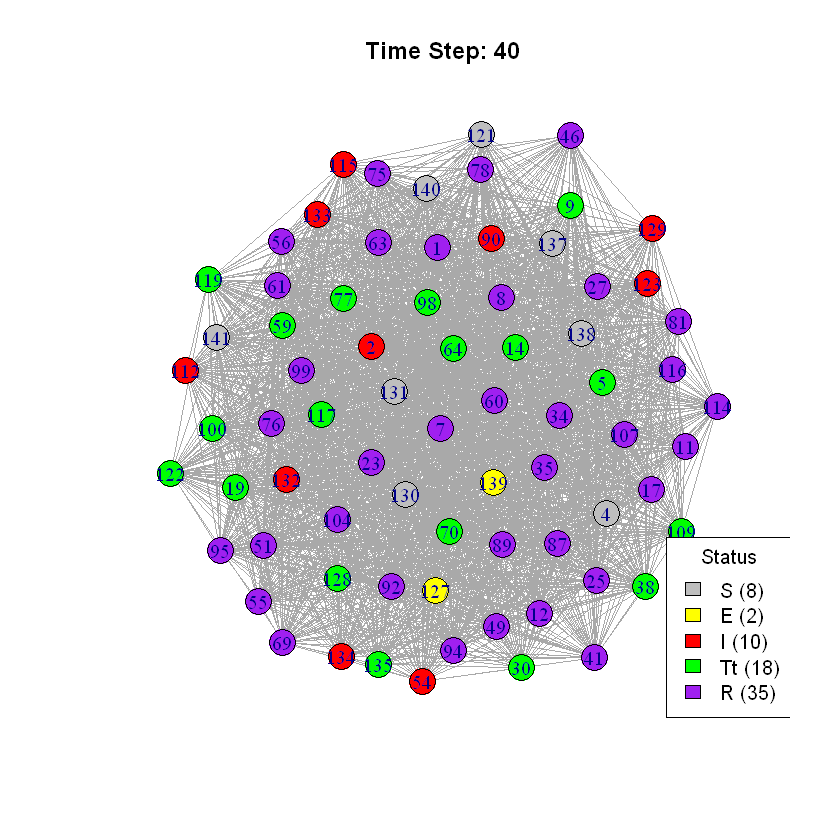

Time 51 : Node 70 with status R removed
Time 51 : New node 152 added with status S 
Time 51 : Node 140 changed status from I to Tt
Time 51 : Node 147 changed status from S to E
Time 51 : Node 148 changed status from E to I
Time 52 : Node 141 with status I removed due to Infection
Time 52 : Node 63 with status R removed
Time 52 : New node 153 added with status S 
Time 52 : Node 142 changed status from E to I
Time 52 : Node 153 changed status from S to E
Time 53 : Node 92 with status R removed
Time 53 : New node 154 added with status S 
Time 53 : Node 2 changed status from I to R
Time 53 : Node 119 changed status from Tt to R
Time 53 : Node 146 changed status from S to E
Time 53 : Node 147 changed status from E to I
Time 53 : Node 153 changed status from E to I
Time 53 : Node 154 changed status from S to E
Time 54 : Node 98 with status Tt removed
Time 54 : New node 155 added with status S 
Time 54 : Node 138 changed status from S to E
Time 55 : Node 23 with status R removed
Time 55 : New

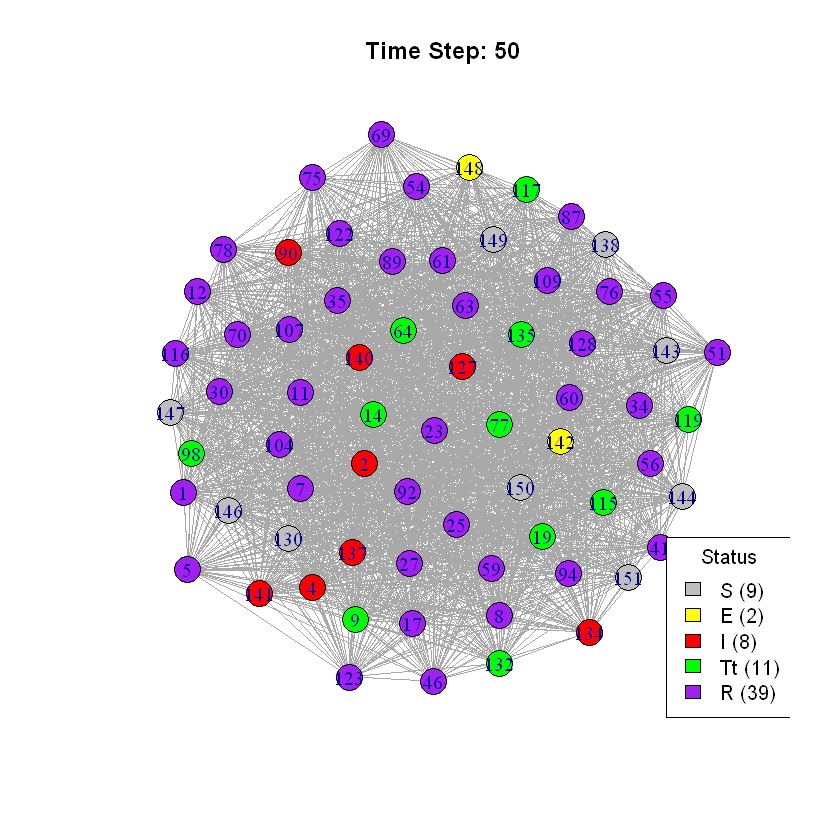

Time 61 : Node 77 with status Tt removed
Time 61 : New node 162 added with status S 
Time 61 : Node 9 changed status from Tt to R
Time 61 : Node 137 changed status from I to R
Time 61 : Node 138 changed status from I to Tt
Time 62 : Node 153 with status I removed
Time 62 : New node 163 added with status S 
Time 62 : Node 127 changed status from Tt to R
Time 62 : Node 143 changed status from S to E
Time 63 : Node 2 with status R removed
Time 63 : New node 164 added with status S 
Time 63 : Node 143 changed status from E to I
Time 63 : Node 150 changed status from I to Tt
Time 63 : Node 151 changed status from S to E
Time 63 : Node 156 changed status from I to R
Time 63 : Node 159 changed status from S to E
Time 64 : Node 56 with status R removed
Time 64 : New node 165 added with status S 
Time 64 : Node 130 changed status from E to I
Time 64 : Node 161 changed status from S to E
Time 64 : Node 164 changed status from S to E
Time 65 : Node 162 with status S removed
Time 65 : New node 166

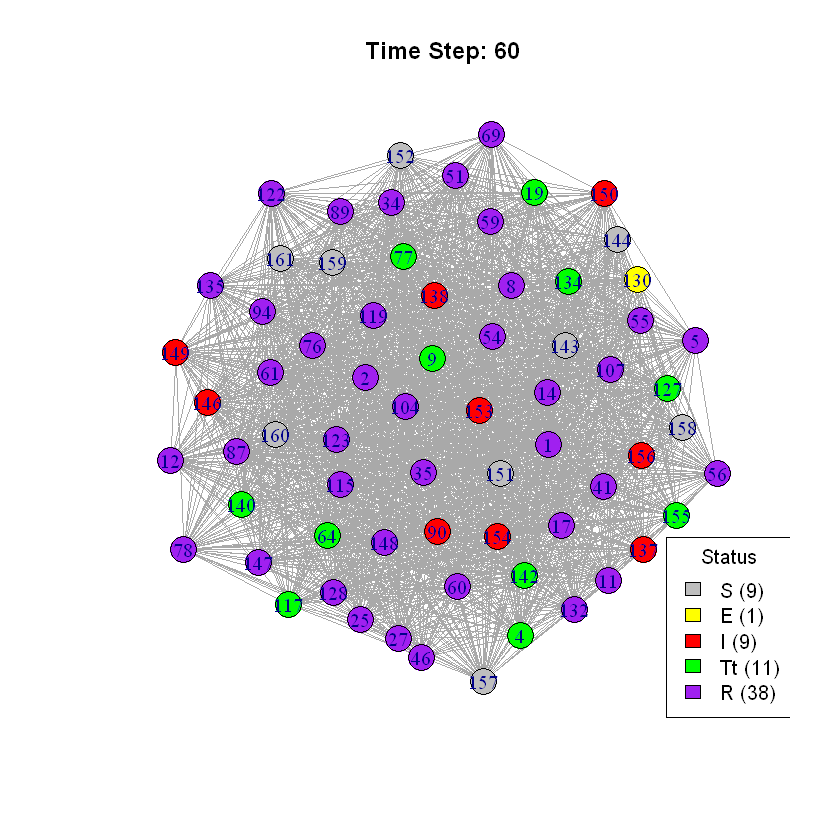

Time 71 : Node 156 with status R removed
Time 71 : New node 172 added with status S 
Time 71 : Node 151 changed status from E to I
Time 72 : Node 19 with status Tt removed
Time 72 : New node 173 added with status S 
Time 72 : Node 155 changed status from Tt to R
Time 73 : Node 144 with status E removed
Time 73 : New node 174 added with status S 
Time 73 : Node 143 changed status from I to Tt
Time 73 : Node 174 changed status from S to E
Time 74 : Node 128 with status R removed
Time 74 : New node 175 added with status S 
Time 74 : Node 157 changed status from S to E
Time 74 : Node 166 changed status from S to E
Time 75 : Node 46 with status R removed
Time 75 : New node 176 added with status S 
Time 75 : Node 140 changed status from Tt to R
Time 75 : Node 174 changed status from E to I
Time 75 : Node 175 changed status from S to E
Time 76 : Node 51 with status R removed
Time 76 : New node 177 added with status S 
Time 76 : Node 168 changed status from E to I
Time 77 : Node 168 with statu

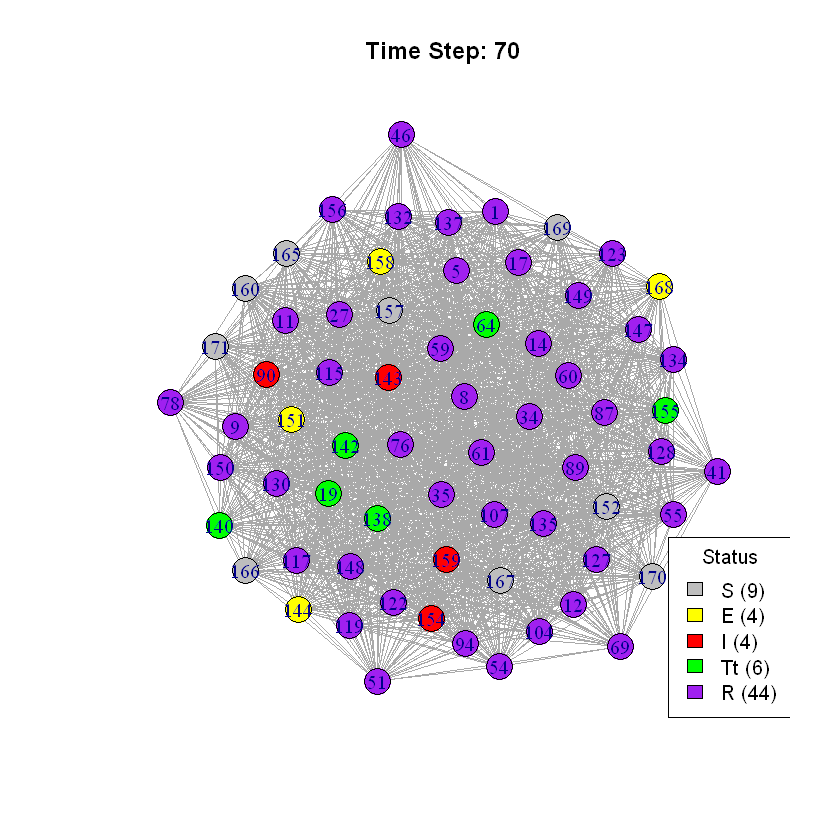

Time 81 : Node 151 with status I removed due to Infection
Time 81 : Node 55 with status R removed
Time 81 : New node 182 added with status S 
Time 82 : Node 179 with status E removed
Time 82 : New node 183 added with status S 
Time 82 : Node 154 changed status from I to Tt
Time 82 : Node 165 changed status from S to E
Time 83 : Node 158 with status I removed due to Infection
Time 83 : Node 176 with status S removed
Time 83 : New node 184 added with status S 
Time 83 : Node 166 changed status from E to I
Time 83 : Node 175 changed status from E to I
Time 84 : Node 69 with status R removed
Time 84 : New node 185 added with status S 
Time 84 : Node 160 changed status from E to I
Time 85 : Node 149 with status R removed
Time 85 : New node 186 added with status S 
Time 85 : Node 138 changed status from Tt to R
Time 85 : Node 165 changed status from E to I
Time 86 : Node 54 with status R removed
Time 86 : New node 187 added with status S 
Time 86 : Node 170 changed status from E to I
Time 86

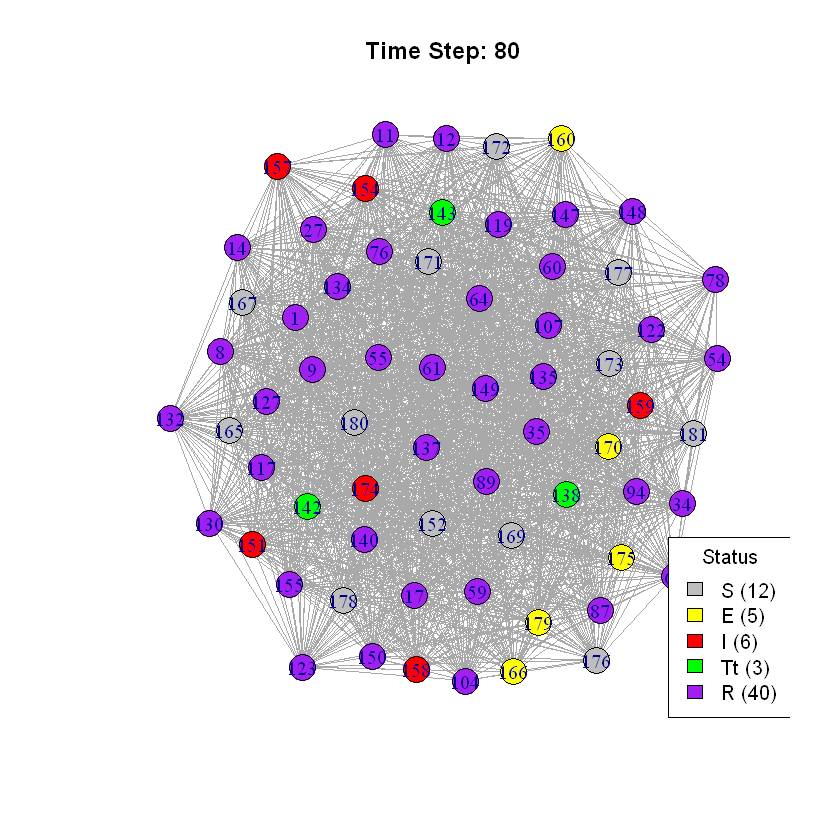

Time 91 : Node 89 with status R removed
Time 91 : New node 192 added with status S 
Time 91 : Node 192 changed status from S to E
Time 92 : Node 175 with status I removed
Time 92 : New node 193 added with status S 
Time 92 : Node 154 changed status from Tt to R
Time 93 : Node 154 with status R removed
Time 93 : New node 194 added with status S 
Time 93 : Node 152 changed status from S to E
Time 93 : Node 171 changed status from S to E
Time 93 : Node 183 changed status from S to E
Time 93 : Node 184 changed status from S to E
Time 94 : Node 9 with status R removed
Time 94 : New node 195 added with status S 
Time 94 : Node 171 changed status from E to I
Time 94 : Node 181 changed status from E to I
Time 95 : Node 34 with status R removed
Time 95 : New node 196 added with status S 
Time 95 : Node 167 changed status from E to I
Time 95 : Node 170 changed status from I to Tt
Time 95 : Node 193 changed status from S to E
Time 96 : Node 171 with status I removed due to Infection
Time 96 : Nod

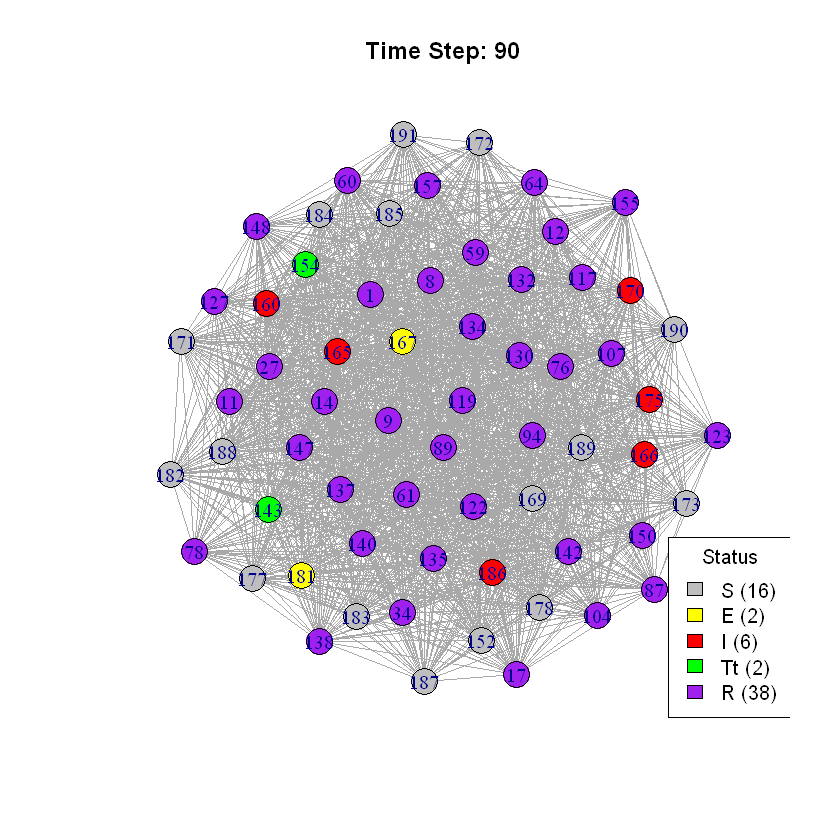

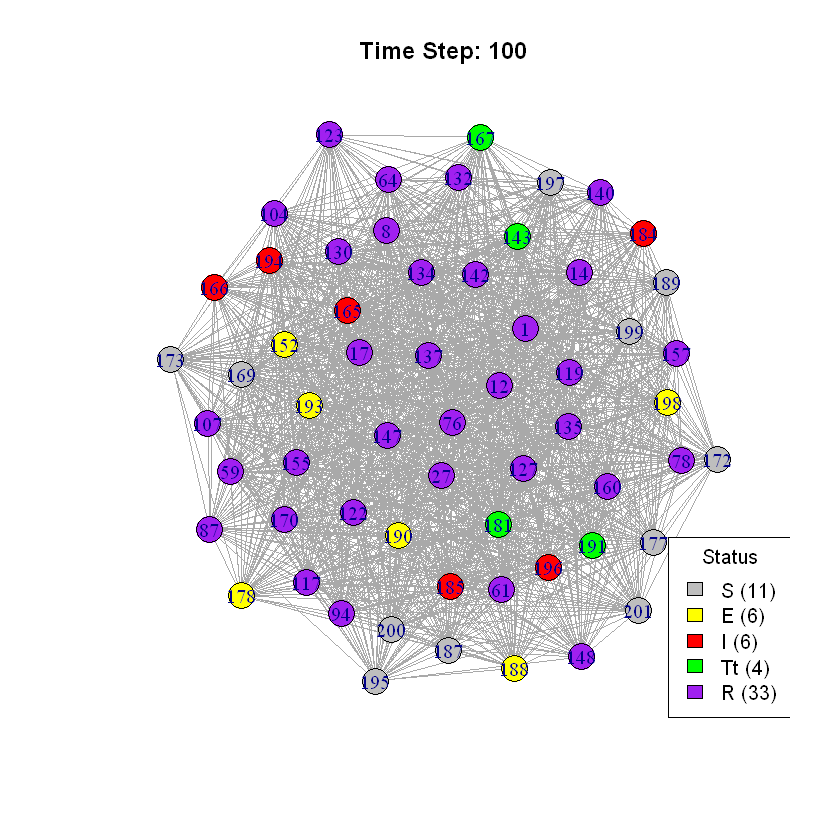

In [5]:
# Initialize a counter for the node labels
node_counter <- vcount(g)

# Iterate over time steps
for (t in times) {
  # Save old statuses for tracking changes
  old_status <- V(g)$status
  
  # Remove nodes deceased due to Infection (count = delta_I * I)
  nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
  nodes_with_status_I <- which(V(g)$status == "I")
  
  # Check if the number of nodes to remove is less than 1
  if (nodes_to_remove_count < 1) {
    # Generate a random number between 0 and 1
    random_number <- runif(1)
    
    # Check if the random number is greater than nodes_to_remove_count
    if (random_number < nodes_to_remove_count) {
      node_to_remove <- sample(nodes_with_status_I, 1)
      
      # Print node to be removed
      cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed due to Infection\n")
      
      # Remove the selected node
      g <- delete_vertices(g, node_to_remove)
    }
  } else {
    for (i in 1:nodes_to_remove_count){
      node_to_remove <- sample(nodes_with_status_I, 1)
      
      # Print node to be removed
      cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed due to Infection\n")
      
      # Remove the selected node
      g <- delete_vertices(g, node_to_remove)
    }
  }
  
  # Remove nodes for deceased (count = mu * N)
  for (i in 1:(mu * N)) {
    node_to_remove <- sample(vcount(g), 1)
    
    # Print node to be removed
    cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed\n")
    
    # Remove node from graph
    g <- delete_vertices(g, node_to_remove)
  }
  
  # Add new nodes to the network (count = Lambda)
  for (i in 1:(Lambda)) {
    node_counter <- node_counter + 1
    new_status <- "S"
    new_label <- node_counter  # Use the counter for the label
    
    g <- add_vertices(g, 1)
    V(g)[vcount(g)]$status <- new_status
    V(g)[vcount(g)]$label <- new_label  # Assign label to new node
    
    # Get the degree of each node
    degree <- degree(g, mode = "all")
    # Calculate the average degree
    avg_degree <- mean(degree)
    # Calculate the probability of attaching to each node
    prob <- degree / sum(degree)
  
    # Choose nodes to attach to
    nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
    
    # Add edges to these nodes
    for (node_to_attach in nodes_to_attach) {
      if (V(g)[node_to_attach]$label != new_label) { # No self edges
        g <- add_edges(g, c(vcount(g), node_to_attach))
      }
    }
    
    # Print new node
    cat("Time", t, ": New node", new_label, "added with status", new_status, "\n")
  }
  
  # Iterate over nodes for status changes
  for (i in V(g)) {
    # Get current status
    status <- V(g)[i]$status
    
    # Generate a random number
    rand <- runif(1)
    
    # Update status based on model parameters and current status
    if (status == "S") {
      # Get the statuses of the node's neighbors
      neighbor_statuses <- V(g)[neighbors(g, i)]$status
      # Check if any neighbor is E or I and rnd < beta1 * I / N
      if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
        V(g)[i]$status <- "E"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from S to E\n")
      }
    } # Else if status = E, check if rnd < beta2 
    else if (status == "E" && rand < beta2) {
      V(g)[i]$status <- "I"
      cat("Time", t, ": Node", V(g)[i]$label, "changed status from E to I\n")
    } # Else if status = I, check if rnd < beta3, else if rnd < alpha1  
    else if (status == "I") {
      if (rand < beta3) {
        V(g)[i]$status <- "R"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from I to R\n")
      } else if (rand < alpha1) {
        V(g)[i]$status <- "Tt"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from I to Tt\n")
      }
    } # Else if status = Tt, check if rnd < alpha2 
    else if (status == "Tt" && rand < alpha2) {
      V(g)[i]$status <- "R"
      cat("Time", t, ": Node", V(g)[i]$label, "changed status from Tt to R\n")
    }
  }
  
  # Store counts
  S_count[t+1] <- sum(V(g)$status == "S")
  E_count[t+1] <- sum(V(g)$status == "E")
  I_count[t+1] <- sum(V(g)$status == "I")
  Tt_count[t+1] <- sum(V(g)$status == "Tt")
  R_count[t+1] <- sum(V(g)$status == "R")
  N_count[t+1] <- vcount(g)
  
  # Calculate and store metrics
  degree_dist[[t+1]] <- degree_distribution(g)
  clustering_coeff[t+1] <- transitivity(g, type = "global")
  avg_path_length[t+1] <- mean_distance(g, directed = FALSE)
  comps <- components(g)
  largest_comp_size[t+1] <- max(comps$csize)
  
  # Plot network in every 10th time step
  if (t %% 10 == 0) {
    plot(g, vertex.color = status_colors[V(g)$status], vertex.size=10, vertex.label=V(g)$label)
    title(paste("Time Step:", t))
    status_counts <- table(V(g)$status)
    status_labels <- paste(names(status_colors), " (", status_counts[names(status_colors)], ")", sep = "")
    legend("bottomright", legend = status_labels, fill = status_colors, title = "Status")
  }
}

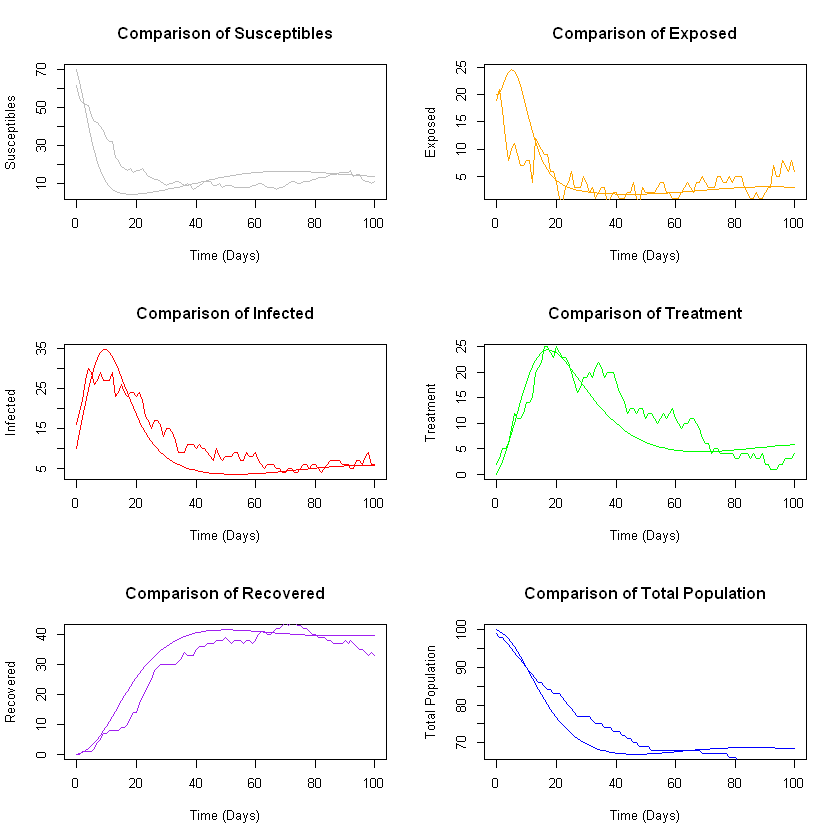

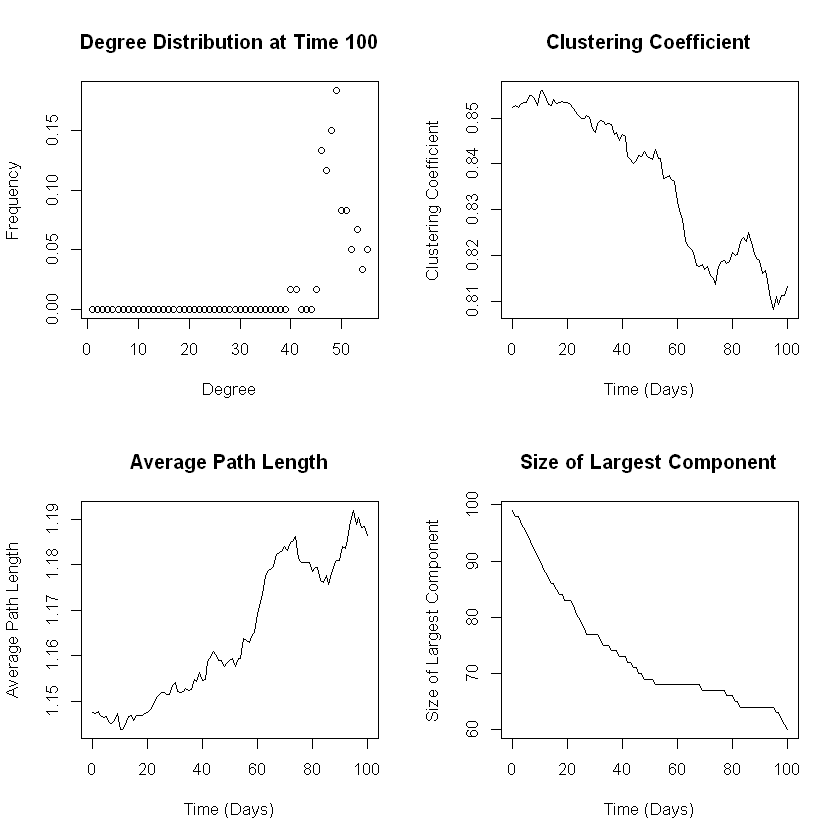

In [6]:
# Set up a single plot for comparison
par(mfrow = c(3, 2))
plot(out[, "time"], out[, "S"], type = "l", col = status_colors["S"], xlab = "Time (Days)", ylab = "Susceptibles", main = "Comparison of Susceptibles")
lines(times, S_count, col = status_colors["S"])
plot(out[, "time"], out[, "E"], type = "l", col = "orange", xlab = "Time (Days)", ylab = "Exposed", main = "Comparison of Exposed")
lines(times, E_count, col = "orange")
plot(out[, "time"], out[, "I"], type = "l", col = status_colors["I"], xlab = "Time (Days)", ylab = "Infected", main = "Comparison of Infected")
lines(times, I_count, col = status_colors["I"])
plot(out[, "time"], out[, "Tt"], type = "l", col = status_colors["Tt"], xlab = "Time (Days)", ylab = "Treatment", main = "Comparison of Treatment")
lines(times, Tt_count, col = status_colors["Tt"])
plot(out[, "time"], out[, "R"], type = "l", col = status_colors["R"], xlab = "Time (Days)", ylab = "Recovered", main = "Comparison of Recovered")
lines(times, R_count, col = status_colors["R"])
plot(out[, "time"], out[, "N"], type = "l", col = "blue", xlab = "Time (Days)", ylab = "Total Population", main = "Comparison of Total Population")
lines(times, N_count, col = "blue")

# Plot metrics
par(mfrow = c(2, 2))
plot(degree_dist[[t+1]], main = paste("Degree Distribution at Time", t), xlab = "Degree", ylab = "Frequency")
plot(times, clustering_coeff, type = "l", xlab = "Time (Days)", ylab = "Clustering Coefficient", main = "Clustering Coefficient")
plot(times, avg_path_length, type = "l", xlab = "Time (Days)", ylab = "Average Path Length", main = "Average Path Length")
plot(times, largest_comp_size, type = "l", xlab = "Time (Days)", ylab = "Size of Largest Component", main = "Size of Largest Component")

### Experiment 2: 4 Weakly Connected Clusters
In the second experiment, the model was applied to a single graph based on weakly connected clusters. This second graph is created to represent a small town where there are several farmsteads; the farmsteads are densely connected within and weakly connected to each other. The network graph consisted utilized in this experiment is based on four clusters, each with 50 nodes, generated using the Erdős–Rényi model with a connection probability of 0.7. Following these cluster formation, we connected these clusters by applying a daisy chain. In regards to that, to not lose connection between these clusters through the time steps due to deceased nodes that connect these clusters; when adding a new node, there was a small probability of that node having a connection to a random node from a different cluster. The initial conditions were set as follows: 170 Susceptible, 10 Infected, and 20 Exposed individuals. The Infected and Exposed individuals are selected from the same cluster. The model parameters were set to Lambda = 4, beta1 = 0.8, beta2 = 0.3, beta3 = 0.02, alpha1 = 0.1, alpha2 = 0.055, delta\_I = 0.03, delta\_T = 0.03, and mu = 0.02.

In [7]:
# Model Parameters
Lambda <- 4           # Number of births
beta1 <- 0.8           # S to E rate of transfer
beta2 <- 0.3           # E to I rate of transfer
beta3 <- 0.02          # I to R rate of transfer
alpha1 <- 0.1          # I to Tt rate of transfer (alpha1 - beta3)
alpha2 <- 0.055        # Tt to R rate of transfer
delta_I <- 0.03        # Rate of death due to Infection
delta_T <- 0.03
mu <- 0.02             # Rate of natural death
# Lambda is the number of nodes added at each time step. (1 for this example)
# mu * N + delta_I * I is the number of nodes removed at each time step. (1 + 0.3 for this example)
# With these parameters, total population is expected to decrease slowly.

# Reproduction number
R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

# Initial conditions
n <- 200
S <- 170
I <- 10
E <- 20
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

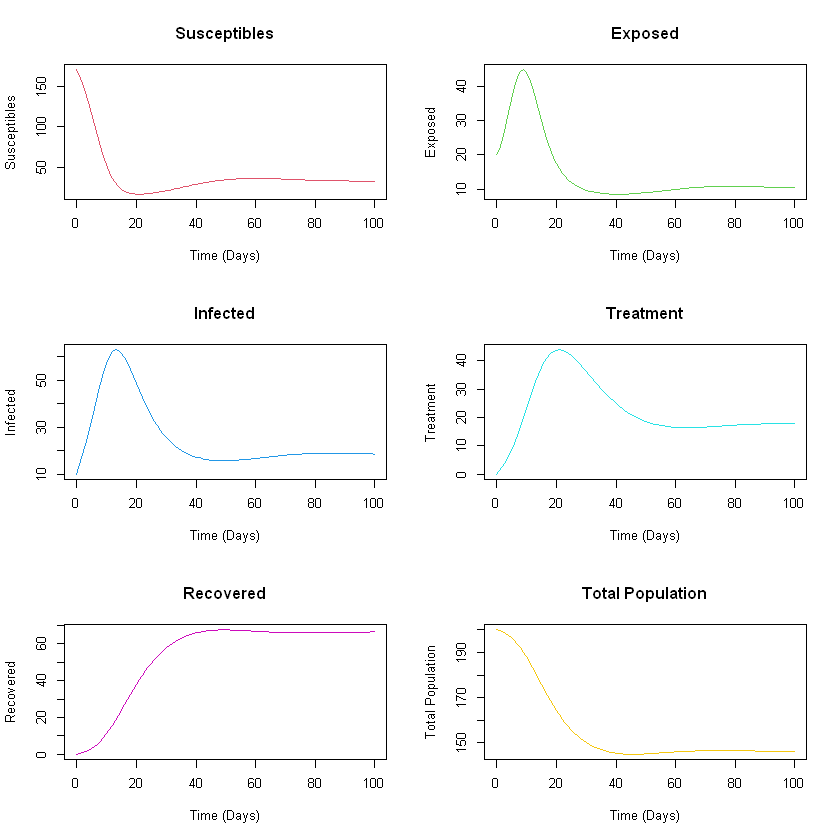

In [13]:
# Initial state
state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)

# Parameters
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)

# Time steps
times <- seq(0, 100, by = 1)

# Solve ODE
out <- ode(y = state, times = times, func = SEITR, parms = parameters)

# Plot each status separately
par(mfrow = c(3, 2))
plot(out[, "time"], out[, "S"], type = "l", col = 2, xlab = "Time (Days)", ylab = "Susceptibles", main = "Susceptibles")
plot(out[, "time"], out[, "E"], type = "l", col = 3, xlab = "Time (Days)", ylab = "Exposed", main = "Exposed")
plot(out[, "time"], out[, "I"], type = "l", col = 4, xlab = "Time (Days)", ylab = "Infected", main = "Infected")
plot(out[, "time"], out[, "Tt"], type = "l", col = 5, xlab = "Time (Days)", ylab = "Treatment", main = "Treatment")
plot(out[, "time"], out[, "R"], type = "l", col = 6, xlab = "Time (Days)", ylab = "Recovered", main = "Recovered")
plot(out[, "time"], out[, "N"], type = "l", col = 7, xlab = "Time (Days)", ylab = "Total Population", main = "Total Population")

[1] FALSE


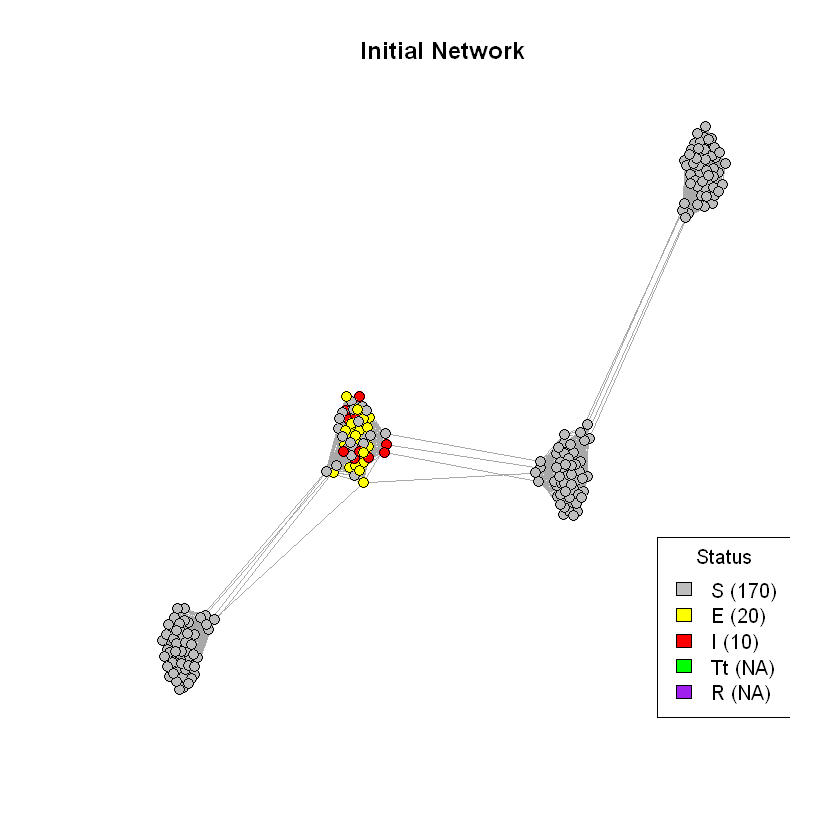

In [10]:
# Create the graph with 4 clusters and 50 nodes in each
npc <-50 # nodes per cluster
n_clust <- 4 # 4 clusters with 25 nodes each
matlist = list()
# Initialize the cluster vector
cluster_vector <- c()

for (i in 1:n_clust){ 
  matlist[[i]] = get.adjacency(erdos.renyi.game(npc, 0.7))
  
  # Assign each node in the current cluster to the cluster
  cluster_vector <- c(cluster_vector, rep(i, npc))
}

# merge clusters into one matrix
mat_clust <- bdiag(matlist)
k <- rowSums(mat_clust) 
print(any(k == 0))

node_vector <- seq(1,npc*n_clust)
for (i in node_vector){
  if (k[i]==0){ # if k=0, connect to something random
    j <- sample(node_vector[-i],1)
    mat_clust[i,j] <- 1
    mat_clust[j,i] <- 1
  }
}

g <- graph_from_adjacency_matrix(mat_clust, mode="undirected", diag=F)
comps <- components(g)
member_vec <- comps$membership
# daisy chain the components together
comp_ids <- seq(1,comps$no-1) # stop short of last one
for (curr_comp in comp_ids){
  # grab random nodes from consecutive components
  i <- sample(which(curr_comp==member_vec),1)
  j <- sample(which((curr_comp+1)==member_vec),1)
  
  # Determine the number of edges to add
  num_edges <- sample(1:5, 1)
  
  for (edge in 1:num_edges) {
    # Check if an edge already exists between the nodes
    if (!are_adjacent(g, i, j)) {
      # join them together
      mat_clust[i,j] <- 1
      mat_clust[j,i] <- 1
    }
    
    # Choose new nodes for the next edge
    i <- sample(which(curr_comp==member_vec),1)
    j <- sample(which((curr_comp+1)==member_vec),1)
  }
}

g <- graph_from_adjacency_matrix(mat_clust, mode="undirected", diag=F)
# Assign the cluster attribute to each vertex
V(g)$cluster <- cluster_vector

# Assign initial conditions to nodes
V(g)$label <- 1:n
V(g)$status <- "S"

# Select a cluster to initialize the infected and exposed nodes
init_cluster <- sample(1:n_clust, 1)

# Get the nodes in the selected cluster
init_cluster_nodes <- V(g)[member_vec == init_cluster]

# Randomly select nodes to be infected and exposed
init_I_nodes <- sample(init_cluster_nodes, I)
init_E_nodes <- sample(setdiff(init_cluster_nodes, init_I_nodes), E)

# Set the status of the selected nodes
V(g)[init_I_nodes]$status <- "I"
V(g)[init_E_nodes]$status <- "E"

# Initialize counters
S_count <- S
E_count <- E
I_count <- I
Tt_count <- Tt
R_count <- R
N_count <- N

# Initialize vectors to store metrics
degree_dist <- vector("list", length(times))
clustering_coeff <- numeric(length(times))
avg_path_length <- numeric(length(times))
largest_comp_size <- numeric(length(times))

# Color mapping for statuses
status_colors <- c("S" = "gray", "E" = "yellow", "I" = "red", "Tt" = "green", "R" = "purple")
par(mfrow = c(1, 1))

# Initial Network plot
plot(g, vertex.color = status_colors[V(g)$status], vertex.size=4, vertex.label="")
title(paste("Initial Network"))
status_counts <- table(V(g)$status)
status_labels <- paste(names(status_colors), " (", status_counts[names(status_colors)], ")", sep = "")
legend("bottomright", legend = status_labels, fill = status_colors, title = "Status")

Time 0 : Node 143 with status S removed
Time 0 : Node 46 with status S removed
Time 0 : Node 71 with status S removed
Time 0 : Node 129 with status E removed
Time 0 : New node 201 added with status S 
Time 0 : New node 202 added with status S 
Time 0 : New node 203 added with status S 
Time 0 : New node 204 added with status S 
Time 0 : Node 101 changed status from I to Tt
Time 0 : Node 106 changed status from S to E
Time 0 : Node 108 changed status from E to I
Time 0 : Node 110 changed status from E to I
Time 0 : Node 112 changed status from E to I
Time 0 : Node 114 changed status from E to I
Time 0 : Node 123 changed status from E to I
Time 0 : Node 131 changed status from E to I
Time 0 : Node 137 changed status from E to I
Time 0 : Node 139 changed status from E to I
Time 0 : Node 140 changed status from E to I
Time 0 : Node 141 changed status from E to I
Time 1 : Node 10 with status S removed
Time 1 : Node 198 with status S removed
Time 1 : Node 84 with status S removed
Time 1 : No

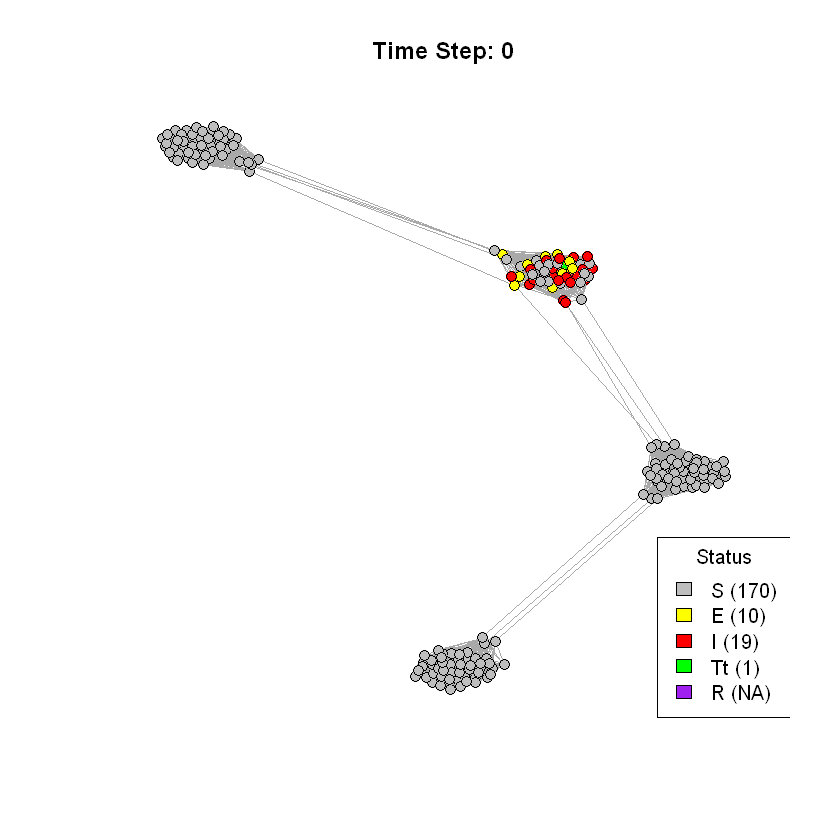

Time 11 : Node 141 with status I removed due to Infection
Time 11 : Node 69 with status S removed
Time 11 : Node 119 with status I removed
Time 11 : Node 224 with status S removed
Time 11 : Node 242 with status S removed
Time 11 : New node 245 added with status S 
Time 11 : New node 246 added with status S 
Time 11 : New node 247 added with status S 
Time 11 : New node 248 added with status S 
Time 11 : Node 101 changed status from Tt to R
Time 11 : Node 123 changed status from Tt to R
Time 11 : Node 125 changed status from I to R
Time 11 : Node 142 changed status from E to I
Time 12 : Node 54 with status S removed
Time 12 : Node 219 with status E removed
Time 12 : Node 205 with status S removed
Time 12 : Node 183 with status S removed
Time 12 : New node 249 added with status S 
Time 12 : New node 250 added with status S 
Time 12 : New node 251 added with status S 
Time 12 : New node 252 added with status S 
Time 12 : Node 109 changed status from Tt to R
Time 12 : Node 110 changed stat

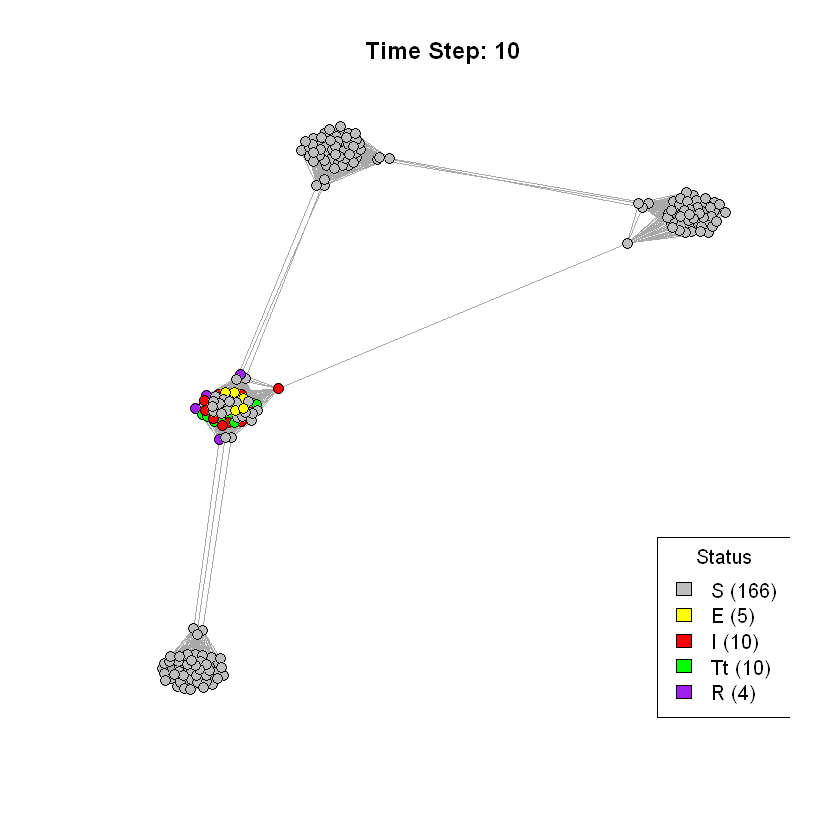

Time 21 : Node 156 with status S removed
Time 21 : Node 204 with status S removed
Time 21 : Node 278 with status S removed
Time 21 : Node 206 with status I removed
Time 21 : New node 285 added with status S 
Time 21 : New node 286 added with status S 
Time 21 : New node 287 added with status S 
Time 21 : New node 288 added with status S 
Time 21 : Node 139 changed status from Tt to R
Time 21 : Node 150 changed status from I to Tt
Time 22 : Node 16 with status S removed
Time 22 : Node 148 with status I removed
Time 22 : Node 117 with status Tt removed
Time 22 : Node 30 with status S removed
Time 22 : New node 289 added with status S 
Time 22 : New node 290 added with status S 
Time 22 : New node 291 added with status S 
Time 22 : New node 292 added with status S 
Time 22 : Node 110 changed status from Tt to R
Time 22 : Node 136 changed status from I to Tt
Time 22 : Node 243 changed status from I to Tt
Time 22 : Node 286 changed status from S to E
Time 23 : Node 235 with status I removed

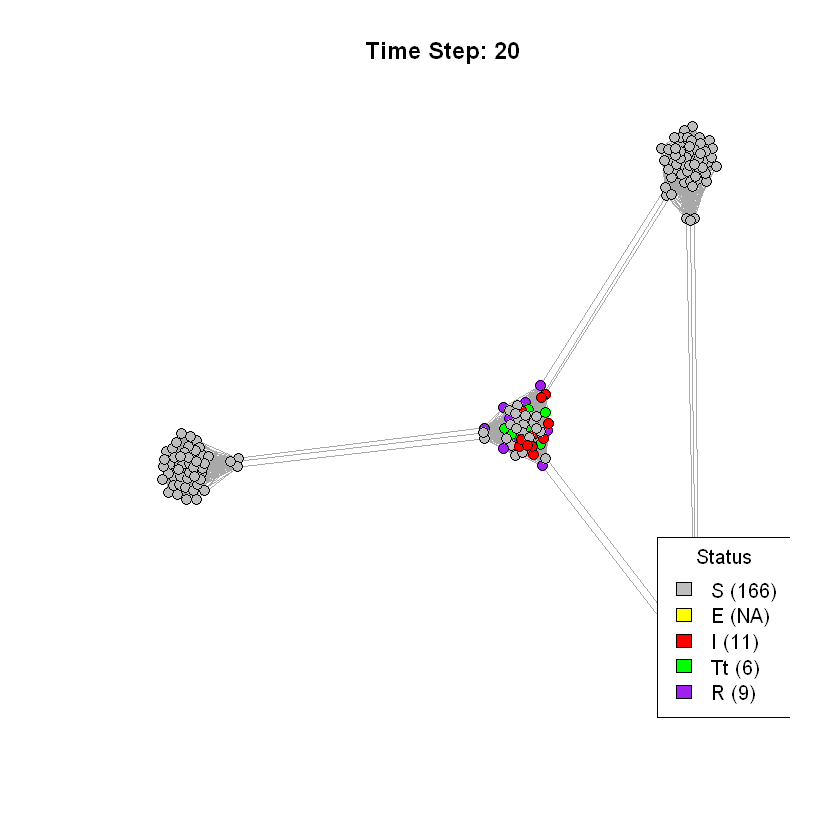

Time 31 : Node 182 with status S removed
Time 31 : Node 47 with status S removed
Time 31 : Node 191 with status S removed
Time 31 : Node 245 with status S removed
Time 31 : New node 325 added with status S 
Time 31 : New node 326 added with status S 
Time 31 : New node 327 added with status S 
Time 31 : New node 328 added with status S 
Time 31 : Node 53 changed status from S to E
Time 31 : Node 56 changed status from S to E
Time 31 : Node 77 changed status from E to I
Time 31 : Node 82 changed status from S to E
Time 31 : Node 97 changed status from E to I
Time 31 : Node 100 changed status from E to I
Time 31 : Node 135 changed status from E to I
Time 31 : Node 237 changed status from S to E
Time 32 : Node 85 with status S removed
Time 32 : Node 326 with status S removed
Time 32 : Node 317 with status S removed
Time 32 : Node 31 with status S removed
Time 32 : New node 329 added with status S 
Time 32 : New node 330 added with status S 
Time 32 : New node 331 added with status S 
Time

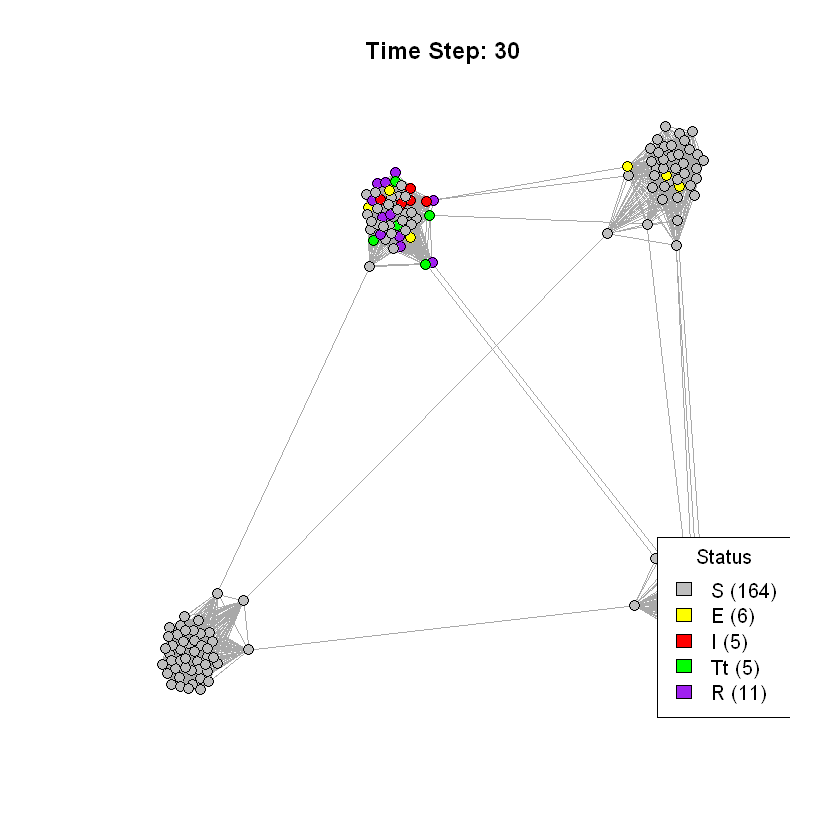

Time 41 : Node 171 with status I removed due to Infection
Time 41 : Node 77 with status Tt removed
Time 41 : Node 64 with status S removed
Time 41 : Node 358 with status S removed
Time 41 : Node 51 with status S removed
Time 41 : New node 365 added with status S 
Time 41 : New node 366 added with status S 
Time 41 : New node 367 added with status S 
Time 41 : New node 368 added with status S 
Time 41 : Node 52 changed status from E to I
Time 41 : Node 60 changed status from S to E
Time 41 : Node 159 changed status from S to E
Time 41 : Node 164 changed status from S to E
Time 41 : Node 314 changed status from E to I
Time 41 : Node 318 changed status from E to I
Time 41 : Node 345 changed status from S to E
Time 41 : Node 365 changed status from S to E
Time 42 : Node 305 with status S removed
Time 42 : Node 282 with status S removed
Time 42 : Node 345 with status E removed
Time 42 : Node 275 with status S removed
Time 42 : New node 369 added with status S 
Time 42 : New node 370 added w

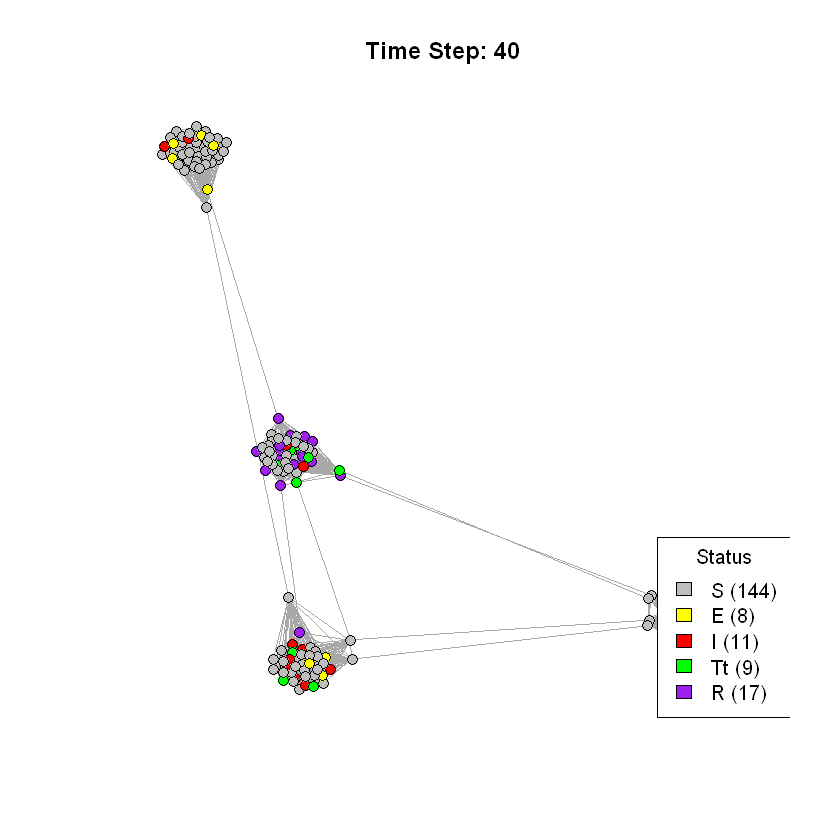

Time 51 : Node 391 with status I removed due to Infection
Time 51 : Node 180 with status S removed
Time 51 : Node 284 with status S removed
Time 51 : Node 250 with status S removed
Time 51 : Node 385 with status S removed
Time 51 : New node 405 added with status S 
Time 51 : New node 406 added with status S 
Time 51 : New node 407 added with status S 
Time 51 : New node 408 added with status S 
Time 51 : Node 78 changed status from E to I
Time 51 : Node 82 changed status from Tt to R
Time 51 : Node 176 changed status from S to E
Time 51 : Node 277 changed status from I to R
Time 51 : Node 287 changed status from E to I
Time 51 : Node 308 changed status from I to Tt
Time 51 : Node 309 changed status from Tt to R
Time 51 : Node 312 changed status from I to R
Time 52 : Node 379 with status I removed
Time 52 : Node 277 with status R removed
Time 52 : Node 306 with status R removed
Time 52 : Node 371 with status S removed
Time 52 : New node 409 added with status S 
Time 52 : New node 410 ad

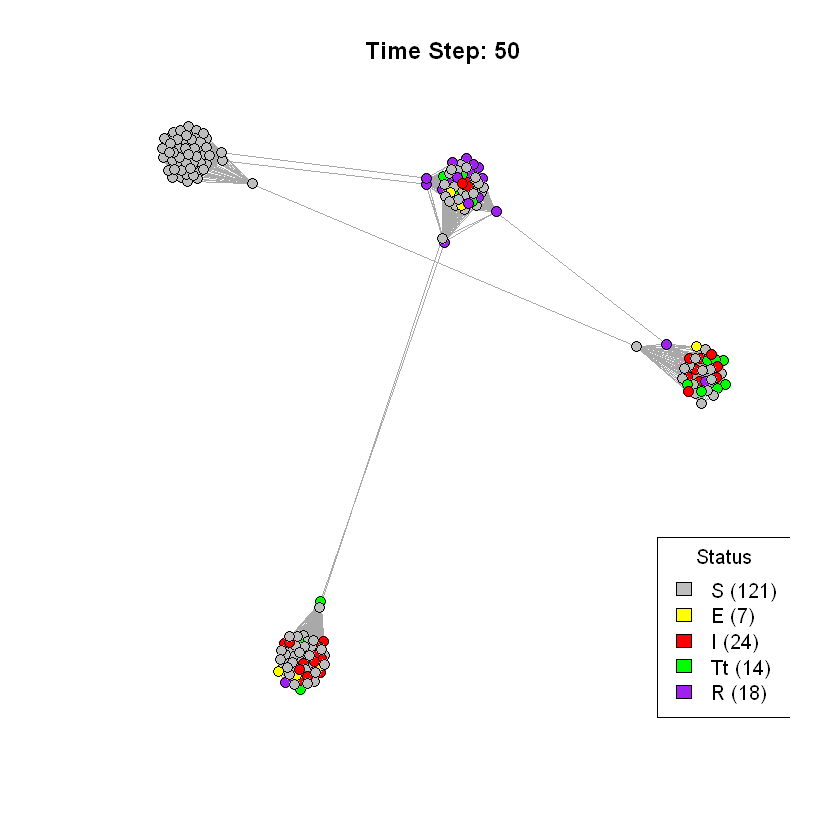

Time 61 : Node 421 with status E removed
Time 61 : Node 416 with status S removed
Time 61 : Node 281 with status S removed
Time 61 : Node 362 with status S removed
Time 61 : New node 445 added with status S 
Time 61 : New node 446 added with status S 
Time 61 : New node 447 added with status S 
Time 61 : New node 448 added with status S 
Time 61 : Node 99 changed status from E to I
Time 61 : Node 160 changed status from I to Tt
Time 61 : Node 366 changed status from E to I
Time 61 : Node 423 changed status from E to I
Time 61 : Node 438 changed status from S to E
Time 62 : Node 409 with status I removed due to Infection
Time 62 : Node 276 with status S removed
Time 62 : Node 328 with status S removed
Time 62 : Node 348 with status Tt removed
Time 62 : Node 159 with status R removed
Time 62 : New node 449 added with status S 
Time 62 : New node 450 added with status S 
Time 62 : New node 451 added with status S 
Time 62 : New node 452 added with status S 
Time 62 : Node 168 changed stat

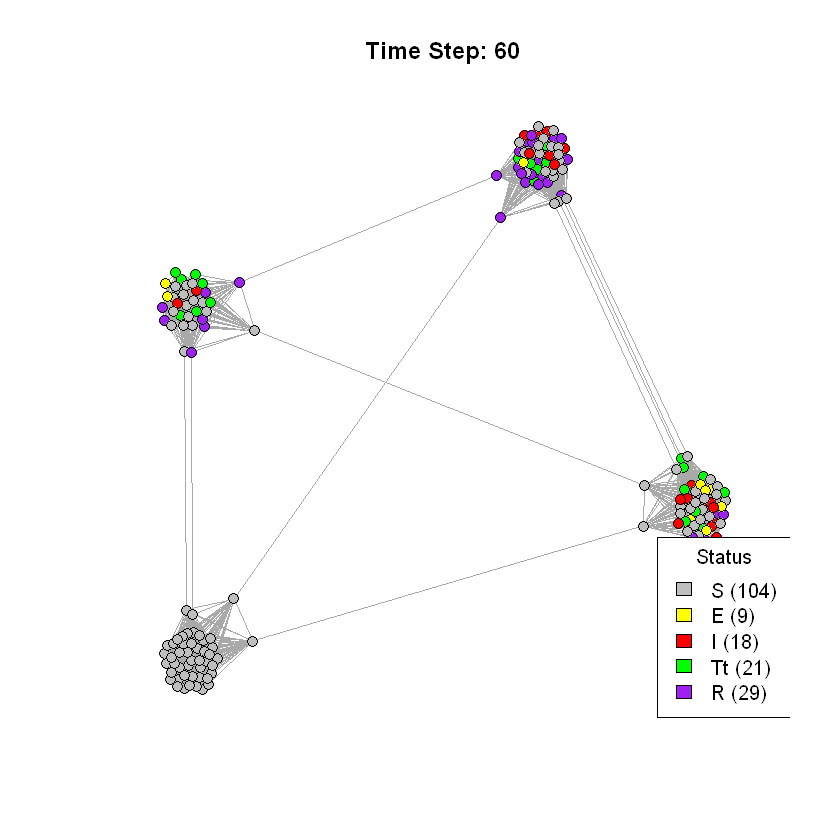

Time 71 : Node 370 with status I removed due to Infection
Time 71 : Node 20 with status S removed
Time 71 : Node 23 with status S removed
Time 71 : Node 333 with status S removed
Time 71 : Node 395 with status S removed
Time 71 : New node 485 added with status S 
Time 71 : New node 486 added with status S 
Time 71 : New node 487 added with status S 
Time 71 : New node 488 added with status S 
Time 71 : Node 292 changed status from I to Tt
Time 71 : Node 470 changed status from E to I
Time 72 : Node 432 with status I removed due to Infection
Time 72 : Node 350 with status R removed
Time 72 : Node 338 with status R removed
Time 72 : Node 150 with status R removed
Time 72 : Node 27 with status S removed
Time 72 : New node 489 added with status S 
Time 72 : New node 490 added with status S 
Time 72 : New node 491 added with status S 
Time 72 : New node 492 added with status S 
Time 72 : Node 330 changed status from I to Tt
Time 72 : Node 337 changed status from Tt to R
Time 72 : Node 355 c

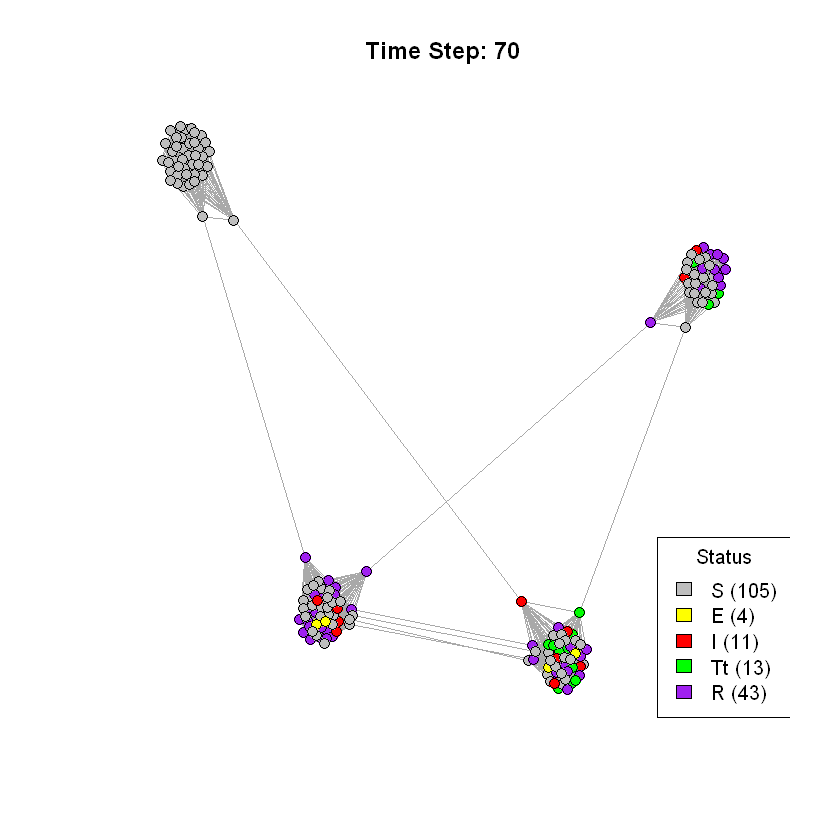

Time 81 : Node 520 with status S removed
Time 81 : Node 399 with status R removed
Time 81 : Node 514 with status S removed
Time 81 : Node 462 with status E removed
Time 81 : New node 525 added with status S 
Time 81 : New node 526 added with status S 
Time 81 : New node 527 added with status S 
Time 81 : New node 528 added with status S 
Time 81 : Node 153 changed status from S to E
Time 81 : Node 428 changed status from I to Tt
Time 81 : Node 434 changed status from S to E
Time 81 : Node 496 changed status from I to Tt
Time 81 : Node 504 changed status from E to I
Time 81 : Node 512 changed status from E to I
Time 82 : Node 392 with status I removed due to Infection
Time 82 : Node 501 with status S removed
Time 82 : Node 61 with status R removed
Time 82 : Node 509 with status S removed
Time 82 : Node 470 with status Tt removed
Time 82 : New node 529 added with status S 
Time 82 : New node 530 added with status S 
Time 82 : New node 531 added with status S 
Time 82 : New node 532 added

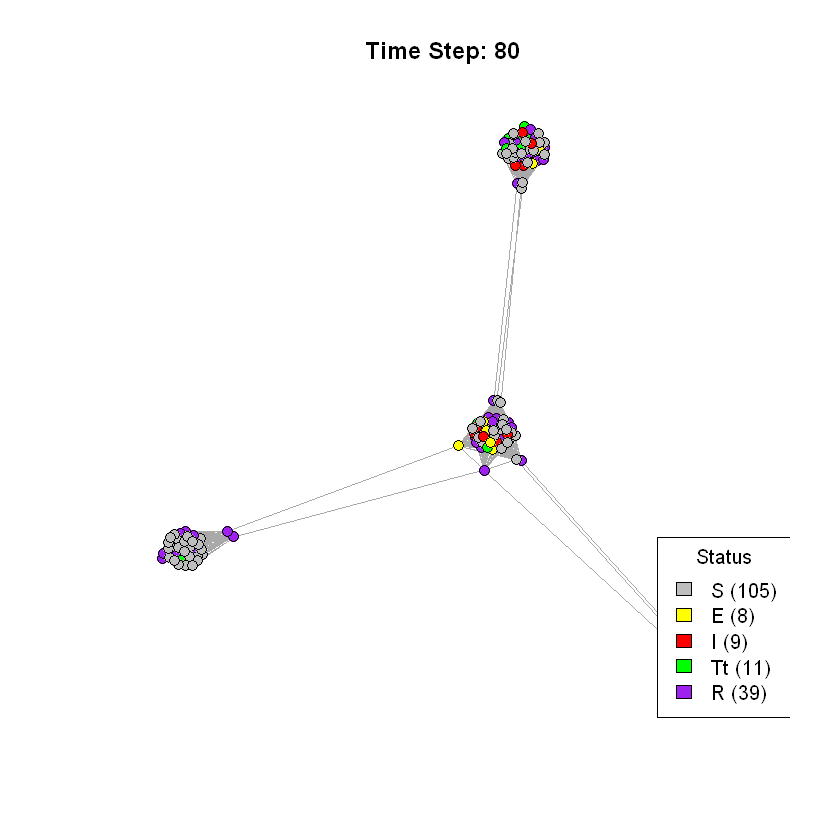

Time 91 : Node 533 with status S removed
Time 91 : Node 563 with status S removed
Time 91 : Node 511 with status S removed
Time 91 : Node 472 with status S removed
Time 91 : New node 565 added with status S 
Time 91 : New node 566 added with status S 
Time 91 : New node 567 added with status S 
Time 91 : New node 568 added with status S 
Time 91 : Node 411 changed status from I to Tt
Time 91 : Node 438 changed status from Tt to R
Time 92 : Node 490 with status S removed
Time 92 : Node 384 with status S removed
Time 92 : Node 228 with status S removed
Time 92 : Node 438 with status R removed
Time 92 : New node 569 added with status S 
Time 92 : New node 570 added with status S 
Time 92 : New node 571 added with status S 
Time 92 : New node 572 added with status S 
Time 92 : Node 413 changed status from E to I
Time 92 : Node 434 changed status from I to R
Time 92 : Node 497 changed status from I to Tt
Time 92 : Node 513 changed status from E to I
Time 92 : Node 549 changed status from E 

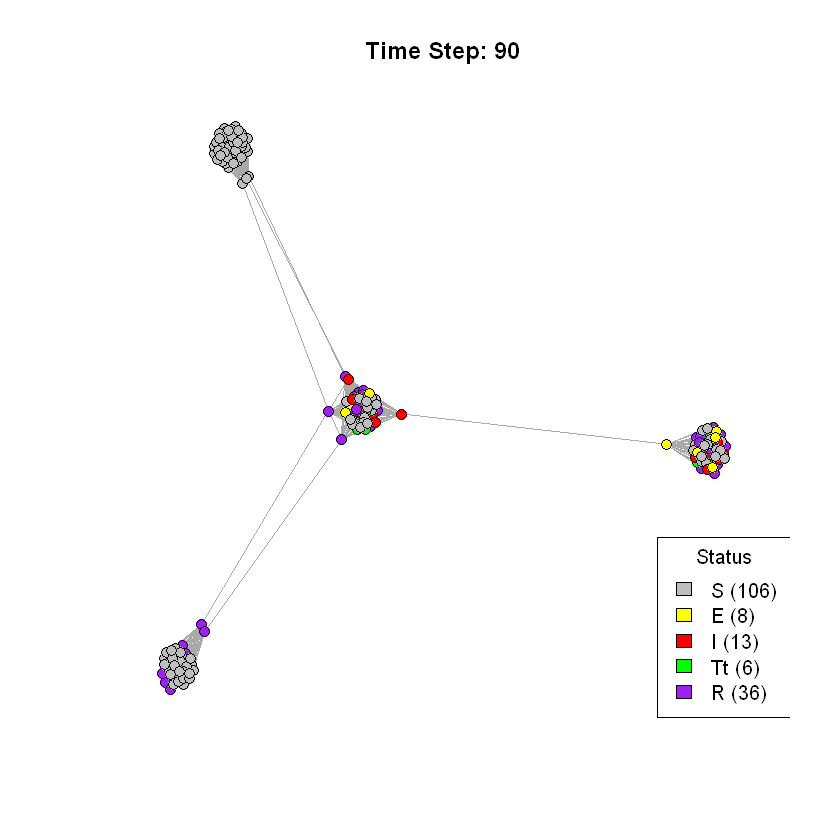

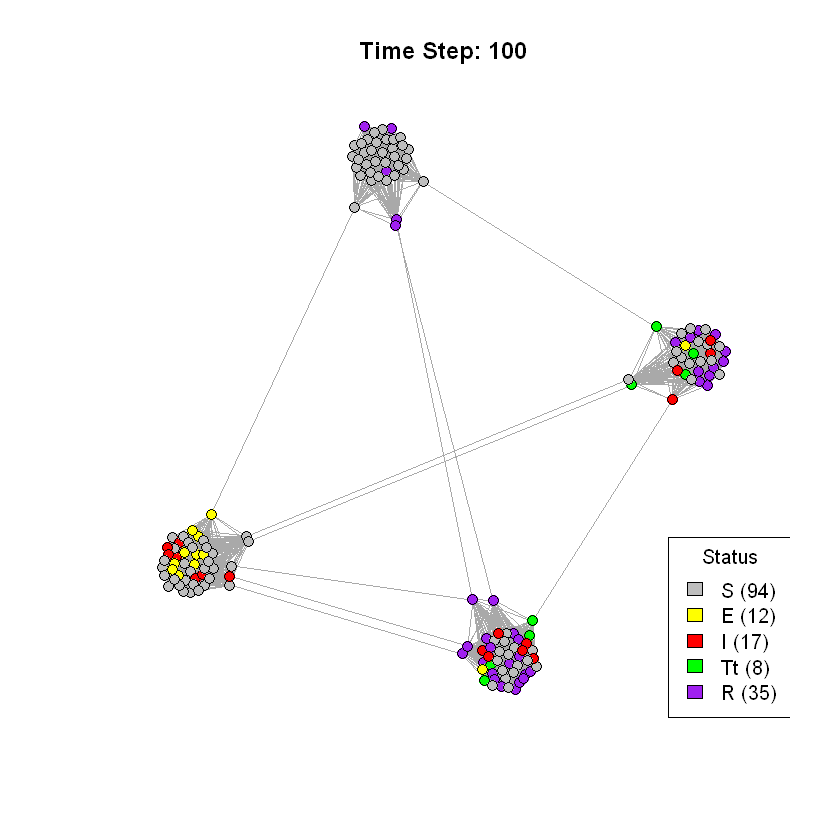

In [11]:
# Initialize a counter for the node labels
node_counter <- vcount(g)

# Iterate over time steps
for (t in times) {
  # Save old statuses for tracking changes
  old_status <- V(g)$status
  
  # Remove nodes deceased due to Infection (count = delta_I * I)
  nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
  nodes_with_status_I <- which(V(g)$status == "I")
  
  # Check if the number of nodes to remove is less than 1
  if (nodes_to_remove_count < 1) {
    # Generate a random number between 0 and 1
    random_number <- runif(1)
    
    # Check if the random number is greater than nodes_to_remove_count
    if (random_number < nodes_to_remove_count) {
      node_to_remove <- sample(nodes_with_status_I, 1)
      
      # Print node to be removed
      cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed due to Infection\n")
      
      # Remove the selected node
      g <- delete_vertices(g, node_to_remove)
    }
  } else {
    for (i in 1:nodes_to_remove_count){
      node_to_remove <- sample(nodes_with_status_I, 1)
      
      # Print node to be removed
      cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed due to Infection\n")
      
      # Remove the selected node
      g <- delete_vertices(g, node_to_remove)
    }
  }
  
  # Remove nodes for deceased (count = mu * N)
  for (i in 1:(mu * N)) {
    node_to_remove <- sample(vcount(g), 1)
    
    # Print node to be removed
    cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed\n")
    
    # Remove node from graph
    g <- delete_vertices(g, node_to_remove)
  }
  
  # Add new nodes to the network (count = Lambda)
  for (i in 1:(Lambda)) {
    node_counter <- node_counter + 1
    new_status <- "S"
    new_label <- node_counter
    
    g <- add_vertices(g, 1)
    V(g)[vcount(g)]$status <- new_status
    V(g)[vcount(g)]$label <- new_label
    
    # Assign new node to a cluster
    new_cluster <- sample(1:n_clust, 1)
    V(g)[vcount(g)]$cluster <- new_cluster  # Assign the new node to a cluster
    
    # Get the nodes in the same cluster
    same_cluster_nodes <- V(g)[V(g)$cluster == new_cluster]
    
    # Calculate the probability of attaching to each node in the same cluster
    prob_same_cluster <- degree(g, v = same_cluster_nodes, mode = "all") / sum(degree(g, v = same_cluster_nodes, mode = "all"))
    
    # Determine the number of nodes to attach
    num_nodes_to_attach <- min(sum(prob_same_cluster > 0), round(avg_degree))
    
    # Choose nodes to attach to within the same cluster
    nodes_to_attach_same_cluster <- sample(same_cluster_nodes, size = num_nodes_to_attach, prob = prob_same_cluster)
    
    # Add edges to these nodes
    for (node_to_attach in nodes_to_attach_same_cluster) {
      if (V(g)[node_to_attach]$label != new_label) { # No self edges
        g <- add_edges(g, c(vcount(g), node_to_attach))
      }
    }
    
    # With a small probability, add an edge to a node in a different cluster
    if (runif(1) < 0.1) { # Adjust this probability as needed
      different_cluster_nodes <- V(g)[V(g)$cluster != new_cluster]
      if(length(different_cluster_nodes) > 0) {
        node_to_attach_different_cluster <- sample(different_cluster_nodes, 1)
        g <- add_edges(g, c(vcount(g), node_to_attach_different_cluster))
      }
    }
    
    # Print new node
    cat("Time", t, ": New node", new_label, "added with status", new_status, "\n")
  }
  
  # Iterate over nodes for status changes
  for (i in V(g)) {
    # Get current status
    status <- V(g)[i]$status
    
    # Generate a random number
    rand <- runif(1)
    
    # Update status based on model parameters and current status
    if (status == "S") {
      # Get the statuses of the node's neighbors
      neighbor_statuses <- V(g)[neighbors(g, i)]$status
      # Check if any neighbor is E or I and rnd < beta1 * I / N
      if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
        V(g)[i]$status <- "E"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from S to E\n")
      }
    } # Else if status = E, check if rnd < beta2 
    else if (status == "E" && rand < beta2) {
      V(g)[i]$status <- "I"
      cat("Time", t, ": Node", V(g)[i]$label, "changed status from E to I\n")
    } # Else if status = I, check if rnd < beta3, else if rnd < alpha1  
    else if (status == "I") {
      if (rand < beta3) {
        V(g)[i]$status <- "R"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from I to R\n")
      } else if (rand < alpha1) {
        V(g)[i]$status <- "Tt"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from I to Tt\n")
      }
    } # Else if status = Tt, check if rnd < alpha2 
    else if (status == "Tt" && rand < alpha2) {
      V(g)[i]$status <- "R"
      cat("Time", t, ": Node", V(g)[i]$label, "changed status from Tt to R\n")
    }
  }
  
  # Store counts
  S_count[t+1] <- sum(V(g)$status == "S")
  E_count[t+1] <- sum(V(g)$status == "E")
  I_count[t+1] <- sum(V(g)$status == "I")
  Tt_count[t+1] <- sum(V(g)$status == "Tt")
  R_count[t+1] <- sum(V(g)$status == "R")
  N_count[t+1] <- vcount(g)
  
  # Calculate and store metrics
  degree_dist[[t+1]] <- degree_distribution(g)
  clustering_coeff[t+1] <- transitivity(g, type = "global")
  avg_path_length[t+1] <- mean_distance(g, directed = FALSE)
  comps <- components(g)
  largest_comp_size[t+1] <- max(comps$csize)
  
  # Plot network in every 10th time step
  if (t %% 10 == 0) {
    plot(g, vertex.color = status_colors[V(g)$status], vertex.size=4, vertex.label="")
    title(paste("Time Step:", t))
    status_counts <- table(V(g)$status)
    status_labels <- paste(names(status_colors), " (", status_counts[names(status_colors)], ")", sep = "")
    legend("bottomright", legend = status_labels, fill = status_colors, title = "Status")
  }
}

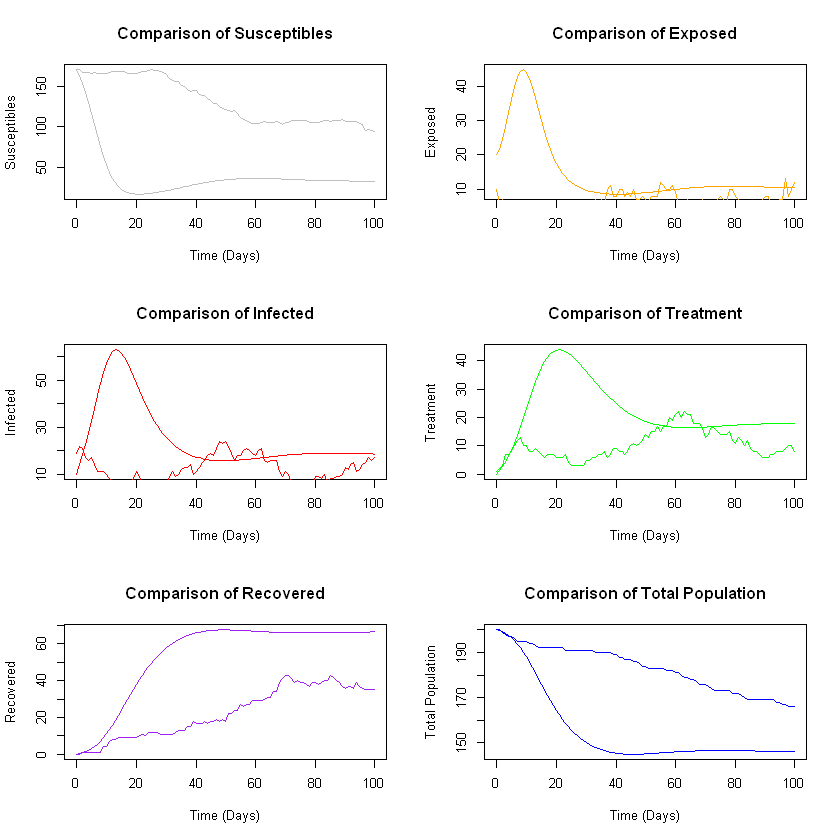

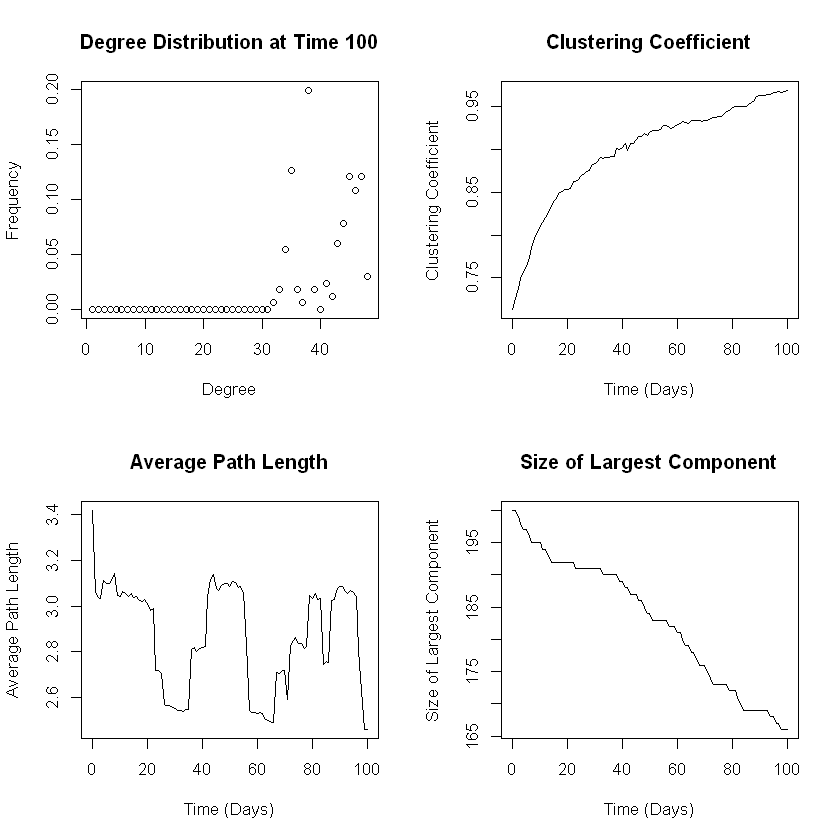

In [14]:
# Set up a single plot for comparison
par(mfrow = c(3, 2))
plot(out[, "time"], out[, "S"], type = "l", col = status_colors["S"], xlab = "Time (Days)", ylab = "Susceptibles", main = "Comparison of Susceptibles")
lines(times, S_count, col = status_colors["S"])
plot(out[, "time"], out[, "E"], type = "l", col = "orange", xlab = "Time (Days)", ylab = "Exposed", main = "Comparison of Exposed")
lines(times, E_count, col = "orange")
plot(out[, "time"], out[, "I"], type = "l", col = status_colors["I"], xlab = "Time (Days)", ylab = "Infected", main = "Comparison of Infected")
lines(times, I_count, col = status_colors["I"])
plot(out[, "time"], out[, "Tt"], type = "l", col = status_colors["Tt"], xlab = "Time (Days)", ylab = "Treatment", main = "Comparison of Treatment")
lines(times, Tt_count, col = status_colors["Tt"])
plot(out[, "time"], out[, "R"], type = "l", col = status_colors["R"], xlab = "Time (Days)", ylab = "Recovered", main = "Comparison of Recovered")
lines(times, R_count, col = status_colors["R"])
plot(out[, "time"], out[, "N"], type = "l", col = "blue", xlab = "Time (Days)", ylab = "Total Population", main = "Comparison of Total Population")
lines(times, N_count, col = "blue")

# Plot metrics
par(mfrow = c(2, 2))
plot(degree_dist[[t+1]], main = paste("Degree Distribution at Time", t), xlab = "Degree", ylab = "Frequency")
plot(times, clustering_coeff, type = "l", xlab = "Time (Days)", ylab = "Clustering Coefficient", main = "Clustering Coefficient")
plot(times, avg_path_length, type = "l", xlab = "Time (Days)", ylab = "Average Path Length", main = "Average Path Length")
plot(times, largest_comp_size, type = "l", xlab = "Time (Days)", ylab = "Size of Largest Component", main = "Size of Largest Component")

### Experiment with multiple networks
In our first two experiments, we applied the SEITR model to two different network graphs separately and explained the results. As we stated previously, due to the stochastic nature of the network creation and status changes, the results are expected to be different for each run. In order to understand the behavior of our model, we repeated the experiment several times for these two network types and plotted the results together. An important side note here is, these experiments become computationally very expensive as the network size, number of time steps, the birth rate (adding node is computationally most expensive part of our experiment due to sampling) and some other factors. To conduct the experiment in computationally challenging conditions, we adopted parallelization methods for the remaining experiments.

In the third experiment, the first experiment was repeated six times in parallel. This allowed us to observe the variability in the disease dynamics due to the stochastic nature of the model and the random generation of the Erdős–Rényi graphs. The initial conditions were set as follows: 150 Susceptible, 20 Infected, and 30 Exposed individuals. The model parameters were set to Lambda = 2, beta1 = 0.8, beta2 = 0.3, beta3 = 0.02, alpha1 = 0.1, alpha2 = 0.055, delta\_I = 0.03, delta\_T = 0.03, and mu = 0.01. The Erdős–Rényi graphs were generated with 200 nodes and a connection probability of 0.9. We decreased the birth rate Lambda and death rate mu for this experiment to make the computation easier.

In the fourth experiment, the second experiment was repeated six times in parallel. This allowed us to observe the variability in the disease dynamics due to the stochastic nature of the model and the random generation of the weakly connected clusters. The initial conditions were set as follows: 350 Susceptible, 20 Infected, and 30 Exposed individuals. The model parameters were set to Lambda = 2, beta1 = 0.8, beta2 = 0.3, beta3 = 0.02, alpha1 = 0.1, alpha2 = 0.055, delta\_I = 0.03, delta\_T = 0.03, and mu = 0.01. The graph consisted of five clusters, each with 80 nodes, generated using the Erdős–Rényi model with a connection probability of 0.8.

In the third and fourth experiments, we conducted multiple runs of the first and second experiments in parallel to observe the variability in the disease dynamics. These parallelized experiments provided a more robust understanding of the model’s behavior under various conditions and network structures. They demonstrated that while the model parameters and initial conditions play a crucial role in determining the disease dynamics, the outcomes can also be significantly influenced by the network structure and the inherent randomness in disease transmission and network generation. Comparing the variance amongst the network results between third (figure \ref{fig:g100pres}) and fourth (figure \ref{fig:g200pres}) experiment shows the network structure can dramatically affect the results. The third experiment results are very similar, there is not much variance between different runs, on the other hand, the network with weakly connected clusters caused a lot of variance between results. These findings underscore the importance of considering these factors when using the SEITR model to study disease spread in real-world populations.

In [19]:
Lambda <- 2
beta1 <- 0.8
beta2 <- 0.3
beta3 <- 0.02
alpha1 <- 0.1
alpha2 <- 0.055
delta_I <- 0.03
delta_T <- 0.03
mu <- 0.01

R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

n <- 200
S <- 150
I <- 20
E <- 30
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)
times <- seq(0, 100, by = 1)
out <- ode(y = state, times = times, func = SEITR, parms = parameters)
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 6  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:6, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.9)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

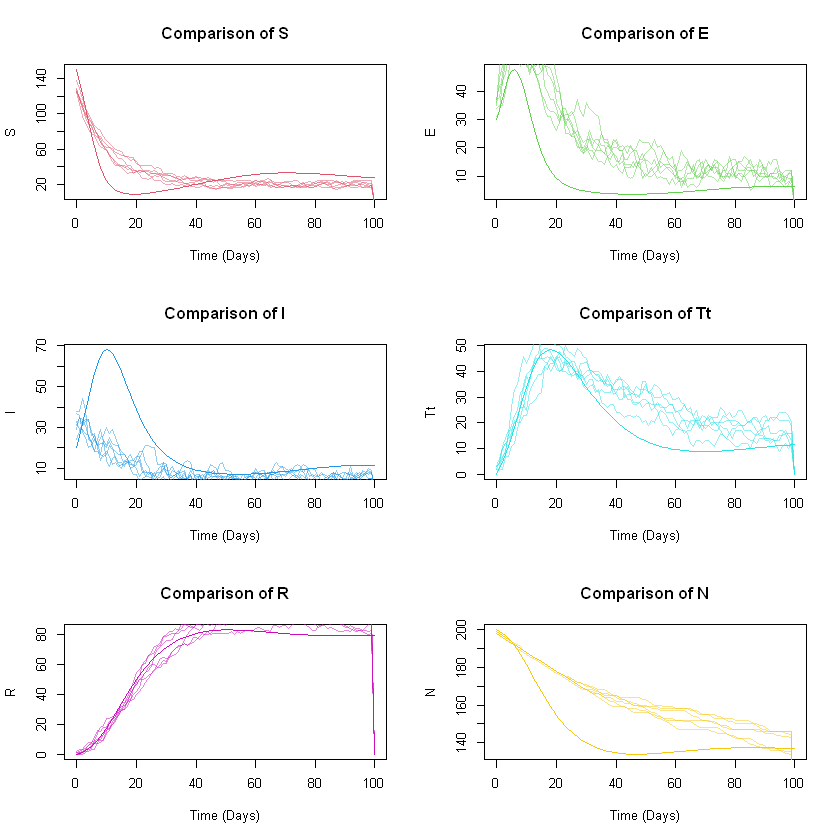

In [20]:
par(mfrow = c(3, 2))
statuses <- c("S", "E", "I", "Tt", "R", "N")
colors <- c(2, 3, 4, 5, 6, 7)
colors_alpha <- sapply(colors, function(col) rgb(red = col2rgb(col)[1,]/255, green = col2rgb(col)[2,]/255, blue = col2rgb(col)[3,]/255, alpha = 0.5))
for (j in 1:length(statuses)) {
  plot(out[, "time"], out[, statuses[j]], type = "l", col = colors[j], xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]))
  for (i in 1:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
    }
    lines(times, counts, col = colors_alpha[j])
  }
}

In [22]:
Lambda <- 2
beta1 <- 0.8
beta2 <- 0.3
beta3 <- 0.02
alpha1 <- 0.1
alpha2 <- 0.055
delta_I <- 0.03
delta_T <- 0.03
mu <- 0.01

R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

n <- 400
S <- 350
I <- 20
E <- 30
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)
times <- seq(0, 62, by = 1)
out <- ode(y = state, times = times, func = SEITR, parms = parameters)
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 6  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:6, .packages = c("igraph", "deSolve", "Matrix")) %dopar% {
  print(run)
  npc <-80 # nodes per cluster
  n_clust <- 5 # 4 clusters with 25 nodes each
  matlist = list()
  cluster_vector <- c()
  
  for (i in 1:n_clust){ 
    matlist[[i]] = get.adjacency(erdos.renyi.game(npc, 0.8))
    cluster_vector <- c(cluster_vector, rep(i, npc))
  }
  mat_clust <- bdiag(matlist)
  k <- rowSums(mat_clust) 
  print(any(k == 0))
  node_vector <- seq(1,npc*n_clust)
  for (i in node_vector){
    if (k[i]==0){ # if k=0, connect to something random
      j <- sample(node_vector[-i],1)
      mat_clust[i,j] <- 1
      mat_clust[j,i] <- 1
    }
  }
  g <- graph_from_adjacency_matrix(mat_clust, mode="undirected", diag=F)
  comps <- components(g)
  member_vec <- comps$membership
  comp_ids <- seq(1,comps$no-1) # stop short of last one
  for (curr_comp in comp_ids){
    i <- sample(which(curr_comp==member_vec),1)
    j <- sample(which((curr_comp+1)==member_vec),1)
    num_edges <- sample(1:4, 1)
    
    for (edge in 1:num_edges) {
      if (!are_adjacent(g, i, j)) {
        mat_clust[i,j] <- 1
        mat_clust[j,i] <- 1
      }
      i <- sample(which(curr_comp==member_vec),1)
      j <- sample(which((curr_comp+1)==member_vec),1)
    }
  }
  g <- graph_from_adjacency_matrix(mat_clust, mode="undirected", diag=F)
  V(g)$cluster <- cluster_vector
  V(g)$label <- 1:n
  V(g)$status <- "S"
  init_cluster <- sample(1:n_clust, 1)
  init_cluster_nodes <- V(g)[member_vec == init_cluster]
  init_I_nodes <- sample(init_cluster_nodes, I)
  init_E_nodes <- sample(setdiff(init_cluster_nodes, init_I_nodes), E)
  V(g)[init_I_nodes]$status <- "I"
  V(g)[init_E_nodes]$status <- "E"
  S_count <- S
  E_count <- E
  I_count <- I
  Tt_count <- Tt
  R_count <- R
  N_count <- N
  status_counts <- list()
  plot(g, vertex.color = status_colors[V(g)$status], vertex.size=4, vertex.label="")
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

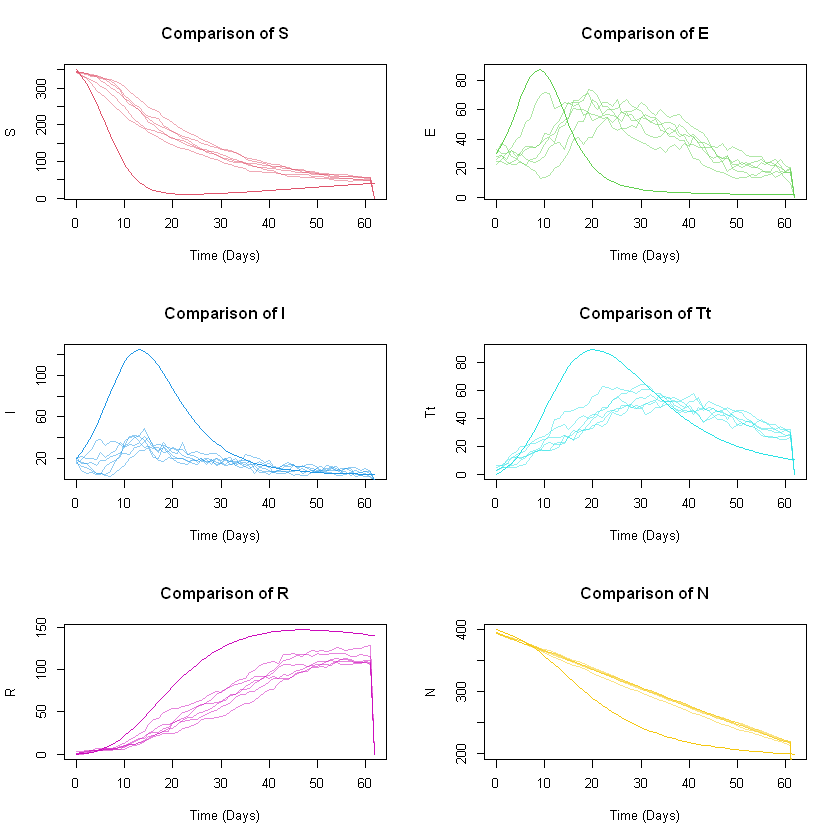

In [23]:
par(mfrow = c(3, 2))
statuses <- c("S", "E", "I", "Tt", "R", "N")
colors <- c(2, 3, 4, 5, 6, 7)
colors_alpha <- sapply(colors, function(col) rgb(red = col2rgb(col)[1,]/255, green = col2rgb(col)[2,]/255, blue = col2rgb(col)[3,]/255, alpha = 0.5))
for (j in 1:length(statuses)) {
  plot(out[, "time"], out[, statuses[j]], type = "l", col = colors[j], xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]))
  for (i in 1:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
    }
    lines(times, counts, col = colors_alpha[j])
  }
}

## Comparative Analysis of the SEITR Model

In this part of our experiment, we applied our SEITR model to three distinct types of networks: Erdős-Rényi, Barabási–Albert, and Watts-Strogatz. Each of these network types possesses unique structural properties that can significantly influence the propagation of an infection. The Erdős-Rényi network, characterized as a random graph, the Barabási–Albert network, a scale-free network embodying the principle of preferential attachment frequently observed in real-world networks, and the Watts-Strogatz network, modeling the small-world property inherent in most real-world networks, were chosen for their distinct topological characteristics. Evaluating the model across diverse networks is of importance as it facilitates a deeper understanding of how network structure can impact disease dynamics. For each network type and size, specific parameters were judiciously chosen. For Erdős-Rényi networks, graphs were generated with the probability ‘p’ set to 0.2, 0.5, and 0.9. For Barabási–Albert networks, graphs were constructed with ‘m’ set to n*0.2, n*0.5, and n*0.9 (similar probabilities to Erdős-Rényi networks). For Watts-Strogatz networks, graphs were created for k=5 and p=0.25, k=10 and p=0.25, k=20 abd p=0.25, k=5 and p=0.5. The experiment was systematically conducted on three different network sizes: 100, 200, and 1000 nodes. This variation in network size enabled us to observe the scalability of the model and comprehend how the magnitude of a network can impact the experimental outcomes. The model parameters are set to $\beta_1$ = 0.8, $\beta_2$ = 0.3, $\beta_3$ = 0.02, $\alpha_1$ = 0.1, $\alpha_2 = 0.055$, $\delta_I$ = 0.03, $\delta_T$ = 0.03, and $\mu$ = 0.01 for all different experiments and $\Lambda$ is set to $n*\mu$ to have equal natural birth and death rates, with the inclusion of death caused by infection we expect a slowly decreasing total population for this setup. The experiment was replicated 20 times for each network setup to ensure the robustness of the results, and the average outcomes were recorded. The number of node statuses was recorded at each time step. These results were subsequently compared to the solutions derived from model ODEs, and statistical measures such as the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Pearson Correlation (PC) were computed to quantify the discrepancies between them.

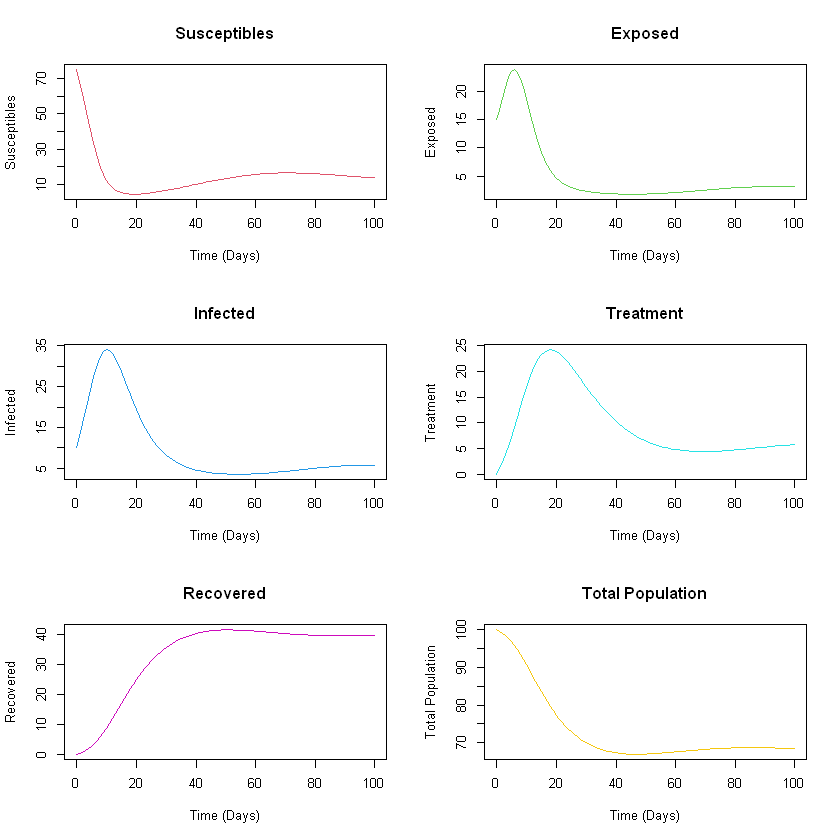

In [22]:
Lambda <- 1
beta1 <- 0.8
beta2 <- 0.3
beta3 <- 0.02
alpha1 <- 0.1
alpha2 <- 0.055
delta_I <- 0.03
delta_T <- 0.03
mu <- 0.01

R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

n <- 100
S <- 75
I <- 10
E <- 15
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)

SEITRN <- function(t, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- Lambda - (beta1 * S * I) / N - mu * S
    dE <- (beta1 * S * I) / N - (beta2 + mu) * E
    dI <- beta2 * E - (beta3 + mu + delta_I + alpha1) * I
    dT <- alpha1 * I - (mu + delta_T + alpha2) * Tt
    dR <- beta3 * I + alpha2 * Tt - mu * R
    dN <- Lambda - N * mu - delta_I * I - delta_T * Tt
    list(c(dS, dE, dI, dT, dR, dN))
  })
}

times <- seq(0, 100, by = 1)

out <- ode(y = state, times = times, func = SEITRN, parms = parameters)
status_colors <- c("S" = "gray", "E" = "yellow", "I" = "red", "Tt" = "green", "R" = "purple")
par(mfrow = c(3, 2))

plot(out[, "time"], out[, "S"], type = "l", col = 2, xlab = "Time (Days)", ylab = "Susceptibles", main = "Susceptibles")
plot(out[, "time"], out[, "E"], type = "l", col = 3, xlab = "Time (Days)", ylab = "Exposed", main = "Exposed")
plot(out[, "time"], out[, "I"], type = "l", col = 4, xlab = "Time (Days)", ylab = "Infected", main = "Infected")
plot(out[, "time"], out[, "Tt"], type = "l", col = 5, xlab = "Time (Days)", ylab = "Treatment", main = "Treatment")
plot(out[, "time"], out[, "R"], type = "l", col = 6, xlab = "Time (Days)", ylab = "Recovered", main = "Recovered")
plot(out[, "time"], out[, "N"], type = "l", col = 7, xlab = "Time (Days)", ylab = "Total Population", main = "Total Population")

Erdős-Rényi, n = 100, p = 0.2

Status: S 
MSE: 63.1277597887742 
RMSE: 7.94529796727436 
Correlation: 0.822497621482092 
Status: E 
MSE: 49.3879428531007 
RMSE: 7.02765557302723 
Correlation: 0.803119809562045 
Status: I 
MSE: 67.0713087845757 
RMSE: 8.1897074907823 
Correlation: 0.784868148791707 
Status: Tt 
MSE: 13.6485872957155 
RMSE: 3.69439944993981 
Correlation: 0.890545502499615 
Status: R 
MSE: 9.53909624574164 
RMSE: 3.08854273820869 
Correlation: 0.979664085951934 
Status: N 
MSE: 51.0815356174184 
RMSE: 7.14713478377303 
Correlation: 0.902609829534886 


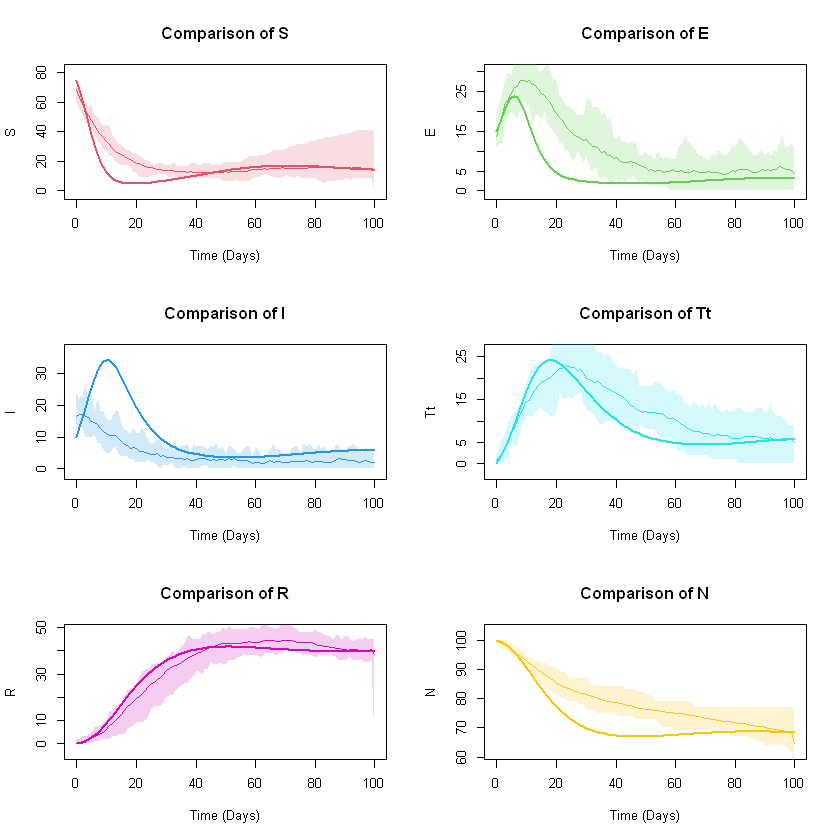

In [27]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.2)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
statuses <- c("S", "E", "I", "Tt", "R", "N")
colors <- c(2, 3, 4, 5, 6, 7)
colors_alpha <- sapply(colors, function(col) rgb(red = col2rgb(col)[1,]/255, green = col2rgb(col)[2,]/255, blue = col2rgb(col)[3,]/255, alpha = 0.2)) # make the shade lighter
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Erdős-Rényi, n = 100, p = 0.5

Status: S 
MSE: 81.6704451198906 
RMSE: 9.03717019425277 
Correlation: 0.745139506103114 
Status: E 
MSE: 54.2240191879084 
RMSE: 7.36369602766901 
Correlation: 0.780455182661007 
Status: I 
MSE: 68.4011813183344 
RMSE: 8.27050066914539 
Correlation: 0.767727058881031 
Status: Tt 
MSE: 17.1479281188303 
RMSE: 4.14100568930185 
Correlation: 0.856330779405019 
Status: R 
MSE: 7.63710784619785 
RMSE: 2.76353177043396 
Correlation: 0.981074161744436 
Status: N 
MSE: 44.6572924776083 
RMSE: 6.68261120203834 
Correlation: 0.88545577539889 


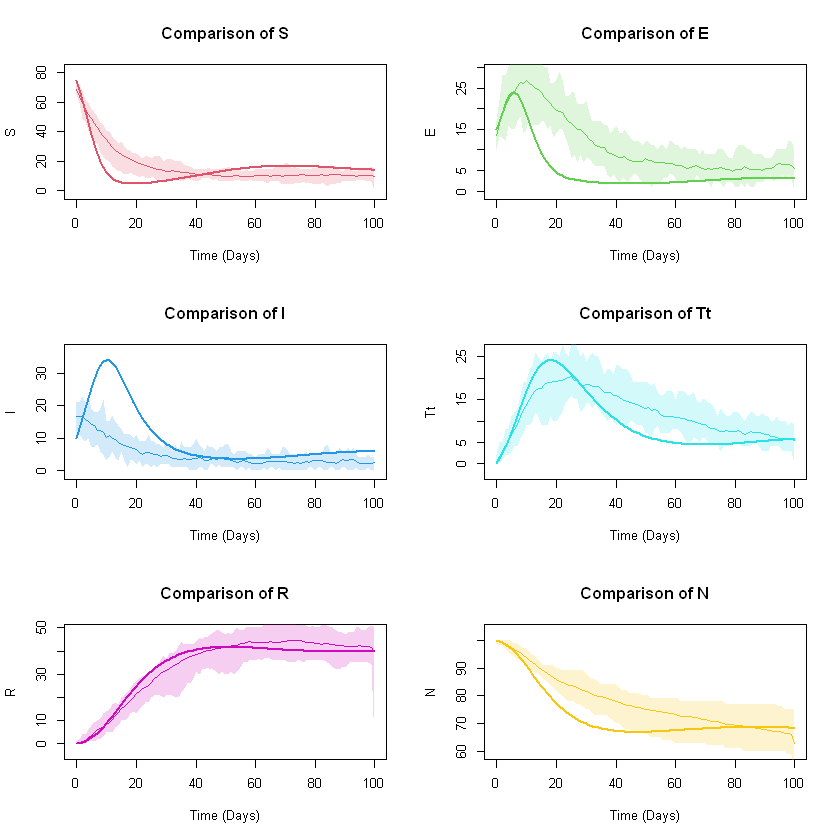

In [28]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.5)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)
par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Erdős-Rényi, n = 100, p = 0.9

Status: S 
MSE: 83.7468945852936 
RMSE: 9.15133294035867 
Correlation: 0.736665398693828 
Status: E 
MSE: 52.5437200294228 
RMSE: 7.24870471390736 
Correlation: 0.79964776471989 
Status: I 
MSE: 68.800493399471 
RMSE: 8.29460628357193 
Correlation: 0.754194234531126 
Status: Tt 
MSE: 12.2662411890998 
RMSE: 3.50231940135388 
Correlation: 0.917483000241488 
Status: R 
MSE: 10.8983959683766 
RMSE: 3.30127187132121 
Correlation: 0.9776173731011 
Status: N 
MSE: 41.1670415863227 
RMSE: 6.41615473522286 
Correlation: 0.89358736120044 


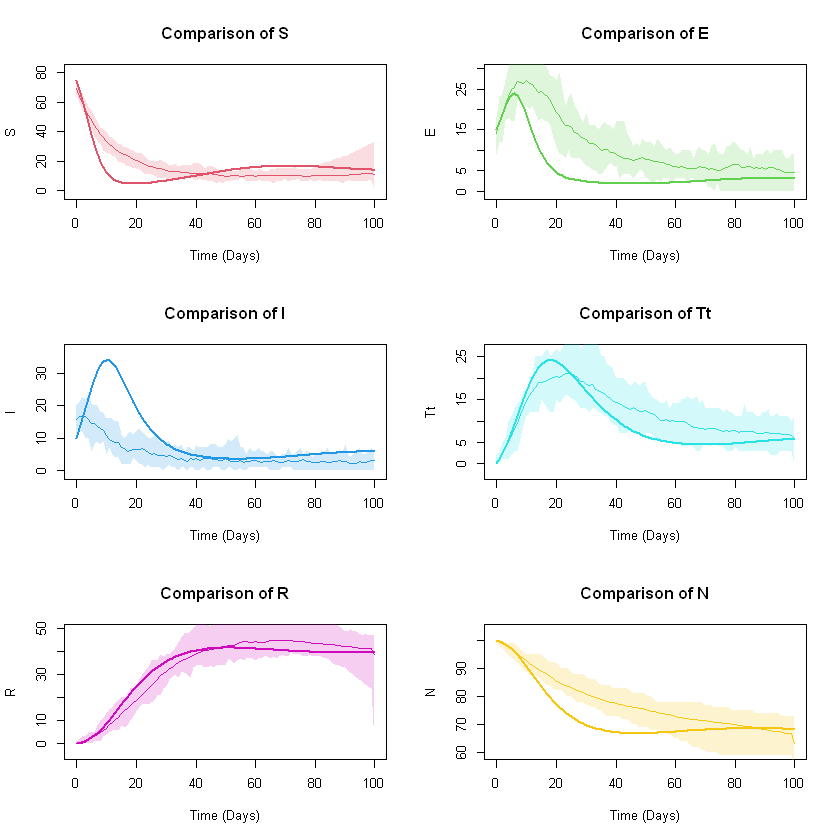

In [29]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.9)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)
par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Barabasi-Albert, n = 100, power = 1, m = n * 0.2

Status: S 
MSE: 67.1820286156955 
RMSE: 8.19646439726883 
Correlation: 0.785702047157641 
Status: E 
MSE: 54.3713940464561 
RMSE: 7.37369609127309 
Correlation: 0.796074186093536 
Status: I 
MSE: 67.902396328814 
RMSE: 8.24029103423016 
Correlation: 0.774478052279588 
Status: Tt 
MSE: 11.8872310783092 
RMSE: 3.44778640265159 
Correlation: 0.905312790956866 
Status: R 
MSE: 7.13967653066356 
RMSE: 2.67201731481358 
Correlation: 0.983901402174886 
Status: N 
MSE: 41.0596895936188 
RMSE: 6.40778351644458 
Correlation: 0.889310255590676 


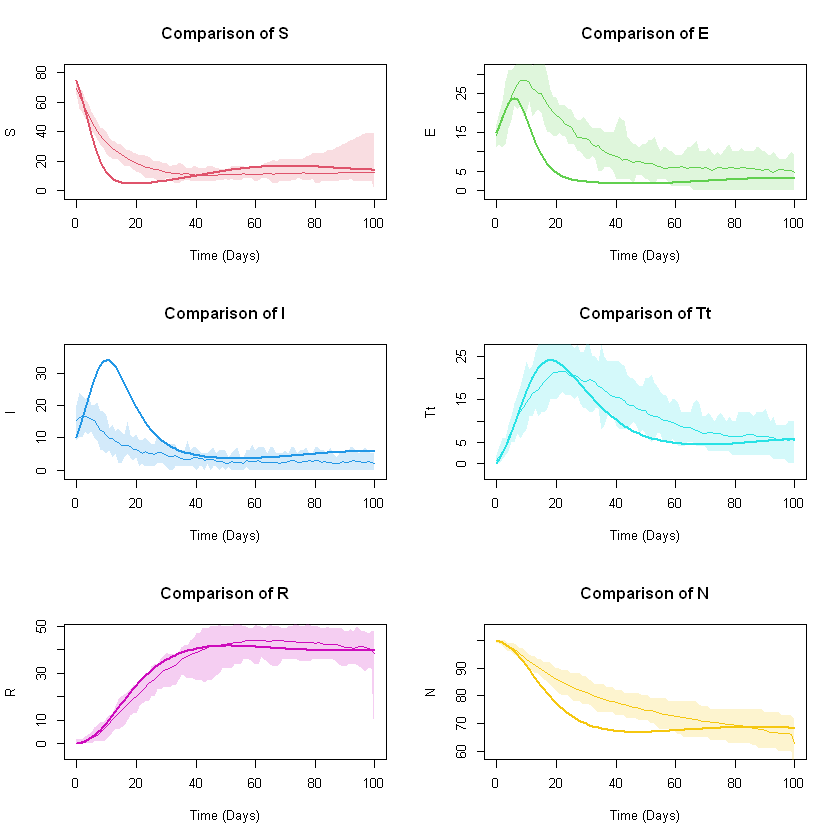

In [30]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_pa(n, power = 1, m = n*0.2, directed = FALSE)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(mean(degree)), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Barabasi-Albert, n = 100, power = 1, m = n * 0.5

Status: S 
MSE: 75.8072639053793 
RMSE: 8.70673669668374 
Correlation: 0.754492156663318 
Status: E 
MSE: 52.7886938897916 
RMSE: 7.26558283207835 
Correlation: 0.797067152615564 
Status: I 
MSE: 68.0396929341884 
RMSE: 8.24861763777352 
Correlation: 0.744058301446699 
Status: Tt 
MSE: 14.1073542049502 
RMSE: 3.75597579930305 
Correlation: 0.899735069272274 
Status: R 
MSE: 5.79500985103435 
RMSE: 2.40728266953309 
Correlation: 0.986480721443078 
Status: N 
MSE: 37.7866235798295 
RMSE: 6.14708252586782 
Correlation: 0.901567303285909 


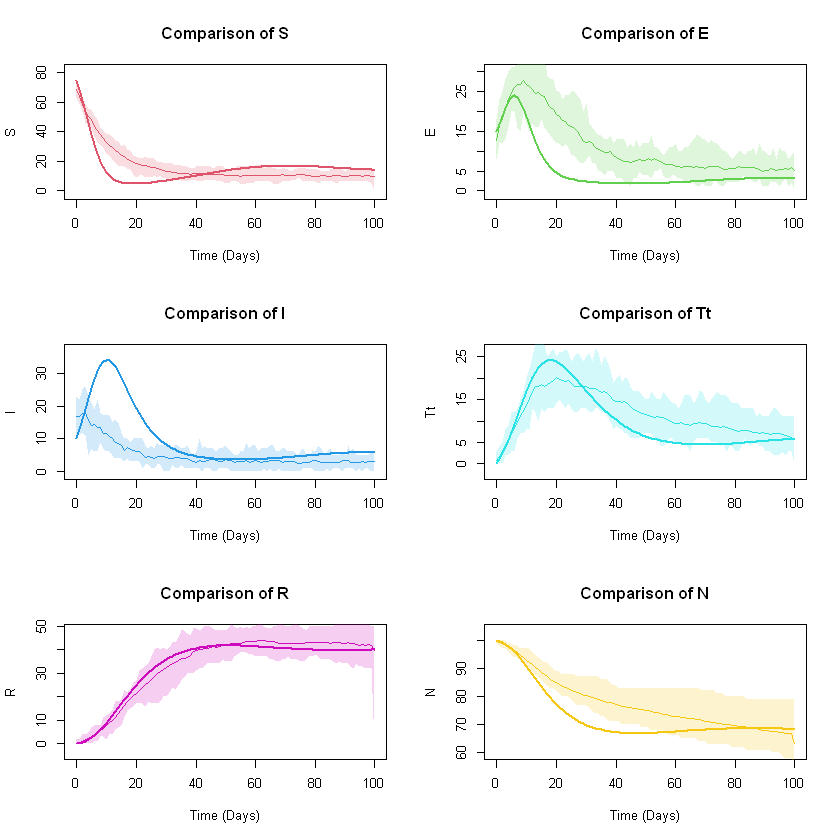

In [31]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_pa(n, power = 1, m = n*0.5, directed = FALSE)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(mean(degree)), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Barabasi-Albert, n = 100, power = 1, m = n * 0.9

Status: S 
MSE: 70.4987292228173 
RMSE: 8.39635213785233 
Correlation: 0.768311598298434 
Status: E 
MSE: 53.9750859244734 
RMSE: 7.34677384465272 
Correlation: 0.806747848025753 
Status: I 
MSE: 67.4134849060135 
RMSE: 8.21057153345694 
Correlation: 0.760554677797435 
Status: Tt 
MSE: 10.5512697940543 
RMSE: 3.24827181652864 
Correlation: 0.93098605820768 
Status: R 
MSE: 5.43501059355985 
RMSE: 2.33131091739387 
Correlation: 0.987408939372594 
Status: N 
MSE: 32.7788473916179 
RMSE: 5.72528142466533 
Correlation: 0.885813840331478 


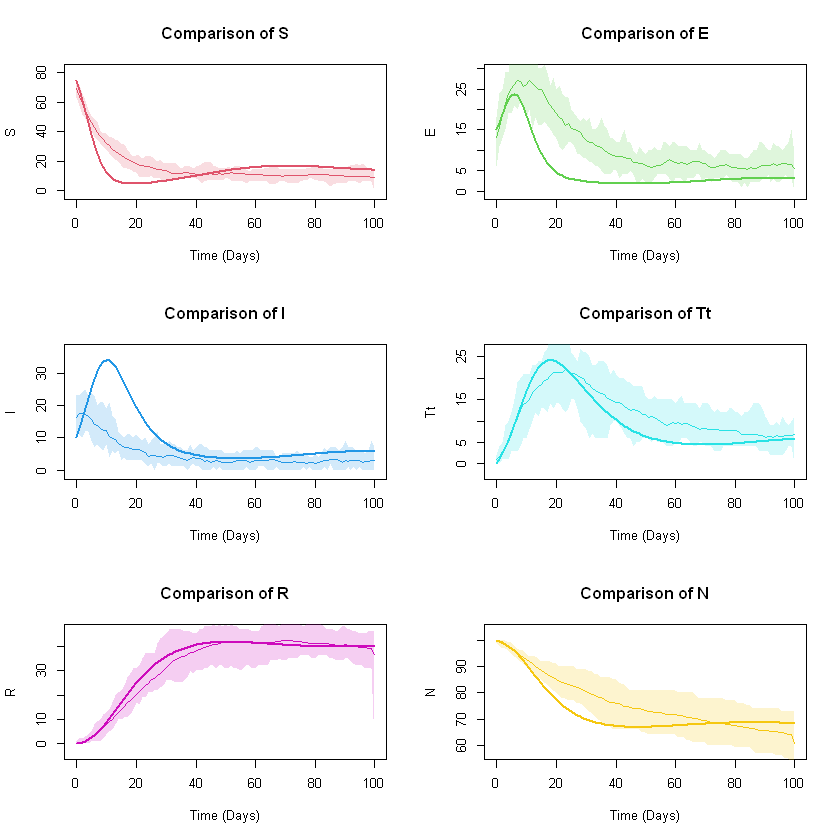

In [32]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_pa(n, power = 1, m = n*0.9, directed = FALSE)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(mean(degree)), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 100, dim = 1, k = 5, p = 0.25

Status: S 
MSE: 410.533019013321 
RMSE: 20.2616144226792 
Correlation: 0.743865721794346 
Status: E 
MSE: 33.4230838603029 
RMSE: 5.78127009058588 
Correlation: 0.814939872092978 
Status: I 
MSE: 83.4464874973044 
RMSE: 9.13490489809852 
Correlation: 0.796354648180763 
Status: Tt 
MSE: 8.31830789102547 
RMSE: 2.88414768883729 
Correlation: 0.921703554202394 
Status: R 
MSE: 28.1857136828491 
RMSE: 5.3090219139545 
Correlation: 0.974283272588154 
Status: N 
MSE: 88.7947152034754 
RMSE: 9.42309477844065 
Correlation: 0.978681737680217 


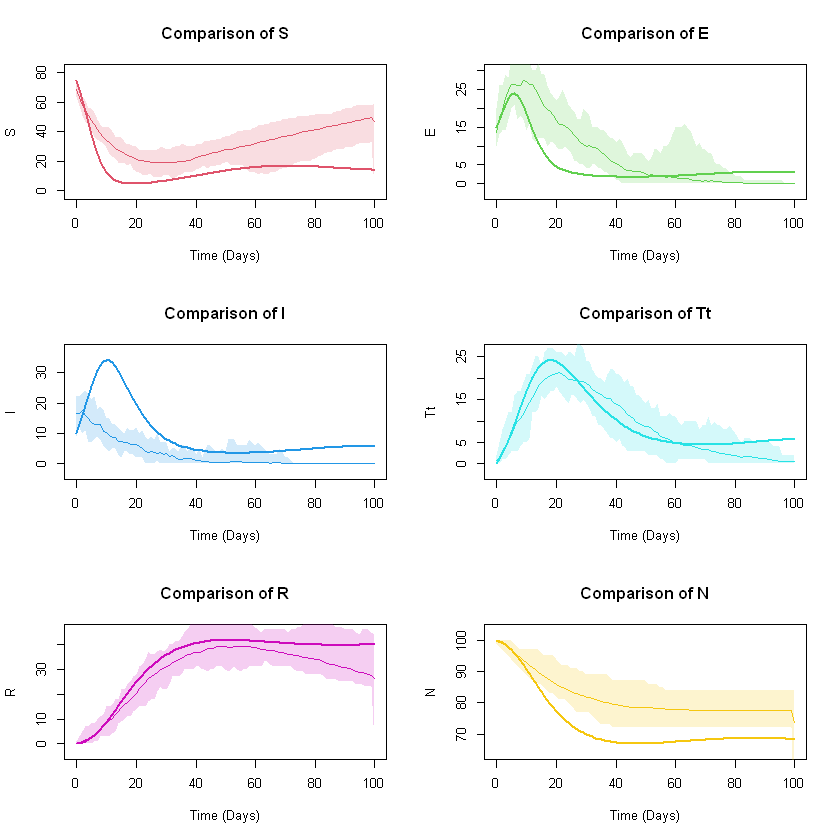

In [33]:
node_counter <- vcount(g)
k=5
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.25) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 100, dim = 1, k = 10, p = 0.25

Status: S 
MSE: 230.757455939613 
RMSE: 15.1907029442226 
Correlation: 0.787948597500285 
Status: E 
MSE: 45.3777042016159 
RMSE: 6.73629751433352 
Correlation: 0.768914426471454 
Status: I 
MSE: 77.6392826791666 
RMSE: 8.81131560433325 
Correlation: 0.810210287700364 
Status: Tt 
MSE: 8.60197992559175 
RMSE: 2.93291321480738 
Correlation: 0.911241628909736 
Status: R 
MSE: 16.7429644791516 
RMSE: 4.09181676998758 
Correlation: 0.973137545367935 
Status: N 
MSE: 51.4791600698139 
RMSE: 7.1748979135465 
Correlation: 0.96512292844626 


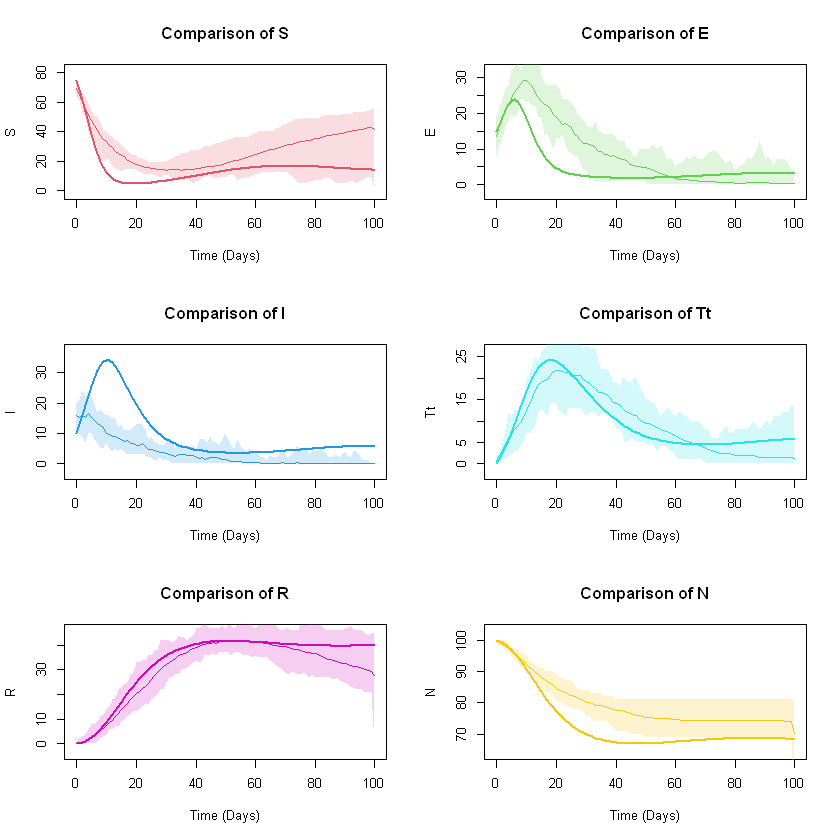

In [34]:
node_counter <- vcount(g)
k=10
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.25) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 100, dim = 1, k = 20, p = 0.25

Status: S 
MSE: 137.234761487228 
RMSE: 11.7147241319302 
Correlation: 0.789700539980039 
Status: E 
MSE: 47.3342455408609 
RMSE: 6.87998877476271 
Correlation: 0.750472782303515 
Status: I 
MSE: 77.6964186108172 
RMSE: 8.81455719879435 
Correlation: 0.759554488360475 
Status: Tt 
MSE: 10.1224691286249 
RMSE: 3.18158280241532 
Correlation: 0.886439139596651 
Status: R 
MSE: 8.27479595529634 
RMSE: 2.87659450658176 
Correlation: 0.979416641763307 
Status: N 
MSE: 53.9458280060193 
RMSE: 7.34478236614396 
Correlation: 0.932471536340184 


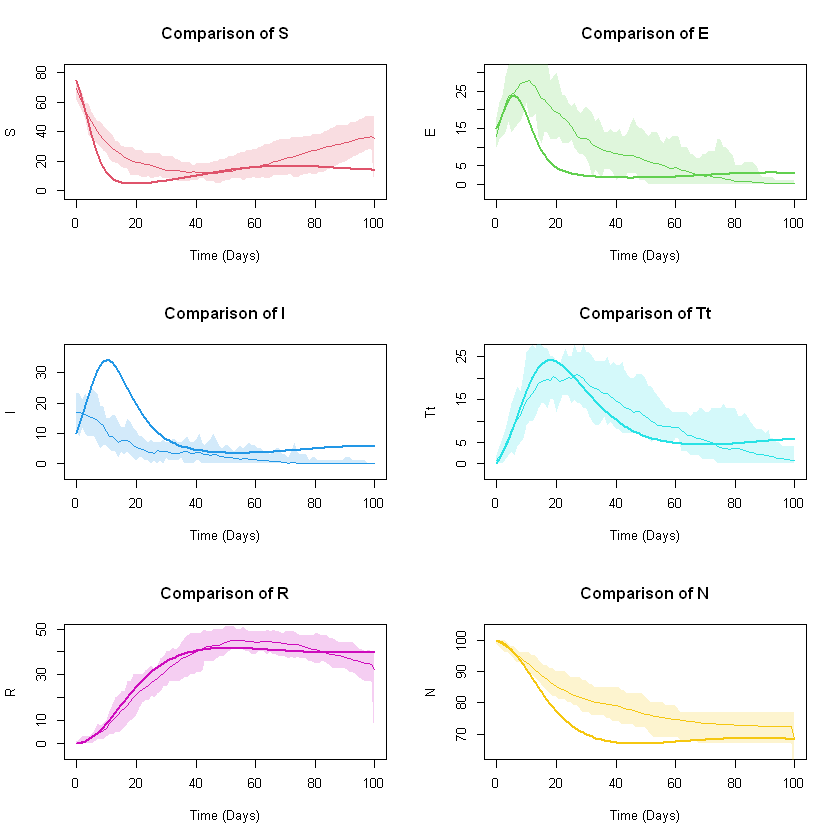

In [35]:
node_counter <- vcount(g)
k=20
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.25) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 100, dim = 1, k = 5, p = 0.5

Status: S 
MSE: 381.197863595836 
RMSE: 19.5242890676162 
Correlation: 0.759539815687637 
Status: E 
MSE: 37.4248311019749 
RMSE: 6.11758376338035 
Correlation: 0.789144551818089 
Status: I 
MSE: 83.690287760128 
RMSE: 9.1482395989681 
Correlation: 0.805952021903513 
Status: Tt 
MSE: 9.15316672881493 
RMSE: 3.02542009129558 
Correlation: 0.906986448654652 
Status: R 
MSE: 32.2486411166196 
RMSE: 5.67878870152955 
Correlation: 0.970884464480976 
Status: N 
MSE: 76.8212998579534 
RMSE: 8.76477608715439 
Correlation: 0.968060806622121 


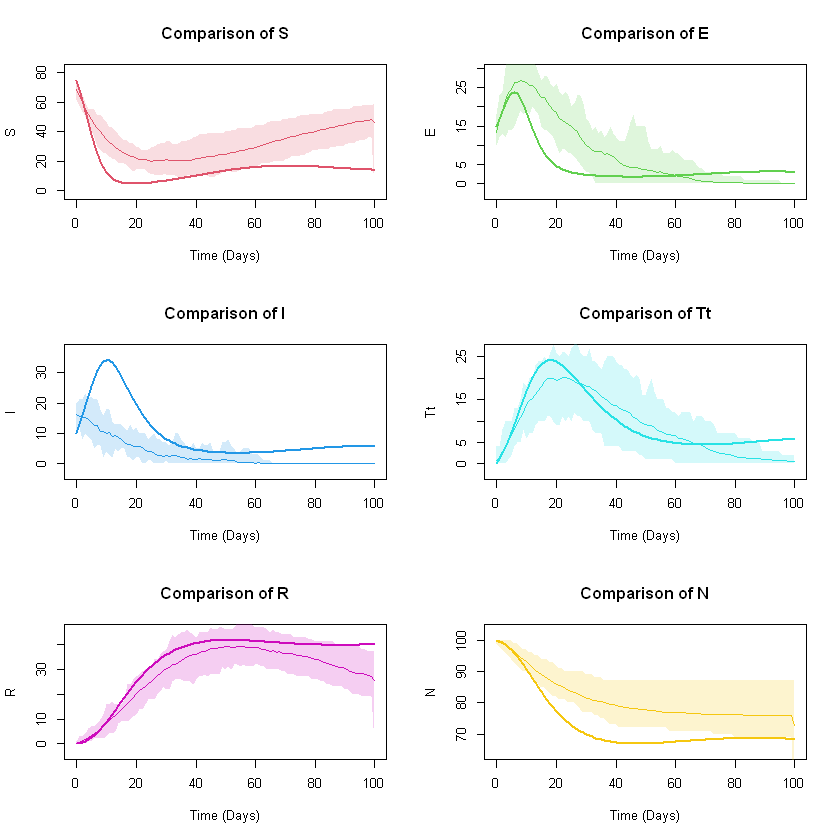

In [36]:
node_counter <- vcount(g)
k=5
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.5) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

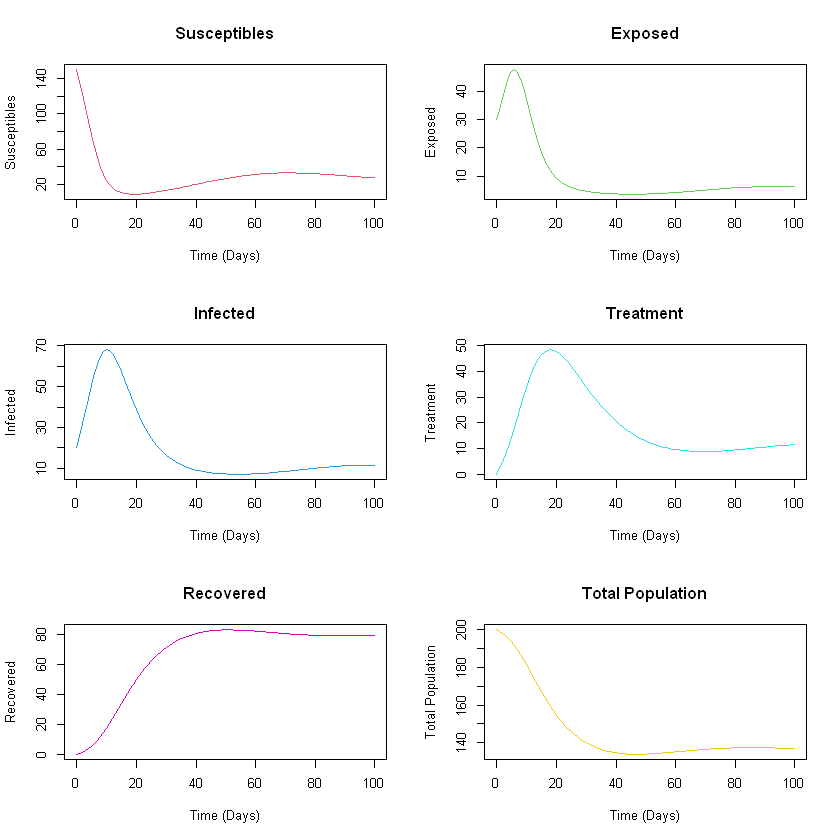

In [37]:
Lambda <- 2
beta1 <- 0.8
beta2 <- 0.3
beta3 <- 0.02
alpha1 <- 0.1
alpha2 <- 0.055
delta_I <- 0.03
delta_T <- 0.03
mu <- 0.01

R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

n <- 200
S <- 150
I <- 20
E <- 30
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)

times <- seq(0, 100, by = 1)

out <- ode(y = state, times = times, func = SEITRN, parms = parameters)
status_colors <- c("S" = "gray", "E" = "yellow", "I" = "red", "Tt" = "green", "R" = "purple")
par(mfrow = c(3, 2))

plot(out[, "time"], out[, "S"], type = "l", col = 2, xlab = "Time (Days)", ylab = "Susceptibles", main = "Susceptibles")
plot(out[, "time"], out[, "E"], type = "l", col = 3, xlab = "Time (Days)", ylab = "Exposed", main = "Exposed")
plot(out[, "time"], out[, "I"], type = "l", col = 4, xlab = "Time (Days)", ylab = "Infected", main = "Infected")
plot(out[, "time"], out[, "Tt"], type = "l", col = 5, xlab = "Time (Days)", ylab = "Treatment", main = "Treatment")
plot(out[, "time"], out[, "R"], type = "l", col = 6, xlab = "Time (Days)", ylab = "Recovered", main = "Recovered")
plot(out[, "time"], out[, "N"], type = "l", col = 7, xlab = "Time (Days)", ylab = "Total Population", main = "Total Population")

Erdős-Rényi, n = 200, p = 0.2

Status: S 
MSE: 286.031276892559 
RMSE: 16.9124592207212 
Correlation: 0.760951763371967 
Status: E 
MSE: 254.105968249586 
RMSE: 15.9407016235041 
Correlation: 0.789617563242594 
Status: I 
MSE: 264.608629925041 
RMSE: 16.2667953182254 
Correlation: 0.757671179007071 
Status: Tt 
MSE: 62.2594022335051 
RMSE: 7.89046273887058 
Correlation: 0.898907671300477 
Status: R 
MSE: 94.3063812257574 
RMSE: 9.71114726619658 
Correlation: 0.97537362099324 
Status: N 
MSE: 352.163861445486 
RMSE: 18.7660294533896 
Correlation: 0.855448292178059 


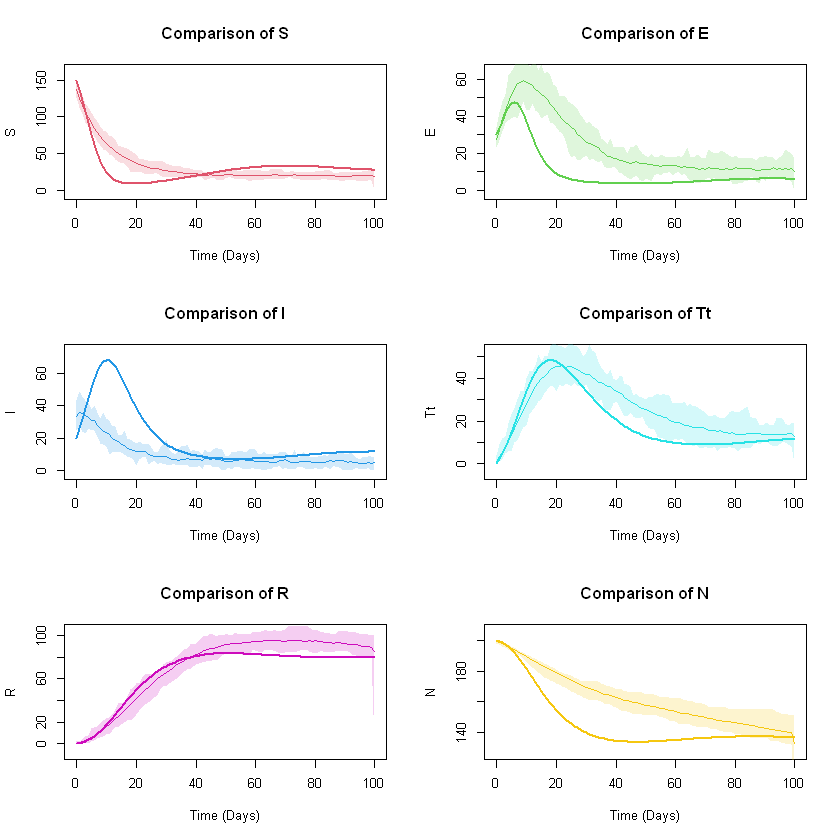

In [38]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.2)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
statuses <- c("S", "E", "I", "Tt", "R", "N")
colors <- c(2, 3, 4, 5, 6, 7)
colors_alpha <- sapply(colors, function(col) rgb(red = col2rgb(col)[1,]/255, green = col2rgb(col)[2,]/255, blue = col2rgb(col)[3,]/255, alpha = 0.2)) # make the shade lighter
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Erdős-Rényi, n = 200, p = 0.5

Status: S 
MSE: 318.61253539846 
RMSE: 17.8497208773263 
Correlation: 0.741064379312002 
Status: E 
MSE: 239.162230880078 
RMSE: 15.4648708652894 
Correlation: 0.807000094313839 
Status: I 
MSE: 277.129114747966 
RMSE: 16.6471954018677 
Correlation: 0.762242070931127 
Status: Tt 
MSE: 53.2845184747633 
RMSE: 7.29962454341066 
Correlation: 0.919880337763519 
Status: R 
MSE: 97.0605153205526 
RMSE: 9.85192952271547 
Correlation: 0.978393410284626 
Status: N 
MSE: 375.043505520394 
RMSE: 19.3660400061653 
Correlation: 0.851487698424569 


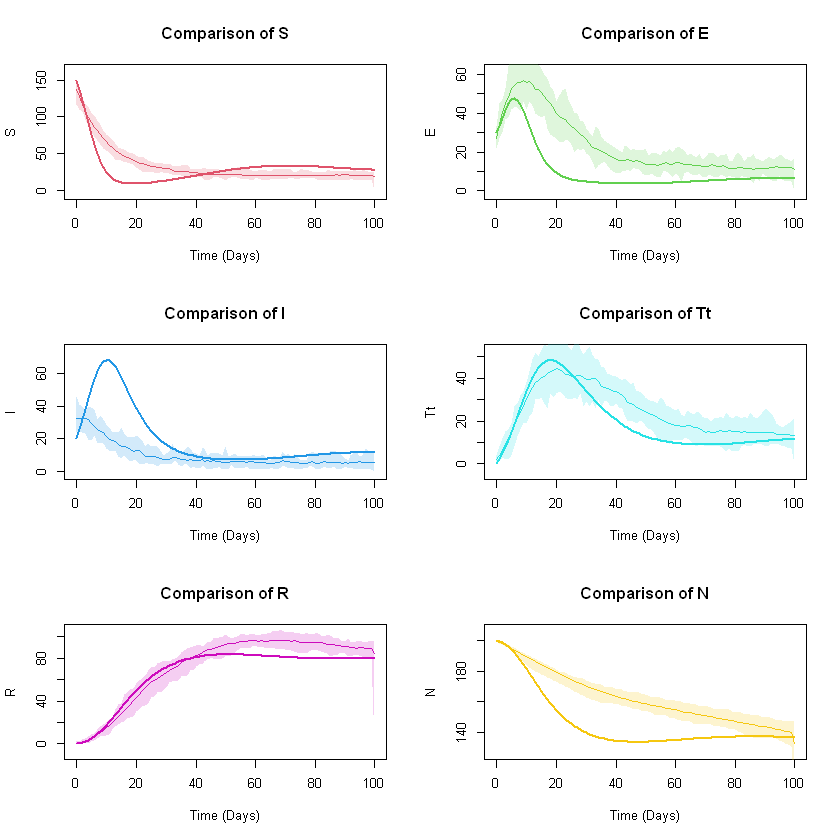

In [39]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.5)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)
par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Erdős-Rényi, n = 200, p = 0.9

Status: S 
MSE: 307.745847691133 
RMSE: 17.542686444531 
Correlation: 0.744152991353611 
Status: E 
MSE: 239.965685998867 
RMSE: 15.4908258656169 
Correlation: 0.800216677420804 
Status: I 
MSE: 272.869292386553 
RMSE: 16.5187557759824 
Correlation: 0.741459502759995 
Status: Tt 
MSE: 70.7851590309485 
RMSE: 8.41339164849399 
Correlation: 0.891620414586723 
Status: R 
MSE: 93.1107835634656 
RMSE: 9.64939291165334 
Correlation: 0.977036676442826 
Status: N 
MSE: 376.815562941333 
RMSE: 19.4117377620174 
Correlation: 0.853637193019003 


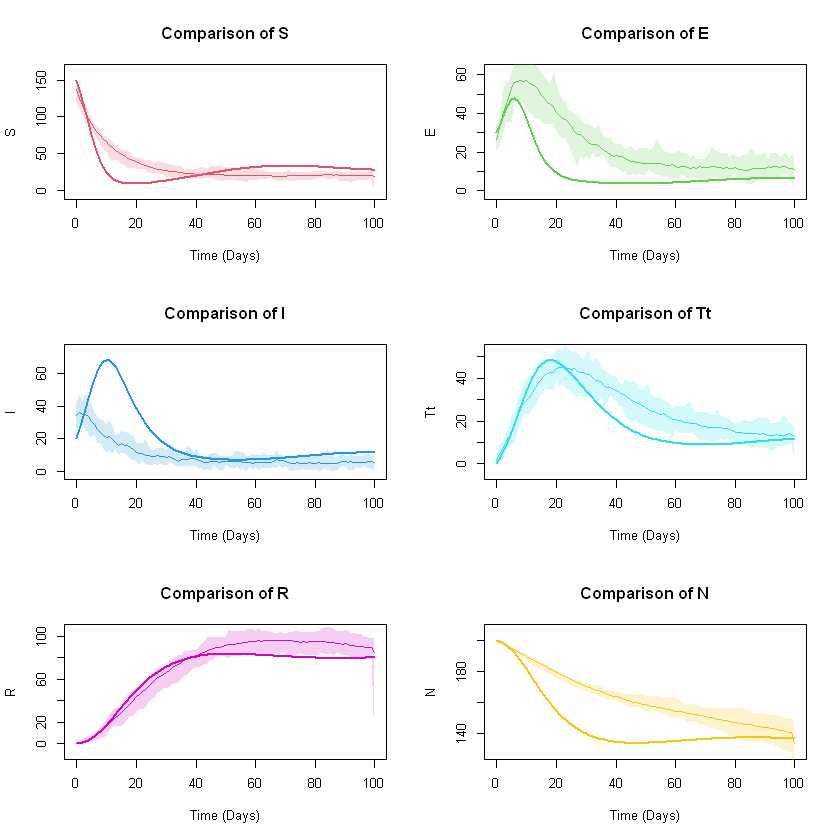

In [40]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.9)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)
par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Barabasi-Albert, n = 200, power = 1, m = n * 0.2

Status: S 
MSE: 295.789146044938 
RMSE: 17.1985216238181 
Correlation: 0.75585952896458 
Status: E 
MSE: 245.677684119194 
RMSE: 15.6741087184948 
Correlation: 0.796723922707268 
Status: I 
MSE: 272.523698307696 
RMSE: 16.5082918046567 
Correlation: 0.75086890406627 
Status: Tt 
MSE: 72.5862724327898 
RMSE: 8.5197577684339 
Correlation: 0.882388136673597 
Status: R 
MSE: 94.7824557332822 
RMSE: 9.73562816326108 
Correlation: 0.976174473934284 
Status: N 
MSE: 380.956180307098 
RMSE: 19.5180987882298 
Correlation: 0.857385678347715 


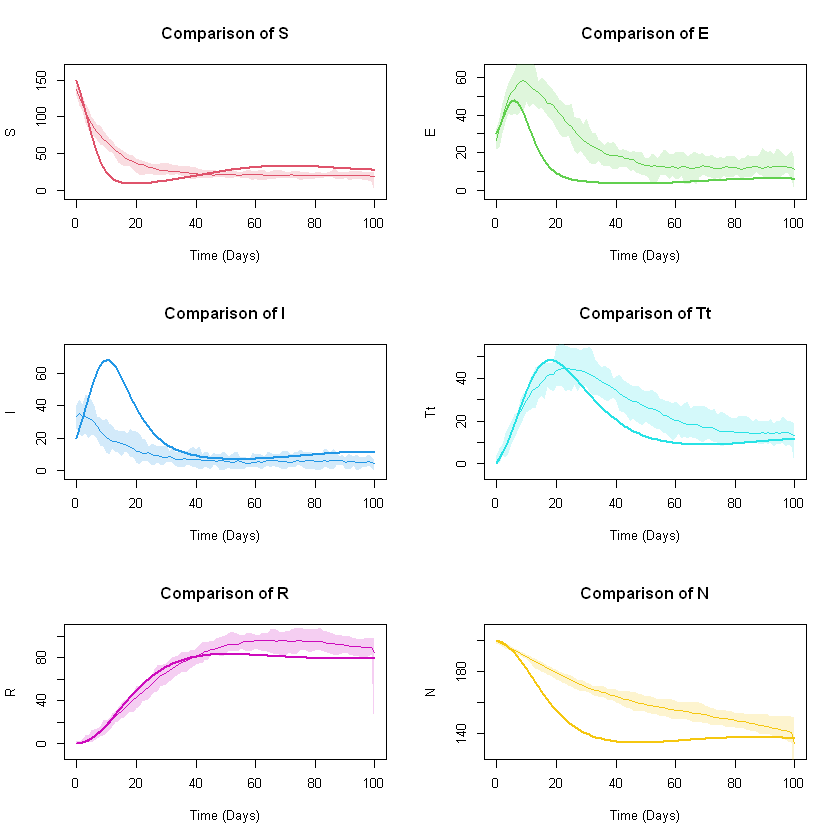

In [41]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_pa(n, power = 1, m = n*0.2, directed = FALSE)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(mean(degree)), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Barabasi-Albert, n = 200, power = 1, m = n * 0.5

Status: S 
MSE: 312.218702724003 
RMSE: 17.6697114499361 
Correlation: 0.750731856375792 
Status: E 
MSE: 279.348941727492 
RMSE: 16.7137351219735 
Correlation: 0.756941151753876 
Status: I 
MSE: 265.974721353767 
RMSE: 16.3087314452647 
Correlation: 0.777358928844322 
Status: Tt 
MSE: 70.2519989703769 
RMSE: 8.3816465548469 
Correlation: 0.888036976661146 
Status: R 
MSE: 64.8346615014115 
RMSE: 8.05199736099134 
Correlation: 0.977213026328143 
Status: N 
MSE: 345.950380572857 
RMSE: 18.5997414114513 
Correlation: 0.846486602347254 


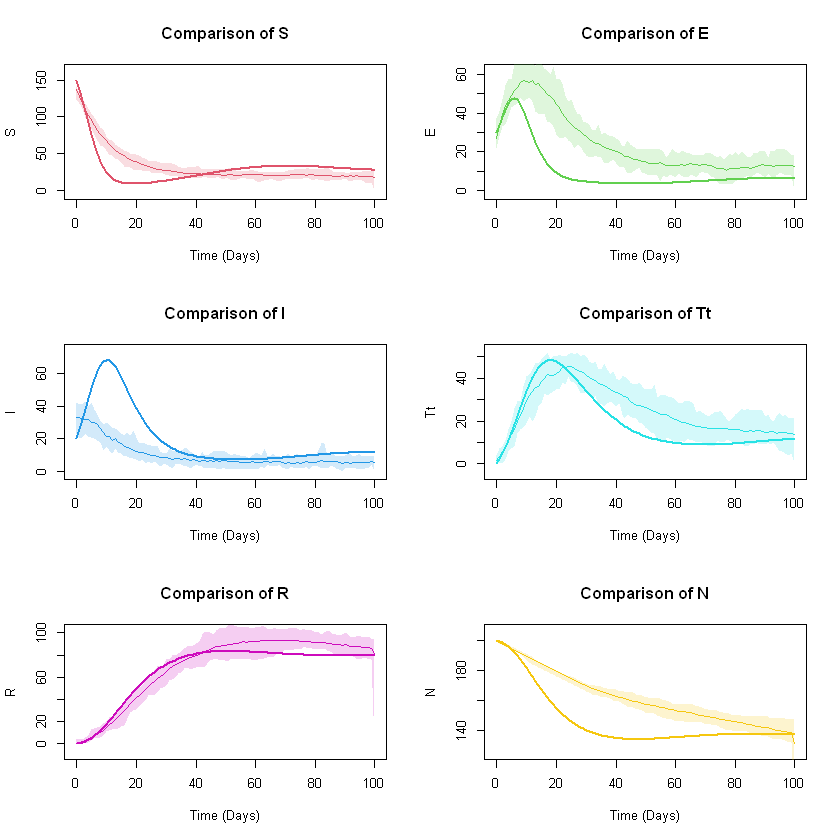

In [42]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_pa(n, power = 1, m = n*0.5, directed = FALSE)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(mean(degree)), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Barabasi-Albert, n = 200, power = 1, m = n * 0.9

Status: S 
MSE: 375.758601111753 
RMSE: 19.3844938317139 
Correlation: 0.714106709417608 
Status: E 
MSE: 235.751129761424 
RMSE: 15.3541893228338 
Correlation: 0.782154893259414 
Status: I 
MSE: 274.297351717144 
RMSE: 16.5619247588299 
Correlation: 0.767343116546422 
Status: Tt 
MSE: 74.2045671249969 
RMSE: 8.61420728360985 
Correlation: 0.879631487211616 
Status: R 
MSE: 80.069230946483 
RMSE: 8.94814120063396 
Correlation: 0.978229019301987 
Status: N 
MSE: 393.730265321316 
RMSE: 19.8426375595916 
Correlation: 0.838027097041598 


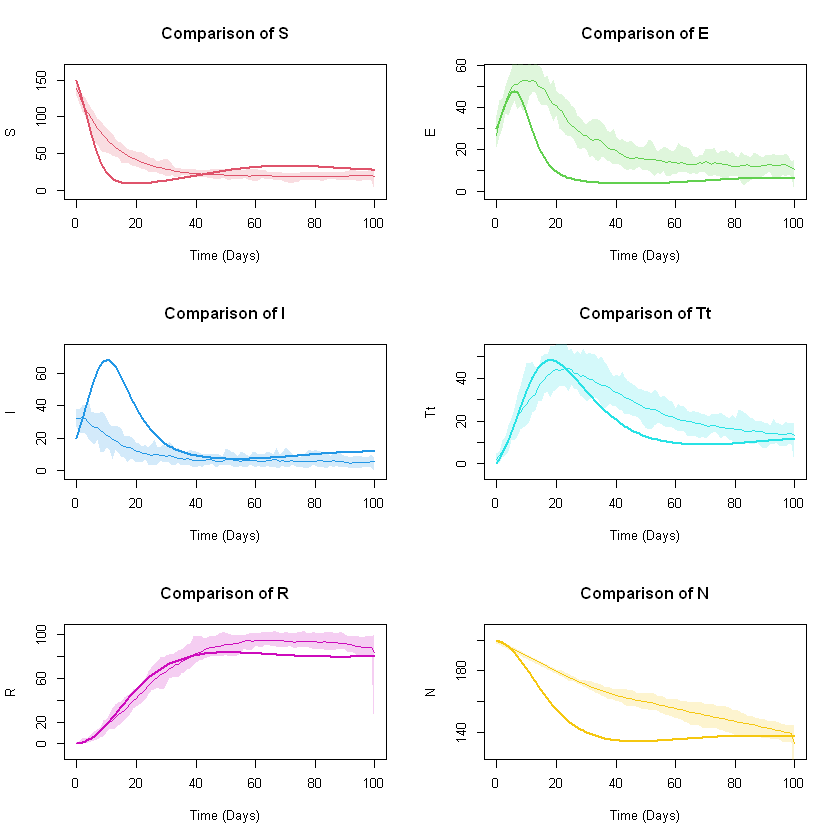

In [43]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_pa(n, power = 1, m = n*0.9, directed = FALSE)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(mean(degree)), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 200, dim = 1, k = 5, p = 0.25

Status: S 
MSE: 1858.843140158 
RMSE: 43.1143031969438 
Correlation: 0.708425705664517 
Status: E 
MSE: 183.041409930549 
RMSE: 13.529279726968 
Correlation: 0.778515484293175 
Status: I 
MSE: 324.542130760378 
RMSE: 18.0150528936325 
Correlation: 0.81071738076884 
Status: Tt 
MSE: 36.1052616067825 
RMSE: 6.00876539788187 
Correlation: 0.917263336886983 
Status: R 
MSE: 77.6748178893675 
RMSE: 8.81333182680464 
Correlation: 0.967077674793638 
Status: N 
MSE: 612.01901125406 
RMSE: 24.7390179929208 
Correlation: 0.964824236190333 


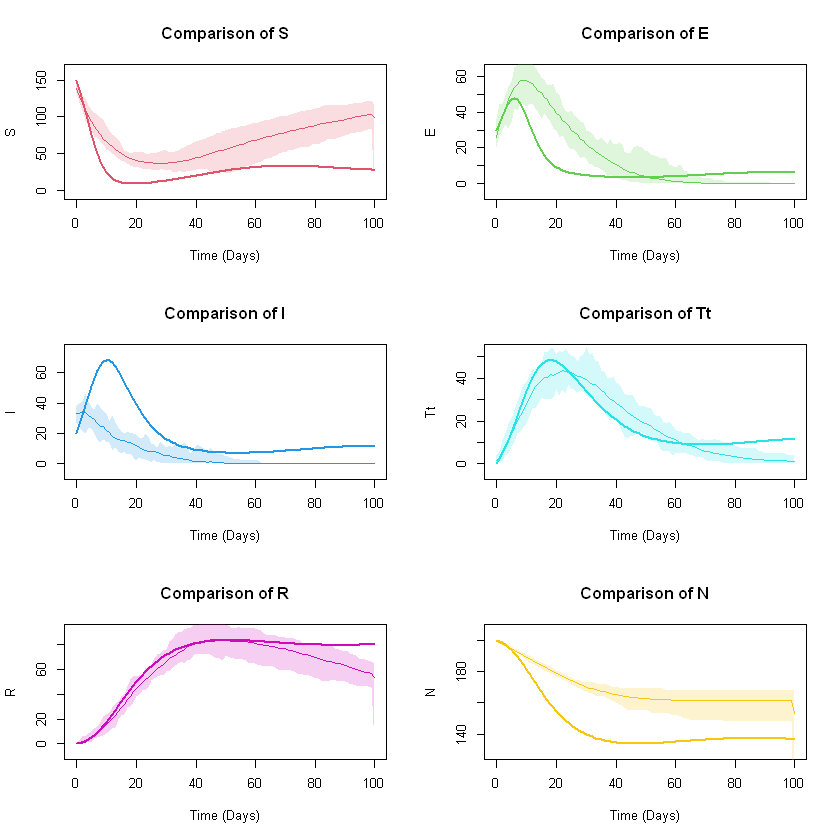

In [44]:
node_counter <- vcount(g)
k=5
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.25) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 200, dim = 1, k = 10, p = 0.25

Status: S 
MSE: 1281.29348080756 
RMSE: 35.7951600193037 
Correlation: 0.750708434160673 
Status: E 
MSE: 207.122480091546 
RMSE: 14.3917504179146 
Correlation: 0.744993779903223 
Status: I 
MSE: 300.833702269519 
RMSE: 17.344558289836 
Correlation: 0.824330310927066 
Status: Tt 
MSE: 38.2045594832594 
RMSE: 6.18098369867284 
Correlation: 0.905046953262733 
Status: R 
MSE: 40.6619172549849 
RMSE: 6.37666976210819 
Correlation: 0.973386213279934 
Status: N 
MSE: 555.07098892282 
RMSE: 23.5599445865821 
Correlation: 0.951213468439645 


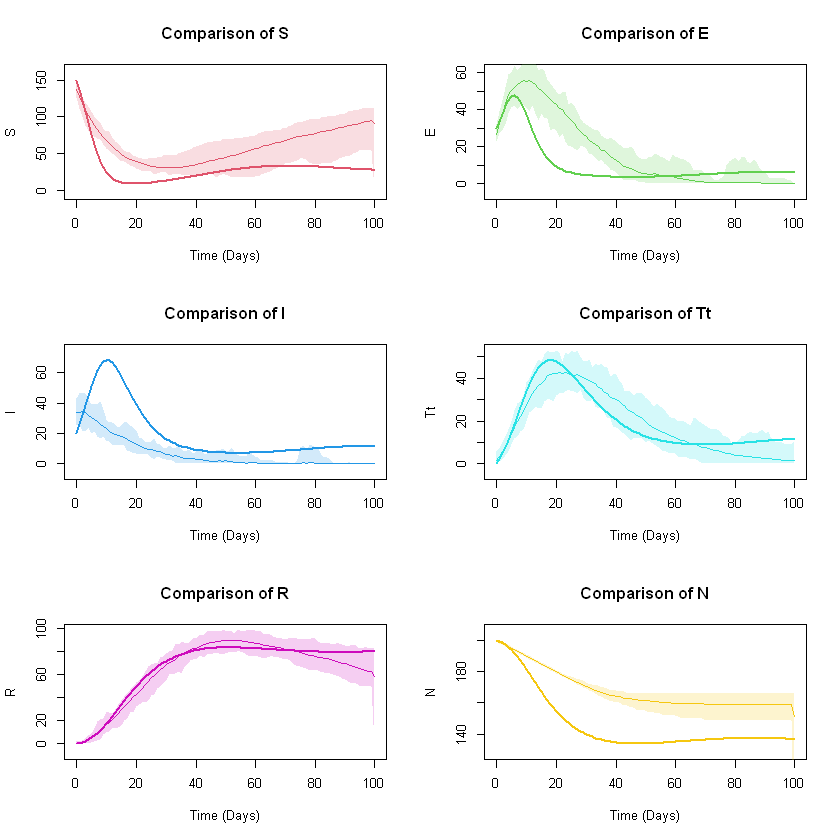

In [45]:
node_counter <- vcount(g)
k=10
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.25) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 200, dim = 1, k = 20, p = 0.25

Status: S 
MSE: 633.382642110897 
RMSE: 25.1670944312389 
Correlation: 0.809130693062417 
Status: E 
MSE: 237.124701277226 
RMSE: 15.3988538949243 
Correlation: 0.733795934501168 
Status: I 
MSE: 300.549810570416 
RMSE: 17.3363724743793 
Correlation: 0.780292896944095 
Status: Tt 
MSE: 48.9696867460611 
RMSE: 6.99783443259849 
Correlation: 0.885186117421193 
Status: R 
MSE: 32.684607480368 
RMSE: 5.71704534531326 
Correlation: 0.981736258448843 
Status: N 
MSE: 442.250720703871 
RMSE: 21.0297579801545 
Correlation: 0.923472041079479 


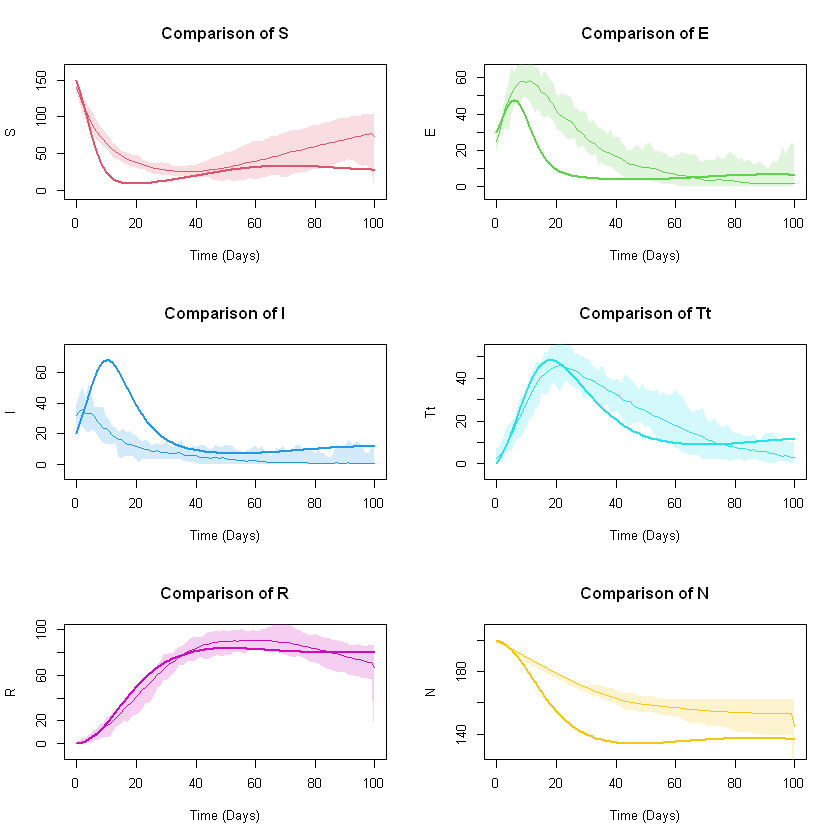

In [46]:
node_counter <- vcount(g)
k=20
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.25) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 200, dim = 1, k = 5, p = 0.5

Status: S 
MSE: 1790.32985694523 
RMSE: 42.3122896679585 
Correlation: 0.720607393357376 
Status: E 
MSE: 196.126919373641 
RMSE: 14.0045321012036 
Correlation: 0.756023939159215 
Status: I 
MSE: 323.789991533398 
RMSE: 17.9941654858845 
Correlation: 0.82931501943916 
Status: Tt 
MSE: 41.7349861456873 
RMSE: 6.46026208026325 
Correlation: 0.914540436092363 
Status: R 
MSE: 81.0699191881045 
RMSE: 9.0038835614475 
Correlation: 0.96662245209267 
Status: N 
MSE: 611.907528543744 
RMSE: 24.7367647145649 
Correlation: 0.961713750334016 


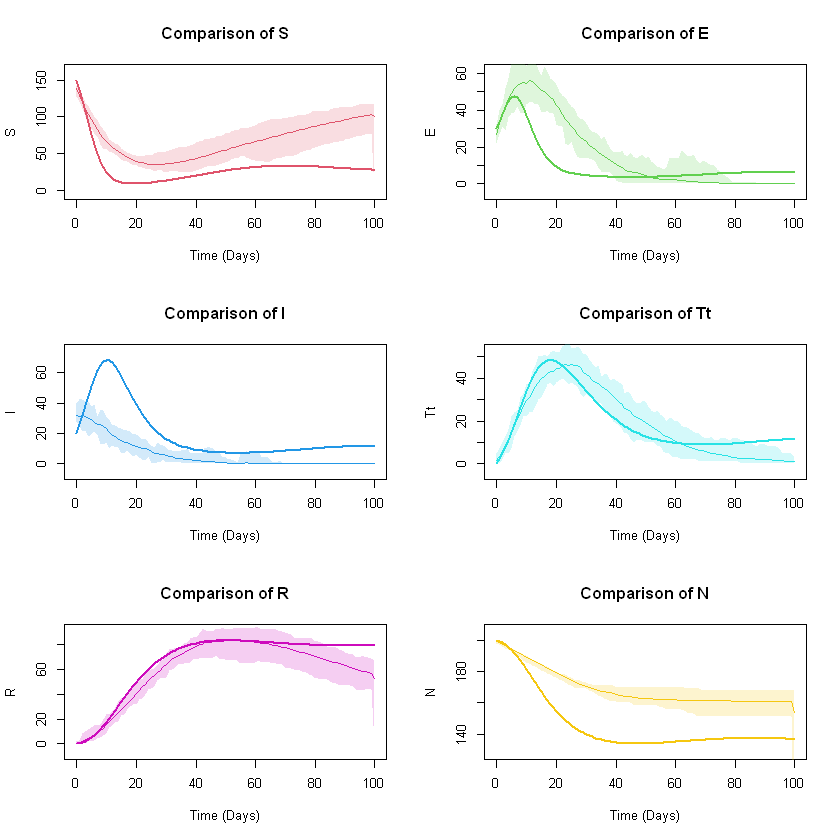

In [47]:
node_counter <- vcount(g)
k=5
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.5) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

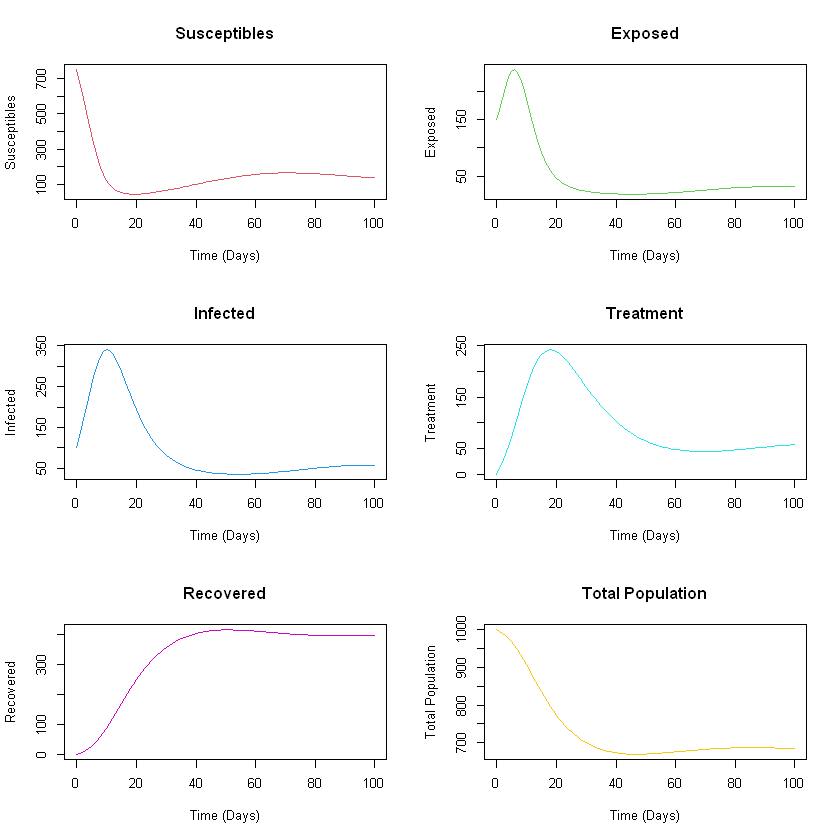

In [3]:
Lambda <- 10
beta1 <- 0.8
beta2 <- 0.3
beta3 <- 0.02
alpha1 <- 0.1
alpha2 <- 0.055
delta_I <- 0.03
delta_T <- 0.03
mu <- 0.01

R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

n <- 1000
S <- 750
I <- 100
E <- 150
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)

SEITRN <- function(t, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- Lambda - (beta1 * S * I) / N - mu * S
    dE <- (beta1 * S * I) / N - (beta2 + mu) * E
    dI <- beta2 * E - (beta3 + mu + delta_I + alpha1) * I
    dT <- alpha1 * I - (mu + delta_T + alpha2) * Tt
    dR <- beta3 * I + alpha2 * Tt - mu * R
    dN <- Lambda - N * mu - delta_I * I - delta_T * Tt
    list(c(dS, dE, dI, dT, dR, dN))
  })
}

times <- seq(0, 100, by = 1)

out <- ode(y = state, times = times, func = SEITRN, parms = parameters)
status_colors <- c("S" = "gray", "E" = "yellow", "I" = "red", "Tt" = "green", "R" = "purple")
par(mfrow = c(3, 2))

plot(out[, "time"], out[, "S"], type = "l", col = 2, xlab = "Time (Days)", ylab = "Susceptibles", main = "Susceptibles")
plot(out[, "time"], out[, "E"], type = "l", col = 3, xlab = "Time (Days)", ylab = "Exposed", main = "Exposed")
plot(out[, "time"], out[, "I"], type = "l", col = 4, xlab = "Time (Days)", ylab = "Infected", main = "Infected")
plot(out[, "time"], out[, "Tt"], type = "l", col = 5, xlab = "Time (Days)", ylab = "Treatment", main = "Treatment")
plot(out[, "time"], out[, "R"], type = "l", col = 6, xlab = "Time (Days)", ylab = "Recovered", main = "Recovered")
plot(out[, "time"], out[, "N"], type = "l", col = 7, xlab = "Time (Days)", ylab = "Total Population", main = "Total Population")

Erdős-Rényi, n = 1000, p = 0.2

Status: S 
MSE: 7044.82204621045 
RMSE: 83.9334381889033 
Correlation: 0.766665583542219 
Status: E 
MSE: 6279.42989475522 
RMSE: 79.2428539033976 
Correlation: 0.801572159194583 
Status: I 
MSE: 7164.38037721513 
RMSE: 84.6426628669912 
Correlation: 0.742042312326354 
Status: Tt 
MSE: 1635.47307427961 
RMSE: 40.440982607741 
Correlation: 0.897313069018948 
Status: R 
MSE: 1283.02114868003 
RMSE: 35.8192845919629 
Correlation: 0.976235145661238 
Status: N 
MSE: 5325.44033130528 
RMSE: 72.9756146346523 
Correlation: 0.910642234708757 


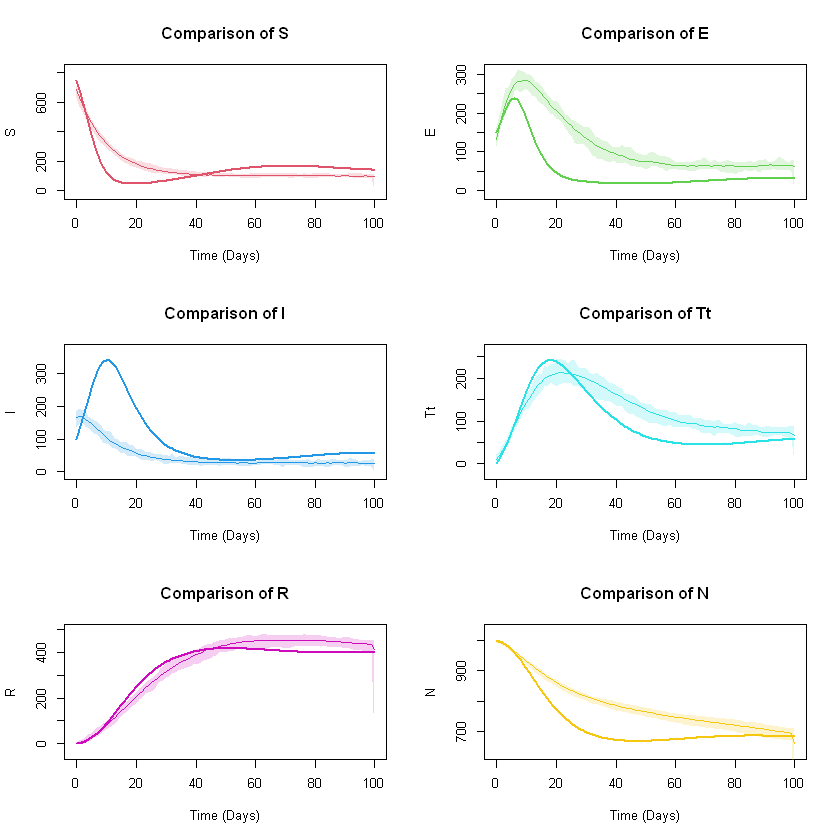

In [49]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.2)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
statuses <- c("S", "E", "I", "Tt", "R", "N")
colors <- c(2, 3, 4, 5, 6, 7)
colors_alpha <- sapply(colors, function(col) rgb(red = col2rgb(col)[1,]/255, green = col2rgb(col)[2,]/255, blue = col2rgb(col)[3,]/255, alpha = 0.2)) # make the shade lighter
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Erdős-Rényi, n = 1000, p = 0.5

Status: S 
MSE: 7093.34692814567 
RMSE: 84.2220097607844 
Correlation: 0.765027433878632 
Status: E 
MSE: 6214.1998642495 
RMSE: 78.8301963986485 
Correlation: 0.808744942394046 
Status: I 
MSE: 7164.8292334226 
RMSE: 84.6453143028166 
Correlation: 0.738946429640126 
Status: Tt 
MSE: 1546.41101642067 
RMSE: 39.3244328175331 
Correlation: 0.906086741559104 
Status: R 
MSE: 1288.44278322748 
RMSE: 35.894885195909 
Correlation: 0.977365722560753 
Status: N 
MSE: 5422.97766908644 
RMSE: 73.6408695568326 
Correlation: 0.907114297651968 


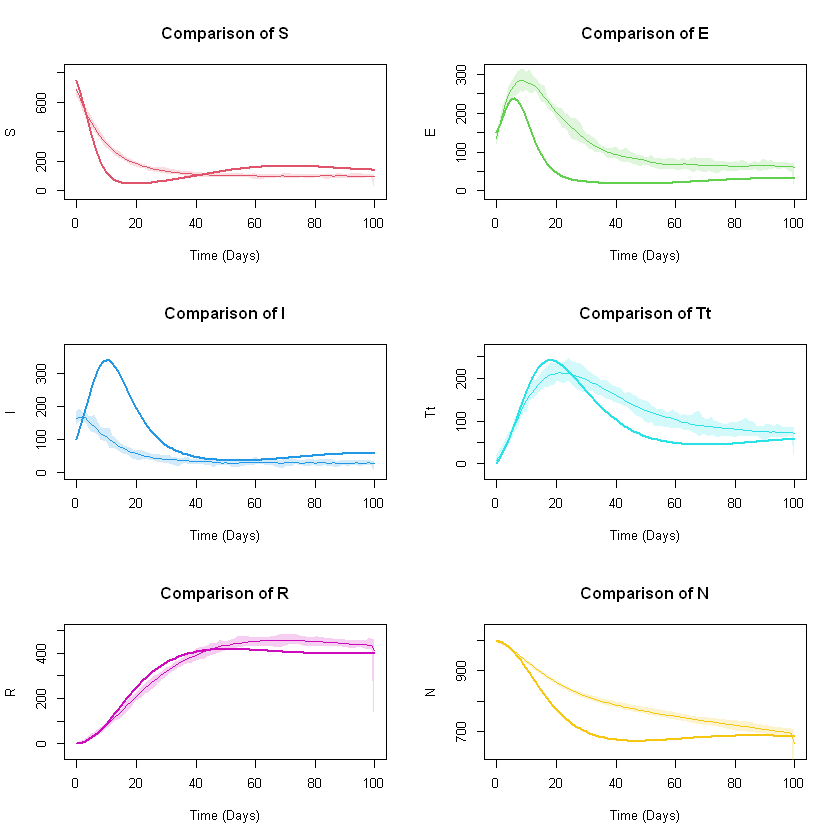

In [50]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.5)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)
par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Erdős-Rényi, n = 1000, p = 0.9

Status: S 
MSE: 7319.74750336051 
RMSE: 85.555522927281 
Correlation: 0.762028020560627 
Status: E 
MSE: 6350.17677731846 
RMSE: 79.6879964443733 
Correlation: 0.791196937470297 
Status: I 
MSE: 6978.0357296761 
RMSE: 83.5346379035433 
Correlation: 0.757429507072904 
Status: Tt 
MSE: 1643.98136950317 
RMSE: 40.5460401211163 
Correlation: 0.892959632976126 
Status: R 
MSE: 1332.61258552262 
RMSE: 36.5049665870634 
Correlation: 0.975205583087939 
Status: N 
MSE: 5291.29103286137 
RMSE: 72.74126086934 
Correlation: 0.908314545272595 


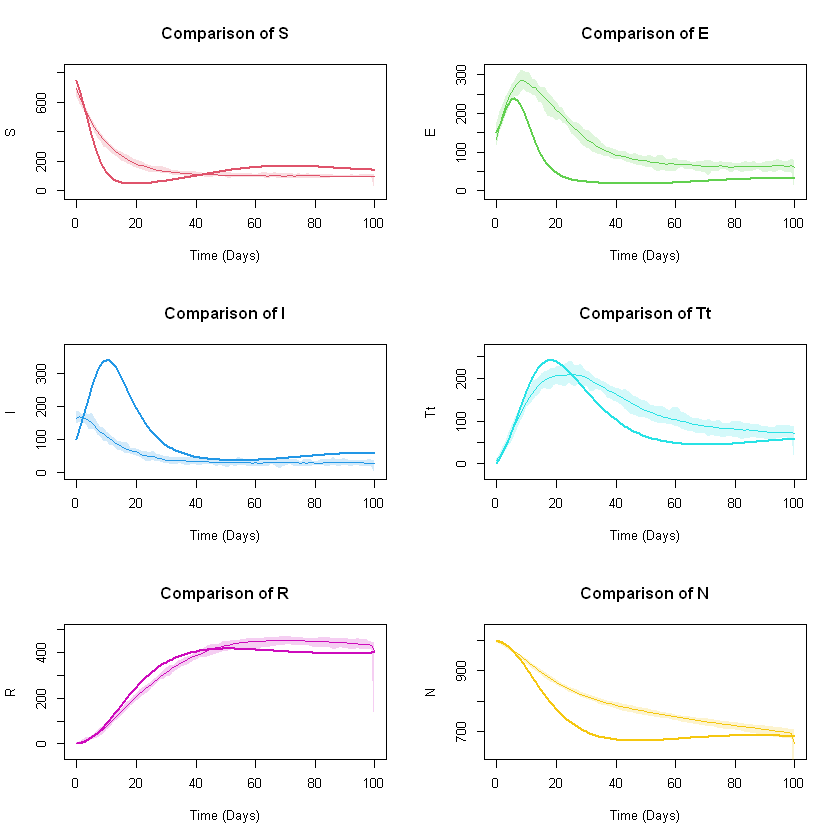

In [51]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.9)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)
par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Barabasi-Albert, n = 1000, power = 1, m = n * 0.2

Status: S 
MSE: 6935.69847989779 
RMSE: 83.2808410133915 
Correlation: 0.768643879231326 
Status: E 
MSE: 6221.24363153664 
RMSE: 78.8748605801408 
Correlation: 0.803416235581146 
Status: I 
MSE: 7134.63279178206 
RMSE: 84.4667555419412 
Correlation: 0.737129657191116 
Status: Tt 
MSE: 1593.45460104872 
RMSE: 39.9180986652511 
Correlation: 0.902418680815818 
Status: R 
MSE: 1249.14999382969 
RMSE: 35.3433161125225 
Correlation: 0.977972840063278 
Status: N 
MSE: 5358.67891759686 
RMSE: 73.202998009623 
Correlation: 0.909705518747816 


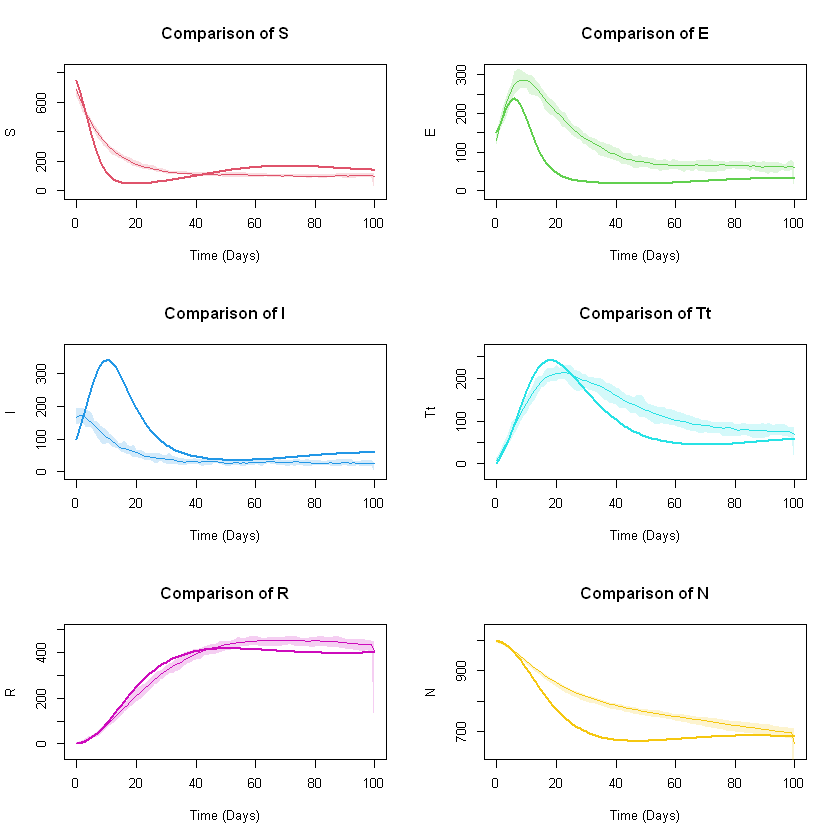

In [53]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_pa(n, power = 1, m = n*0.2, directed = FALSE)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(mean(degree)), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Barabasi-Albert, n = 1000, power = 1, m = n * 0.5

Status: S 
MSE: 7125.47198571745 
RMSE: 84.4125108364717 
Correlation: 0.763690205708213 
Status: E 
MSE: 6232.13363045475 
RMSE: 78.9438637922844 
Correlation: 0.79981700235271 
Status: I 
MSE: 7176.35151774582 
RMSE: 84.7133491118479 
Correlation: 0.740479114488781 
Status: Tt 
MSE: 1681.69283796225 
RMSE: 41.0084483730152 
Correlation: 0.894697645014662 
Status: R 
MSE: 1366.53634717188 
RMSE: 36.966692402376 
Correlation: 0.974882747835013 
Status: N 
MSE: 5408.19671334026 
RMSE: 73.5404427056314 
Correlation: 0.912943580039087 


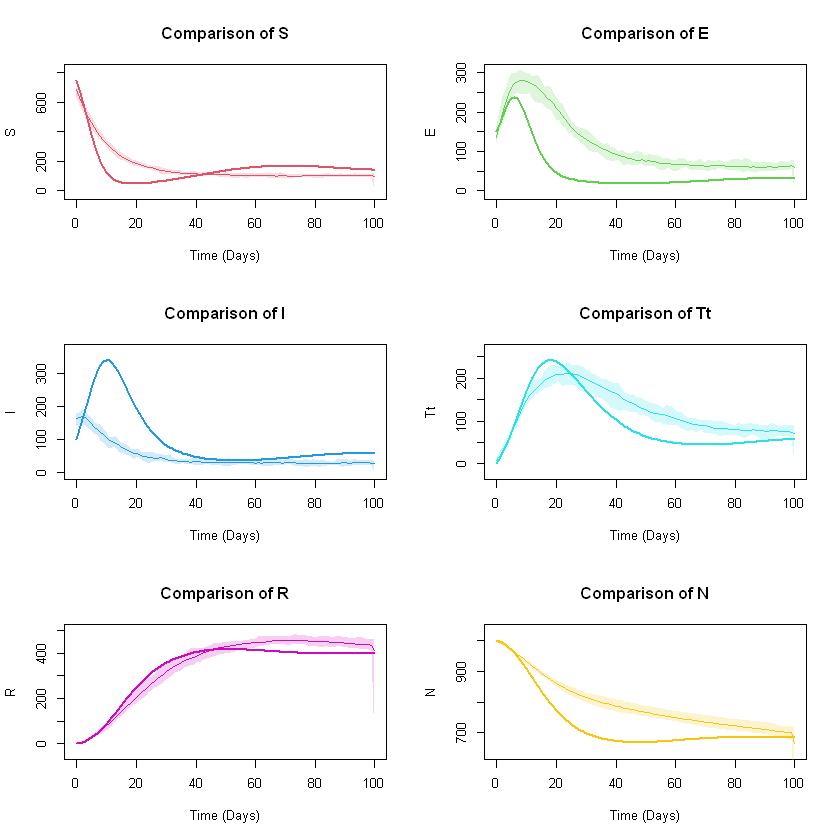

In [59]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_pa(n, power = 1, m = n*0.5, directed = FALSE)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(mean(degree)), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Barabasi-Albert, n = 1000, power = 1, m = n * 0.9

In [4]:
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 5  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:5, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_pa(n, power = 1, m = n*0.9, directed = FALSE)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(mean(degree)), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

ERROR: Error in eval(expr, envir, enclos): object 'statuses' not found


Status: S 
MSE: 6874.99767367632 
RMSE: 82.9156057306242 
Correlation: 0.768092227701841 
Status: E 
MSE: 6274.82783977347 
RMSE: 79.2138109156066 
Correlation: 0.803891644275645 
Status: I 
MSE: 7206.58511802867 
RMSE: 84.8916080542044 
Correlation: 0.722604440678684 
Status: Tt 
MSE: 1877.83694089901 
RMSE: 43.3340159793552 
Correlation: 0.881835404263001 
Status: R 
MSE: 1179.88921375818 
RMSE: 34.3495154806903 
Correlation: 0.97344202235013 
Status: N 
MSE: 5431.89053001593 
RMSE: 73.7013604353131 
Correlation: 0.891622579037577 


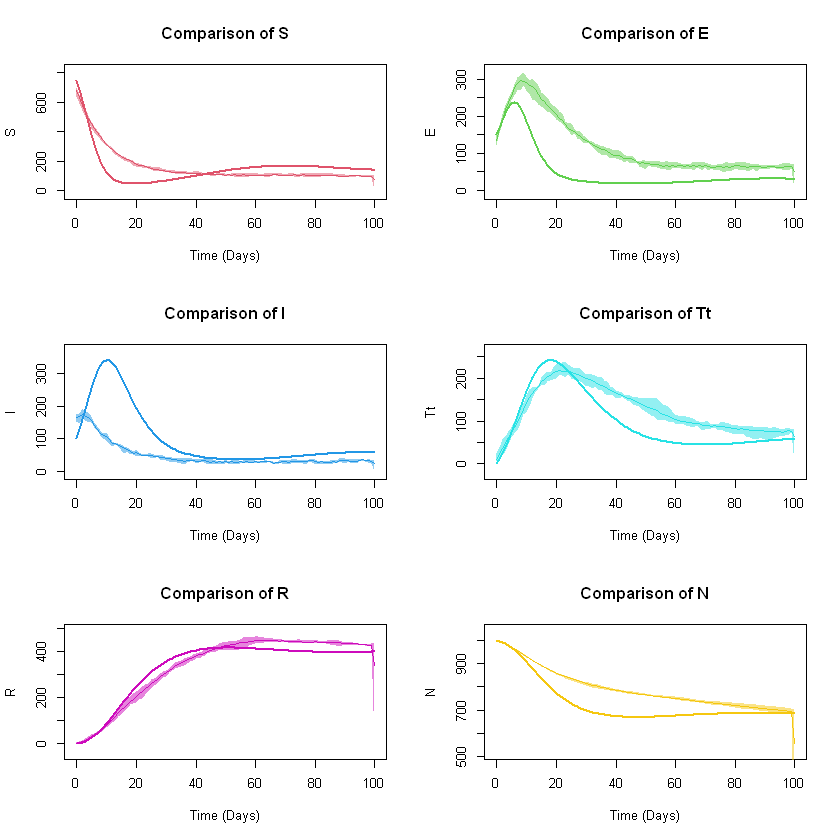

In [5]:
par(mfrow = c(3, 2))
statuses <- c("S", "E", "I", "Tt", "R", "N")
colors <- c(2, 3, 4, 5, 6, 7)
colors_alpha <- sapply(colors, function(col) rgb(red = col2rgb(col)[1,]/255, green = col2rgb(col)[2,]/255, blue = col2rgb(col)[3,]/255, alpha = 0.5))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 1000, dim = 1, k = 5, p = 0.25

Status: S 
MSE: 37065.6082532123 
RMSE: 192.524305616751 
Correlation: 0.801231674886999 
Status: E 
MSE: 3987.0579445256 
RMSE: 63.143154375796 
Correlation: 0.789036777345066 
Status: I 
MSE: 8454.72147565411 
RMSE: 91.9495594097879 
Correlation: 0.790704833819974 
Status: Tt 
MSE: 706.627486076826 
RMSE: 26.5824657636726 
Correlation: 0.924660708709899 
Status: R 
MSE: 2308.86426931131 
RMSE: 48.0506427564847 
Correlation: 0.981752489373808 
Status: N 
MSE: 10368.9417411787 
RMSE: 101.828000771785 
Correlation: 0.970960866666948 


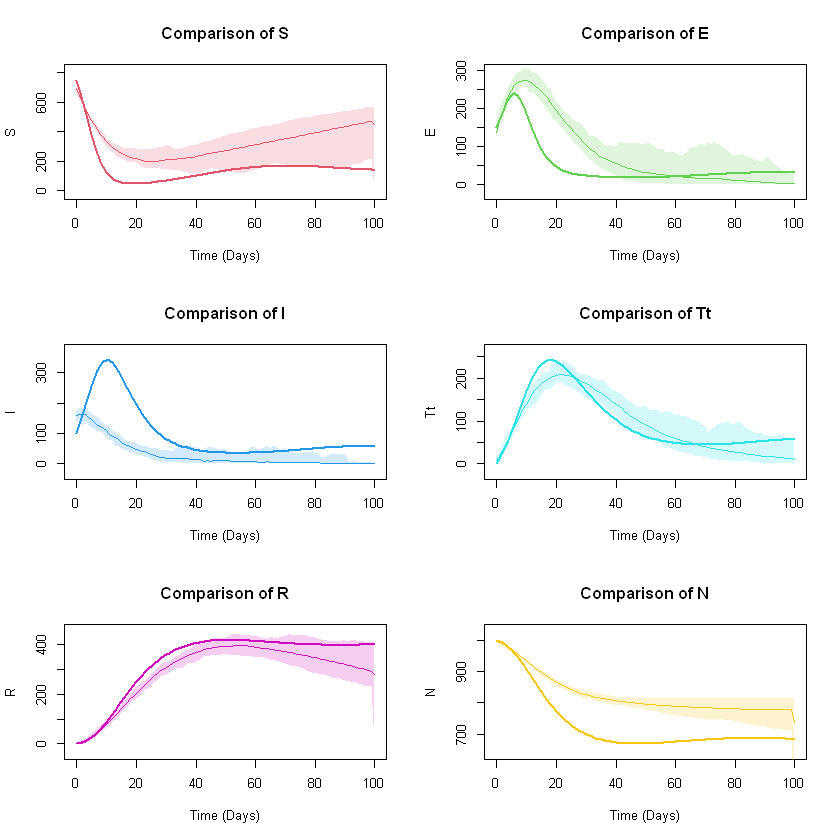

In [54]:
node_counter <- vcount(g)
k=5
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.25) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 1000, dim = 1, k = 10, p = 0.25

Status: S 
MSE: 24805.6370640268 
RMSE: 157.498054159494 
Correlation: 0.781511416729631 
Status: E 
MSE: 5300.23975578473 
RMSE: 72.8027455236733 
Correlation: 0.753463351578072 
Status: I 
MSE: 7988.26494674773 
RMSE: 89.3770940831471 
Correlation: 0.797549400742078 
Status: Tt 
MSE: 1004.76325911373 
RMSE: 31.6980008693565 
Correlation: 0.895271790275866 
Status: R 
MSE: 1450.68872055797 
RMSE: 38.0879077996937 
Correlation: 0.976542113387305 
Status: N 
MSE: 7489.83082342652 
RMSE: 86.5438086949409 
Correlation: 0.971133946757295 


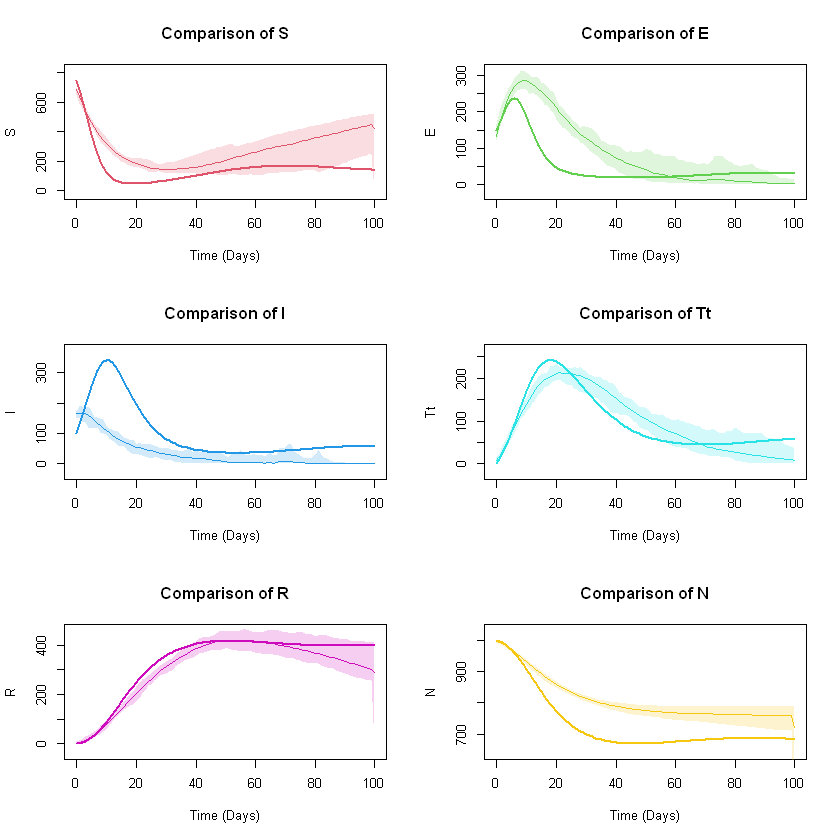

In [55]:
node_counter <- vcount(g)
k=10
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.25) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 1000, dim = 1, k = 20, p = 0.25

Status: S 
MSE: 14880.8340307416 
RMSE: 121.987024026089 
Correlation: 0.786087208361206 
Status: E 
MSE: 5758.99098115722 
RMSE: 75.8880160575912 
Correlation: 0.741820959248773 
Status: I 
MSE: 7913.70976526093 
RMSE: 88.9590341969883 
Correlation: 0.768436973727687 
Status: Tt 
MSE: 1322.46445469745 
RMSE: 36.3657043751039 
Correlation: 0.865338272641903 
Status: R 
MSE: 874.384073300998 
RMSE: 29.5699860213189 
Correlation: 0.978870188051763 
Status: N 
MSE: 6114.47216864265 
RMSE: 78.195090438228 
Correlation: 0.95278291019807 


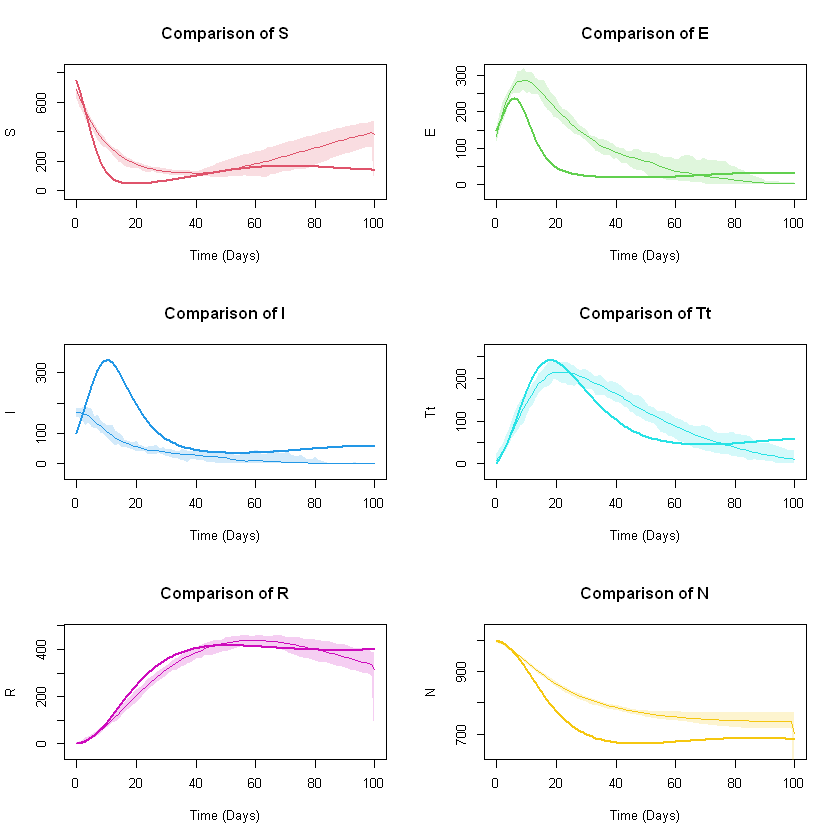

In [56]:
node_counter <- vcount(g)
k=20
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.25) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

Watts-Strogatz, n = 1000, dim = 1, k = 5, p = 0.5

Status: S 
MSE: 35410.9521711921 
RMSE: 188.177980038027 
Correlation: 0.764178700219432 
Status: E 
MSE: 4386.31291565591 
RMSE: 66.2292451690031 
Correlation: 0.786305554781672 
Status: I 
MSE: 8487.79814716865 
RMSE: 92.1292469695082 
Correlation: 0.783978678730004 
Status: Tt 
MSE: 830.284959472946 
RMSE: 28.814665701218 
Correlation: 0.914451701174057 
Status: R 
MSE: 2060.68661663116 
RMSE: 45.394786227398 
Correlation: 0.976836397552982 
Status: N 
MSE: 9610.96057361142 
RMSE: 98.0355066983969 
Correlation: 0.97748593070973 


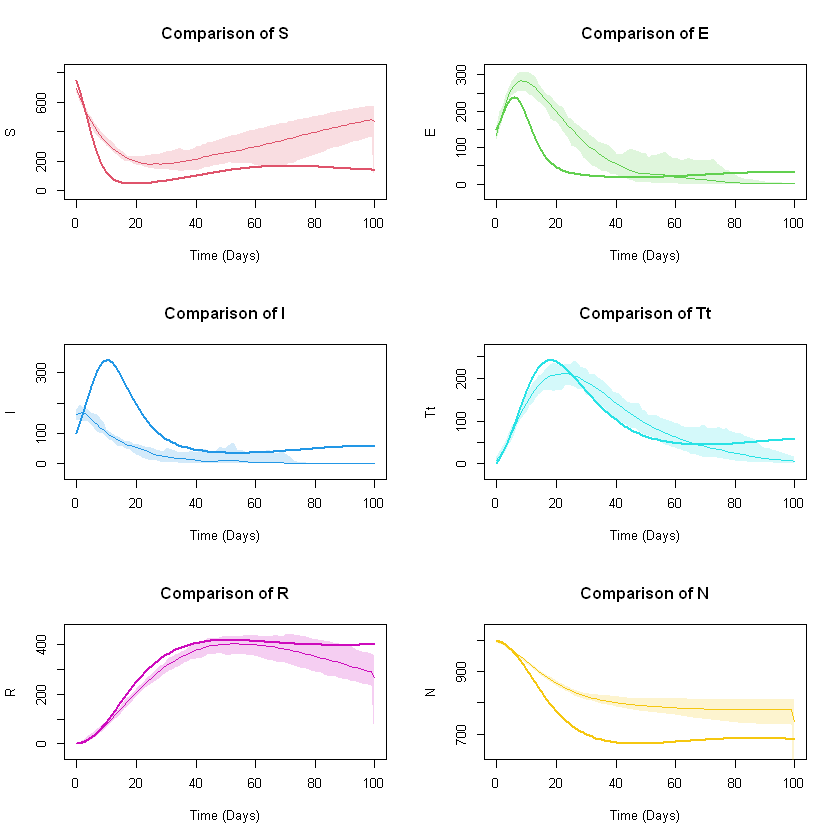

In [58]:
node_counter <- vcount(g)
k=5
status_counts_list <- list()
num_cores <- 10  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:20, .packages = c("igraph", "deSolve")) %dopar% {
  g <- sample_smallworld(dim = 1, size = n, nei = k, p = 0.5) # Adjust nei and p as needed
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      paths <- shortest.paths(g, v = vcount(g))
      nearest_neighbors <- order(paths)[2:(k+1)] # Exclude the new node itself
      g <- add_edges(g, c(rbind(rep(vcount(g), k), nearest_neighbors)))
      for (neighbor in nearest_neighbors) {
        if (runif(1) < p) {
          possible_nodes <- setdiff(V(g), c(vcount(g), neighbors(g, vcount(g))))
          new_neighbor <- sample(possible_nodes, 1)
          g <- delete_edges(g, edge(vcount(g), neighbor))
          g <- add_edges(g, c(vcount(g), new_neighbor))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

par(mfrow = c(3, 2))
for (j in 1:length(statuses)) {
  status_counts <- status_counts_list[[1]]
  counts <- numeric(length = length(times))
  for (t in times) {
    counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
  }
  min_values <- counts
  max_values <- counts
  sum_values <- counts
  count_values <- rep(1, length(times))
  for (i in 2:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t+1)] <- status_counts[[as.character(t)]][j]
    }
    min_values <- pmin(min_values, counts)
    max_values <- pmax(max_values, counts)
    sum_values <- sum_values + counts
    count_values <- count_values + 1
  }
  avg_values <- sum_values / count_values
  y_range <- range(c(avg_values, out[, statuses[j]]))
  y_margin <- (y_range[2] - y_range[1]) * 0.1
  plot(out[, "time"], out[, statuses[j]], type = "n", xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]), ylim = y_range + c(-y_margin, y_margin))
  x <- c(times, rev(times))
  y <- c(min_values, rev(max_values))
  polygon(x, y, col = colors_alpha[j], border = NA)
  lines(times, avg_values, col = colors[j], lwd = 1)
  lines(times, out[, statuses[j]], col = colors[j], lwd = 2)

  # Calculate the measures of similarity
  mse <- mean((avg_values - out[, statuses[j]])^2)
  rmse <- sqrt(mse)
  correlation <- cor(avg_values, out[, statuses[j]])

  # Print the results
  cat(paste("Status:", statuses[j], "\n"))
  cat(paste("MSE:", mse, "\n"))
  cat(paste("RMSE:", rmse, "\n"))
  cat(paste("Correlation:", correlation, "\n"))
}

# Results

In this section, we provide the SEITR model analysis results with different experiment setups. In each experiment, we created a random network with given parameters and implemented our model over 100 time steps and stored the nodes' status changes. We conducted 20 experiments and created comparison plots and shaded the area between the minimum and maximum values for each time step and plotted the average of those 20 experiments similar to figure \ref{fig:firstexp} presented in previous section. By using the average values of all statuses for each experiment setup, we calculated MSE, RMSE and Pearson Correlation. It's important to note that RMSE values are scaled with the network size, therefore we calculated the average normalized RMSE values by averaging over 6 conditions and normalizing with network size to compare different conditions. We created plots that shows status changes over time steps for each condition and presented these plots in the appendix section. Experiment results are presented with the table \ref{tab:results}.

|       |       |       | S     |       |       | E     |       |       | I     |       |       | Tt    |       |       | R     |       |       | N     |       |       |
|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
|       |       |       | MSE   | RMSE  | Corr  | MSE   | RMSE  | Corr  | MSE   | RMSE  | Corr  | MSE   | RMSE  | Corr  | MSE   | RMSE  | Corr  | MSE   | RMSE  | Corr  |
| ER    | n=100 | p=0.2 | 63.128| 7.945 | 0.822 | 49.388| 7.028 | 0.803 | 67.071| 8.19  | 0.785 | 13.649| 3.694 | 0.891 | 9.539 | 3.089 | 0.98  | 51.082| 7.147 | 0.903 |
|       |       | p=0.5 | 81.670| 9.037 | 0.745 | 54.224| 7.364 | 0.78  | 68.401| 8.271 | 0.768 | 17.148| 4.141 | 0.856 | 7.637 | 2.764 | 0.981 | 44.657| 6.683 | 0.885 |
|       |       |p=0.9 | 83.747| 9.151 | 0.737 | 52.544| 7.249 | 0.8   | 68.800| 8.295 | 0.754 | 12.266| 3.502 | 0.917 | 10.898| 3.301 | 0.978 | 41.167| 6.416 | 0.894 |
|       | n=200 | p=0.2 | 286.031| 16.912| 0.761 | 254.106| 15.941| 0.79  | 264.609| 16.267| 0.758 | 62.259| 7.89  | 0.899 | 94.306| 9.711 | 0.975 | 352.164| 18.766| 0.855 |
|       |       | p=0.5 | 318.613| 17.85 | 0.741 | 239.162| 15.465| 0.807 | 277.129| 16.647| 0.762 | 53.285| 7.3   | 0.92  | 97.061| 9.852 | 0.978 | 375.044| 19.366| 0.851 |
|       |       | p=0.9 | 307.746| 17.543| 0.744 | 239.966| 15.491| 0.8   | 272.869| 16.519| 0.741 | 70.785| 8.413 | 0.892 | 93.111| 9.649 | 0.977 | 376.816| 19.412| 0.854 |
|       | n=1000 | p=0.2 | 7044.822|	83.933|	0.767|	6279.430|	79.243|	0.802|	7164.380|	84.643|	0.742|	1635.473|	40.441|	0.897|	1283.021|	35.819|	0.976|	5325.440|	72.976|	0.911 |
|       |       | p=0.5 | 7093.347|	84.222|	0.765|	6214.200|	78.830|	0.809|	7164.829|	84.645|	0.739|	1546.411|	39.324|	0.906|	1288.443|	35.895|	0.977|	5422.978|	73.641|	0.907 |
|       |       | p=0.9 | 7319.748|	85.556|	0.762|	6350.177|	79.688|	0.791|	6978.036|	83.535|	0.757|	1643.981|	40.546|	0.893|	1332.613|	36.505|	0.975|	5291.291|	72.741|	0.908|
| BA    | n=100 | m=n*0.2| 67.182| 8.196 | 0.786 | 54.371| 7.374 | 0.796 | 67.902| 8.24  | 0.774 | 11.887| 3.448 | 0.905 | 7.14  | 2.672 | 0.984 | 41.060| 6.408 | 0.889 |
|       |       | m=n*0.5| 75.807| 8.707 | 0.754 | 52.789| 7.266 | 0.797 | 68.040| 8.249 | 0.744 | 14.107| 3.756 | 0.9   | 5.795 | 2.407 | 0.986 | 37.787| 6.147 | 0.902 |
|       |       | m=n*0.9| 70.499| 8.396 | 0.768 | 53.975| 7.347 | 0.807 | 67.413| 8.211 | 0.761 | 10.551| 3.248 | 0.931 | 5.435 | 2.331 | 0.987 | 32.779| 5.725 | 0.886 |
|       | n=200 | m=n*0.2| 295.789|	17.199|	0.756|	245.678|	15.674|	0.797|	272.524|	16.508|	0.751|	72.586|	8.520|	0.882|	94.782|	9.736|	0.976|	380.956|	19.518|	0.857|
|       |       | m=n*0.5| 312.219| 17.67 | 0.751 | 279.349| 16.714| 0.757 | 265.975| 16.309| 0.777 | 70.252| 8.382 | 0.888 | 64.835| 8.052 | 0.977 | 345.950| 18.6  | 0.846 |
|       |       | m=n*0.9| 375.759| 19.384| 0.714 | 235.751| 15.354| 0.782 | 274.297| 16.562| 0.767 | 74.205| 8.614 | 0.88  | 80.069| 8.948 | 0.978 | 393.730| 19.843| 0.838 |
|       | n=1000 | m=n*0.2| 6935.698|	83.281|	0.769|	6221.244|	78.875|	0.803|	7134.633|	84.467|	0.737|	1593.455|	39.918|	0.902|	1249.150|	35.343|	0.978|	5358.679|	73.203|	0.910 |
|       |       | m=n*0.5|7125.472|84.413|	0.764|6232.134|	78.944|0.800|7176.352|84.713|0.740|1681.693|41.008|0.895|1366.536|36.967|	0.975|	5408.197|	73.540|	0.913  |
|       |       | m=n*0.9| 6874.998|82.916|	0.768|6274.828|79.214|0.804|7206.585|84.892|0.723|1877.837|	43.334|	0.882|1179.889|	34.350|	0.973|	5431.891|	73.701|	0.892|
| WS    | n=100 | k=5, p=0.25| 410.533| 20.262| 0.744 | 33.423| 5.781 | 0.815 | 83.446| 9.135 | 0.796 | 8.318 | 2.884 | 0.922 | 28.186| 5.309 | 0.974 | 88.795| 9.423 | 0.979 |
|       |       | k=10, p=0.25| 230.757| 15.191| 0.788 | 45.378| 6.736 | 0.769 | 77.639| 8.811 | 0.81  | 8.602 | 2.933 | 0.911 | 16.743| 4.092 | 0.973 | 51.479| 7.175 | 0.965 |
|       |       | k=20, p=0.25| 137.235| 11.715| 0.79  | 47.334| 6.88  | 0.75  | 77.696| 8.815 | 0.76  | 10.122| 3.182 | 0.886 | 8.275 | 2.877 | 0.982 | 53.946| 7.345 | 0.932 |
|       |       | k=5, p=0.5| 381.198| 19.524| 0.76  | 37.425| 6.118 | 0.789 | 83.690| 9.148 | 0.806 | 9.153 | 3.025 | 0.907 | 32.249| 5.679 | 0.971 | 76.821| 8.765 | 0.968 |
|       | n=200 | k=5, p=0.25  | 1858.843| 43.114| 0.708 | 183.041| 13.529| 0.779 | 324.542| 18.015| 0.811 | 36.105| 6.009 | 0.917 | 77.675| 8.813 | 0.967 | 612.019| 24.739| 0.965 |
|       |       | k=10, p=0.25 | 1281.293| 35.795| 0.751 | 207.122| 14.392| 0.745 | 300.834| 17.345| 0.824 | 38.205| 6.181 | 0.905 | 40.662| 6.377 | 0.973 | 555.071| 23.560| 0.951 |
|       |       | k=20, p=0.25 | 633.383 | 25.167| 0.809 | 237.125| 15.399| 0.734 | 300.550| 17.336| 0.780 | 48.970| 6.998 | 0.885 | 32.685| 5.717 | 0.982 | 442.251| 21.030| 0.923 |
|       |       | k=5, p=0.5   | 1790.330| 42.312| 0.721 | 196.127| 14.005| 0.756 | 323.790| 17.994| 0.829 | 41.735| 6.460 | 0.915 | 81.070| 9.004 | 0.967 | 611.908| 24.737| 0.962 |
|       | n=1000 | k=5, p=0.25 |37065.608|192.524|0.801|3987.057|63.143|0.789|8454.721|	91.949|	0.791|	706.627|26.582|	0.924|	2308.864|	48.051|	0.982|	10368.942|	101.828|	0.971 |
|       |       | k=10, p=0.25 | 24805.637|157.498|	0.781|5300.239|	72.802|	0.753|	7988.264|	89.377|	0.797|	1004.763|	31.698|	0.895|	1450.688|	38.087|	0.976|	7489.83|	86.544|	0.971 |
|       |       | k=20, p=0.25 | 14880.834|121.987|	0.786|	5758.991|75.888|0.742|7913.709|	88.959|	0.768|	1322.464|	36.365|	0.865|	874.384|	29.569|	0.978|	6114.472|78.195|	0.952|
|       |       | k=5, p=0.5   | 35410.952|188.178|	0.764|4386.313|	66.229|	0.786|8487.798|92.129|0.784|830.285|28.815|	0.914|	2060.686|45.394|0.977|9610.961|98.035|0.977 |

In the analysis of the *Erdős-Rényi networks*, the impact of network size and the connection probability parameter ‘p’ on the performance of the SEITR model was examined. The status changes for this network type was captured by our model and the trends are very similar on each different setup with Erdős-Rényi networks. The experiment results for Erdős-Rényi network with 100 nodes  and 1000 nodes with 0.5 p is shown in the figure below. When considering the effect of network size, it was observed that as the network size increased from 100 to 1000 nodes, the average normalized RMSE showed a slight increase. For instance, for an ER network with p=0.5, the average normalized RMSE increased from 0.064 for n=100 to 0.066 for n=1000 and peaked for n=200 with 0.072. The average Pearson Correlation, which measures the strength and direction of the relationship between the model’s predictions and the actual data, increased as the network size increased. For the same ER network with p=0.5, the average Pearson Correlation was 0.836 for n=100 and increased to 0.851 for n=1000. This indicates that despite the uncertainty in average normalized RMSE, the model’s ability to capture the overall trend of the data improves with larger network sizes. 

When considering the ‘p’ parameter that adjusts the edge creation probability, hence controls the density of the ER network, the average normalized RMSE showed no consistent trend as ‘p’ increased from 0.2 to 0.9 for a network size of 100. However, the average Pearson Correlation decreased from 0.864 to 0.847 as ‘p’ increased. This suggests that while the average error per node does not significantly depend on the network’s density, the model’s accuracy in capturing the overall trend decreases in networks with higher connection density between nodes.

*The Barabási–Albert networks*}* analysis focuses to uncover the impact of network size and the parameter ‘m’ on the performance. The effect of network size for this network is very similar to Erdős-Rényi networks results, it was observed that as the network size increased from 100 to 1000 nodes, the average normalized RMSE showed a slight increase. For instance, for a BA network with m=0.5, the average normalized RMSE increased from 0.061 for n=100 to 0.067 for n=1000. This suggests that the error per node increases as the network size increases, indicating that the model’s performance decreases slightly with increasing network size. The average Pearson correlation results are again very close to each other. When the network sizes are smaller, the correlations are higher for Barabási–Albert networks.

When considering the ‘m’ parameter, which controls the number of edges to attach from a new node to existing nodes in the Barabási–Albert network, the average normalized RMSE showed no consistent trend as ‘m’ increased from 0.2 to 0.9 for a network size of 100. The average Pearson Correlation shows an opposite trend with the network size with very small differences. This suggests that while the average error per node does not significantly depend on the network’s density, the model’s accuracy in capturing the overall trend improves in denser networks. For this experiment, the best average normalized RMSE score is achieved by Barabási–Albert network with 100 nodes and densest setup where m is set to n*0.9 with 0.059.

In the analysis of the *Watts-Strogatz (WS) networks*, the SEITR model’s performance was evaluated in relation to network size and the parameters ‘k’ and ‘p’. The network size’s influence was evident in the results. As the network size expanded from 100 to 1000 nodes, there was a slight increase in the average normalized RMSE. For example, in a Watts-Strogatz network with k=5 and p=0.25, the average normalized RMSE rose from 0.088 for n=100 to 0.087 for n=1000. This indicates that as the network size grows, the error per node also increases, suggesting a slight decrease in the model’s performance with increasing network size. On the other hand, the average Pearson Correlation showed an increase as the network size grew. For the same Watts-Strogatz network with k=5 and p=0.25, the average Pearson Correlation increased from 0.872 for n=100 to 0.876 for n=1000. This suggests that despite the rise in average normalized RMSE, the model’s capacity to capture the overall trend of the data improves with larger network sizes. The highest average Pearson Correlation score is achieved by the Watts-Strogatz network with 1000 nodes, k=5 and p=0.25 with 0.876.

The ‘k’ parameter in Watts-Strogatz networks controls the number of nearest neighbors in the ring topology. As ‘k’ increased from 5 to 20 for a network size of 100 and p=0.25, the average normalized RMSE decreased from 0.088 to 0.068. This suggests that the average error per node decreases with increasing ‘k’. However, the average Pearson Correlation showed a decrease from 0.872 to 0.850, indicating that the model’s accuracy in capturing the overall trend decreases with increasing ‘k’. The ‘p’ parameter in Watts-Strogatz networks controls the probability of rewiring each edge. The effect of ‘p’ is more nuanced. When comparing the results for a Watts-Strogatz network with k=5 and varying ‘p’ values, it can be seen that the average normalized RMSE and average Pearson Correlation do not follow a consistent trend. This suggests that the impact of ‘p’ on the model’s performance may depend on other factors such as network size and ‘k’.

The application of the SEITR model to Erdős-Rényi, Barabási–Albert, and Watts-Strogatz networks revealed distinct patterns in each network type. Erdős-Rényi networks, characterized by their randomness, showed a increased correlation with model on increasing network density. Barabási–Albert networks, known for their scale-free properties, demonstrated a slight decrease in performance with increasing network size, but an improvement in capturing overall trends. Watts-Strogatz networks, famous for their small-world properties, exhibited nuanced effects of the number of nearest neighbors and rewiring probability on the model’s performance. Overall, while all network types achieved very accurate results and maintained relatively stable trend capture with increasing network size, the specific network parameters had varied impacts on the model’s predictive power.

# Conclusion

The experiments conducted in this study have shed light on the dynamics of disease spread across different network structures, specifically Erdős-Rényi, Barabási–Albert, and Watts-Strogatz networks. The SEITR model was applied to these networks, and the disease dynamics were observed under various conditions. In each experiment, the disease dynamics were found to align closely with the expected trends of the ODE solution, demonstrating the effectiveness of the SEITR model in capturing disease spread across different network structures. However, it was also observed that the network structure significantly impacts disease dynamics. Despite having the same initial conditions and parameters, the disease spread varied across the different network types and sizes, underscoring the importance of considering network structure in epidemiological modeling. Moreover, the experiments highlighted the stochastic nature of disease spread. By running multiple iterations of the experiments, a range of outcomes was observed, reflecting the inherent randomness in disease transmission and network generation. This provided a more robust understanding of the model’s behavior.

The experiments also demonstrated the impact of various parameters on disease dynamics. By adjusting these parameters, the model can be tailored to simulate a wide range of diseases and outbreak scenarios, enhancing its versatility and applicability.


\paragraph{}
Further, the experiments demonstrated the impact of various parameters on disease dynamics, such as the rate of new individuals entering the population (Lambda), the probabilities of transitioning between states (beta1, beta2, beta3, alpha1, alpha2), and the rates of disease-induced death (delta\_I, delta\_T). By adjusting these parameters, the model can be tailored to simulate a wide range of diseases and outbreak scenarios.
\paragraph{}
In conclusion, these experiments underscore the importance of network structure and size in epidemiological modeling and contribute significantly to our understanding of disease dynamics. The findings can inform strategies for disease control and prevention. Future work could explore other network structures, incorporate more realistic assumptions about individual behavior and interactions, and apply the model to real-world outbreak data. This study provides a solid foundation for further exploration of disease dynamics using the SEITR model.

\section{Future Work}\label{future}
%\paragraph{}
The experiments conducted in this study provide a solid foundation for further exploration of disease dynamics using the SEITR model. However, there are several avenues for future work that could enhance the realism and applicability of the model.
%\paragraph{}
In this study, we adopted Erdős-Rényi, Barabási–Albert, and Watts-Strogatz network graphs to represent a cattle population. While these network structures capture some aspects of real-world populations, they are still quite simplistic. Future work could explore other network types that better represent the complexity and heterogeneity of real-world populations. For instance, scale-free networks, which are characterized by a few highly connected nodes (hubs) and many nodes with few connections, could be used to represent populations with social or spatial structure. Similarly, small-world networks, which exhibit high clustering and short path lengths, could be used to represent populations with strong local connections and occasional long-range connections.
\paragraph{}
There are several ways in which the SEITR model could be adjusted to make it more realistic. One possibility is to incorporate age structure into the model, as age can significantly influence an individual’s susceptibility to infection, their likelihood of transmitting the disease, and their probability of recovery. Another possibility is to include spatial structure in the model, as the spatial distribution of individuals can greatly affect disease spread. This could be achieved by using spatially explicit network models or by incorporating spatially dependent transmission rates into the model.
\paragraph{}
In this study, the model parameters were set manually based on reasonable assumptions. However, in a real-world outbreak, these parameters would need to be estimated from data. Future work could explore methods for parameter estimation, such as maximum likelihood estimation or Bayesian inference. These methods could be used to fit the model to outbreak data and estimate the parameters that best explain the observed disease dynamics.